In [1]:
import warnings
import pandas as pd
import os
import pickle as pk
import tqdm
import matplotlib.pyplot as plt
import numpy as np

import placetmachine as pl

In [2]:
knobs_setup = {
    "Y1": f"data/learning_storage/orbit_supression_2/Y1_sfs3_13_quads",
    "Y2": f"data/learning_storage/orbit_supression_2/Y2_sfs3_19_quads",
    "Y3": f"data/learning_storage/orbit_supression_2/Y3_sfs3_11_quads",
    "Y4": f"data/learning_storage/orbit_supression_2/Y4_sfs3_8_quads",
    "Y5": f"data/learning_storage/orbit_supression_2/Y5_sfs3_20_quads",
    "Y6": f"data/learning_storage/orbit_supression_2/Y6_sfs3_15_quads",
    "Y7": f"data/learning_storage/orbit_supression_2/Y7_sfs3_11_quads",
    "Y8": f"data/learning_storage/orbit_supression_2/Y8_sfs3_19_quads",
    "Y9": f"data/learning_storage/orbit_supression_2/Y9_sfs3_20_quads",
    "Y10": f"data/learning_storage/orbit_supression_2/Y10_sfs3_19_quads"
}

In [3]:
# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)


********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [7]:
# this is a function to collect the calculation summary from a folder
def gather_data2(folder, supress_output = False):
    data = []
    _start, _end = 1489, 2062

    feature_id = _start
    
    if not supress_output:
        print("Found ", end = "")
    for feature_id in range(_start, _end + 1):
        _filename = f"quad_{feature_id}.pkl"
        if os.path.isfile(os.path.join(folder, _filename)):
            if not supress_output:
                print(feature_id, end = ", ")
            with open(os.path.join(folder, _filename), 'rb') as file:
                row_data = pk.load(file)

                data.append(row_data)
    if not supress_output:
        print()
    res = pd.DataFrame(data)
    return res

In [8]:
# lets start a test by building a knob Y1

y1_knob_candidate = gather_data2(knobs_setup['Y1'])



Found 1489, 1490, 1491, 1492, 1493, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654

In [9]:
print(y1_knob_candidate)

          Regularization         alpha  n_features  \
0    regularizer_mod_5_3  5.000000e-07          13   
1    regularizer_mod_5_3  5.000000e-07          13   
2    regularizer_mod_5_3  5.000000e-07          13   
3    regularizer_mod_5_3  5.000000e-07          13   
4    regularizer_mod_5_3  5.000000e-07          13   
..                   ...           ...         ...   
557  regularizer_mod_5_3  5.000000e-07          13   
558  regularizer_mod_5_3  5.000000e-07          13   
559  regularizer_mod_5_3  5.000000e-07          13   
560  regularizer_mod_5_3  5.000000e-07          13   
561  regularizer_mod_5_3  5.000000e-07          13   

                                          features_ids  n_nonzero_elems  \
0    [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187...               13   
1    [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187...               13   
2    [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187...               13   
3    [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187

In [11]:
# sorting based on the loss

y1_knob_candidate_sorted = y1_knob_candidate.sort_values(by = ['total_loss'])

print(y1_knob_candidate_sorted)

          Regularization         alpha  n_features  \
277  regularizer_mod_5_3  5.000000e-07          13   
273  regularizer_mod_5_3  5.000000e-07          13   
281  regularizer_mod_5_3  5.000000e-07          13   
285  regularizer_mod_5_3  5.000000e-07          13   
250  regularizer_mod_5_3  5.000000e-07          13   
..                   ...           ...         ...   
63   regularizer_mod_5_3  5.000000e-07          13   
30   regularizer_mod_5_3  5.000000e-07          13   
8    regularizer_mod_5_3  5.000000e-07          13   
19   regularizer_mod_5_3  5.000000e-07          13   
41   regularizer_mod_5_3  5.000000e-07          13   

                                          features_ids  n_nonzero_elems  \
277  [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187...               13   
273  [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187...               13   
281  [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187...               13   
285  [2031, 1763, 2060, 1881, 1751, 1892, 2021, 187

In [12]:
# the solution we want to use is the one with the smallest loss
# so in our case is the first row in the sorted DataFrame

y1_weights = y1_knob_candidate_sorted.weights.values[0]
y1_features = y1_knob_candidate_sorted.features_ids.values[0]

print(y1_weights) # this are the values in microns
print(y1_features)

[[ -1.4499317]
 [  1.0086112]
 [ -1.7835302]
 [ 17.416288 ]
 [ 14.735407 ]
 [ -4.104488 ]
 [ -1.6451167]
 [ -3.3707256]
 [  0.999744 ]
 [-24.63238  ]
 [ 10.131407 ]
 [ -1.4434994]
 [-15.551787 ]]
[2031, 1763, 2060, 1881, 1751, 1892, 2021, 1870, 1671, 1759, 1787, 1715, 1771]


In [15]:
for element, offset in zip(y1_features, y1_weights.ravel()):
    print(element, offset)

2031 -1.4499317
1763 1.0086112
2060 -1.7835302
1881 17.416288
1751 14.735407
1892 -4.104488
2021 -1.6451167
1870 -3.3707256
1671 0.999744
1759 -24.63238
1787 10.131407
1715 -1.4434994
1771 -15.551787


In [51]:
# Also, to remember that the quads ids in the list above are not the same
# ids as in the beamline

# extracting the quadrupoles separately

print(f"Number of girders is {clic.beamline.get_girders_number()}")

# writing a transformation

quads_transform = {}

quad_index = 1489
for quad in clic.beamline.extract(['Quadrupole']):
    print(quad.index, quad_index)
    
    quads_transform[quad_index] = quad.index
    quad_index += 1
    

Number of girders is 1489
0 1489
10 1490
20 1491
30 1492
40 1493
50 1494
60 1495
70 1496
80 1497
90 1498
100 1499
110 1500
120 1501
130 1502
140 1503
150 1504
160 1505
170 1506
180 1507
190 1508
200 1509
210 1510
220 1511
230 1512
240 1513
250 1514
260 1515
270 1516
280 1517
290 1518
300 1519
310 1520
320 1521
330 1522
340 1523
350 1524
360 1525
370 1526
380 1527
390 1528
400 1529
410 1530
420 1531
430 1532
440 1533
450 1534
460 1535
470 1536
480 1537
490 1538
500 1539
510 1540
520 1541
530 1542
540 1543
550 1544
560 1545
570 1546
580 1547
590 1548
600 1549
610 1550
620 1551
630 1552
640 1553
650 1554
660 1555
670 1556
680 1557
690 1558
700 1559
710 1560
720 1561
730 1562
740 1563
750 1564
760 1565
770 1566
780 1567
790 1568
800 1569
810 1570
820 1571
830 1572
840 1573
850 1574
860 1575
870 1576
880 1577
890 1578
900 1579
910 1580
920 1581
930 1582
940 1583
950 1584
960 1585
970 1586
980 1587
990 1588
1000 1589
1010 1590
1020 1591
1030 1592
1040 1593
1050 1594
1060 1595
1070 1596
1080 

In [52]:
print(quads_transform)

{1489: 0, 1490: 10, 1491: 20, 1492: 30, 1493: 40, 1494: 50, 1495: 60, 1496: 70, 1497: 80, 1498: 90, 1499: 100, 1500: 110, 1501: 120, 1502: 130, 1503: 140, 1504: 150, 1505: 160, 1506: 170, 1507: 180, 1508: 190, 1509: 200, 1510: 210, 1511: 220, 1512: 230, 1513: 240, 1514: 250, 1515: 260, 1516: 270, 1517: 280, 1518: 290, 1519: 300, 1520: 310, 1521: 320, 1522: 330, 1523: 340, 1524: 350, 1525: 360, 1526: 370, 1527: 380, 1528: 390, 1529: 400, 1530: 410, 1531: 420, 1532: 430, 1533: 440, 1534: 450, 1535: 460, 1536: 470, 1537: 480, 1538: 490, 1539: 500, 1540: 510, 1541: 520, 1542: 530, 1543: 540, 1544: 550, 1545: 560, 1546: 570, 1547: 580, 1548: 590, 1549: 600, 1550: 610, 1551: 620, 1552: 630, 1553: 640, 1554: 650, 1555: 660, 1556: 670, 1557: 680, 1558: 690, 1559: 700, 1560: 710, 1561: 720, 1562: 730, 1563: 740, 1564: 750, 1565: 760, 1566: 770, 1567: 780, 1568: 790, 1569: 800, 1570: 810, 1571: 820, 1572: 830, 1573: 840, 1574: 850, 1575: 860, 1576: 870, 1577: 880, 1578: 890, 1579: 900, 1580: 910

In [39]:
# transfoorming the quads ids from caluclations to their indeces

y1_elements_list = []

for quad_id in y1_features:
    y1_elements_list.append(clic.beamline[quads_transform[quad_id]])


In [44]:
# Creating a knob

y1 = pl.Knob(y1_elements_list, 'y', y1_weights.ravel(), name = "Y1")

In [45]:
print(y1)

   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1357  3175.91934  0.0  -1.449932  0.0  0.0
1        Quadrupole     430  1004.59019  0.0   1.008611  0.0  0.0
2        Quadrupole    1473  3447.55132  0.0  -1.783530  0.0  0.0
3        Quadrupole     784  1834.19598  0.0  17.416288  0.0  0.0
4        Quadrupole     403   941.36051  0.0  14.735407  0.0  0.0
5        Quadrupole     817  1911.45228  0.0  -4.104488  0.0  0.0
6        Quadrupole    1317  3082.25314  0.0  -1.645117  0.0  0.0
7        Quadrupole     751  1756.93968  0.0  -3.370726  0.0  0.0
8        Quadrupole     243   566.69571  0.0   0.999744  0.0  0.0
9        Quadrupole     419   978.82699  0.0 -24.632380  0.0  0.0
10       Quadrupole     502  1173.22931  0.0  10.131407  0.0  0.0
11       Quadrupole     331   772.76135  0.0  -1.443499  0.0  0.0
12       Quadrupole     454  1060.80323  0.0 -15.551787  0.0  0.0


Performing the same thing for the other knobs

In [124]:
# In the calculations I used girder and Quadrupoles
# The numbering of girders starts from 0 and after them there are 
# quadrupole. So I need to convert these quad ids into their
# indices in the beamline.

def construct_knobs():
    """
    """
#    print(f"Number of girders is {clic.beamline.get_girders_number()}")

    quads_transform = {}

    quad_index = 1489
    for quad in clic.beamline.extract(['Quadrupole']):
        quads_transform[quad_index] = quad.index
        quad_index += 1

    knobs = []

    for knob in knobs_setup:
        # reading the calculation file
        knob_candidate = gather_data2(knobs_setup[knob], True)

        # sorting the processed data 
        knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

        weights = knob_candidate_sorted.weights.values[0].ravel()
        features = knob_candidate_sorted.features_ids.values[0]
#        print(weights, features)

        elements_list = []

        for quad_id in features:
            elements_list.append(clic.beamline[quads_transform[quad_id]])

        knobs.append(pl.Knob(elements_list, 'y', weights, name = knob))
    
    return knobs

In [59]:
for knob in construct_knobs():
    print(knob)

   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1361  3185.28596  0.0  -1.449932  0.0  0.0
1        Quadrupole     433  1011.61682  0.0   1.008611  0.0  0.0
2        Quadrupole    1477  3456.91794  0.0  -1.783530  0.0  0.0
3        Quadrupole     787  1841.21928  0.0  17.416288  0.0  0.0
4        Quadrupole     405   946.04382  0.0  14.735407  0.0  0.0
5        Quadrupole     820  1918.47558  0.0  -4.104488  0.0  0.0
6        Quadrupole    1321  3091.61976  0.0  -1.645117  0.0  0.0
7        Quadrupole     754  1763.96298  0.0  -3.370726  0.0  0.0
8        Quadrupole     245   571.37902  0.0   0.999744  0.0  0.0
9        Quadrupole     421   983.51030  0.0 -24.632380  0.0  0.0
10       Quadrupole     505  1180.25594  0.0  10.131407  0.0  0.0
11       Quadrupole     333   777.44466  0.0  -1.443499  0.0  0.0
12       Quadrupole     457  1067.82986  0.0 -15.551787  0.0  0.0
   name        type  girder           s    x          y   xp   yp
0        Q

In [60]:
print(clic.beamline)

Beamline(name = 'ml', structure = 
      name        type  girder           s    x   xp    y   yp
0           Quadrupole       1     0.21500  0.0  0.0  0.0  0.0
1                Drift       1     0.27500  0.0  0.0  0.0  0.0
2               Cavity       1     0.81833  0.0  0.0  0.0  0.0
3                Drift       1     0.85833  0.0  0.0  0.0  0.0
4               Cavity       1     1.40166  0.0  0.0  0.0  0.0
...    ...         ...     ...         ...  ...  ...  ...  ...
13524           Cavity    1488  3483.28447  0.0  0.0  0.0  0.0
13525            Drift    1488  3483.32447  0.0  0.0  0.0  0.0
13526           Cavity    1488  3483.86780  0.0  0.0  0.0  0.0
13527            Drift    1488  3483.88780  0.0  0.0  0.0  0.0
13528              Bpm    1489  3483.96780  0.0  0.0  0.0  0.0

[13529 rows x 8 columns])


Testing out the knobs with `Machine`.

In [61]:
clic.apply_knob(knobs[0], 1.0)

In [73]:
for element in clic.beamline:
    if element['y'] != 0:
        print(element.type, element.index, element.girder)

In [66]:
beam_orbit = clic.eval_orbit(main_beam)

print(beam_orbit)

          id           s    x        y
0        8.0     2.08499  0.0  0.00000
1       18.0     4.42498  0.0  0.00000
2       28.0     6.76497  0.0  0.00000
3       38.0     9.10496  0.0  0.00000
4       48.0    11.44495  0.0  0.00000
..       ...         ...  ...      ...
569  13388.0  3446.50132  0.0 -1.09122
570  13423.0  3455.86794  0.0 -1.50042
571  13458.0  3465.23456  0.0 -2.36681
572  13493.0  3474.60118  0.0 -6.81670
573  13528.0  3483.96780  0.0 -1.64022

[574 rows x 4 columns]


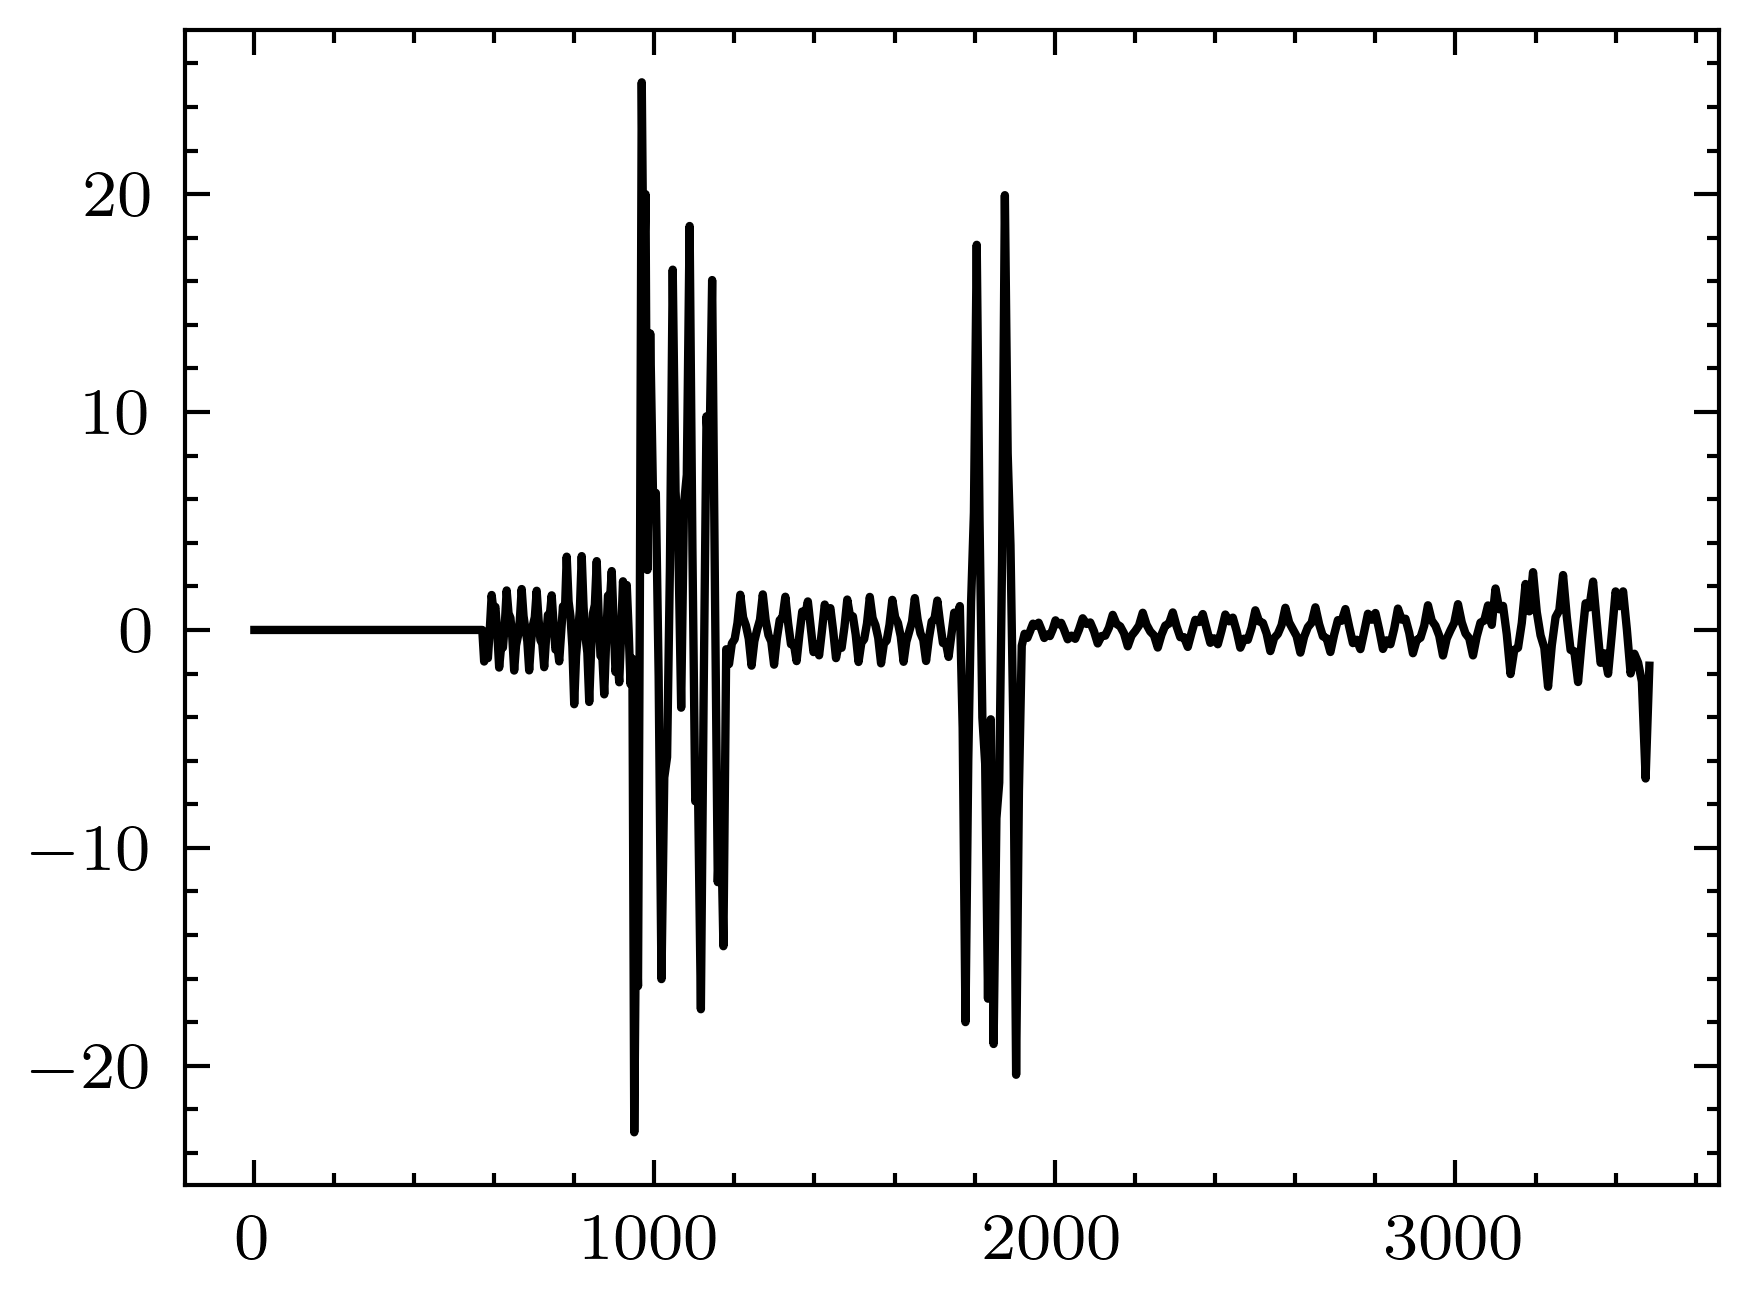

In [68]:
with plt.style.context(['science', 'ieee']):
    
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.show()

In [69]:
clic.apply_knob(knobs[0], -1.0)

Evaluating the rest of the knobs

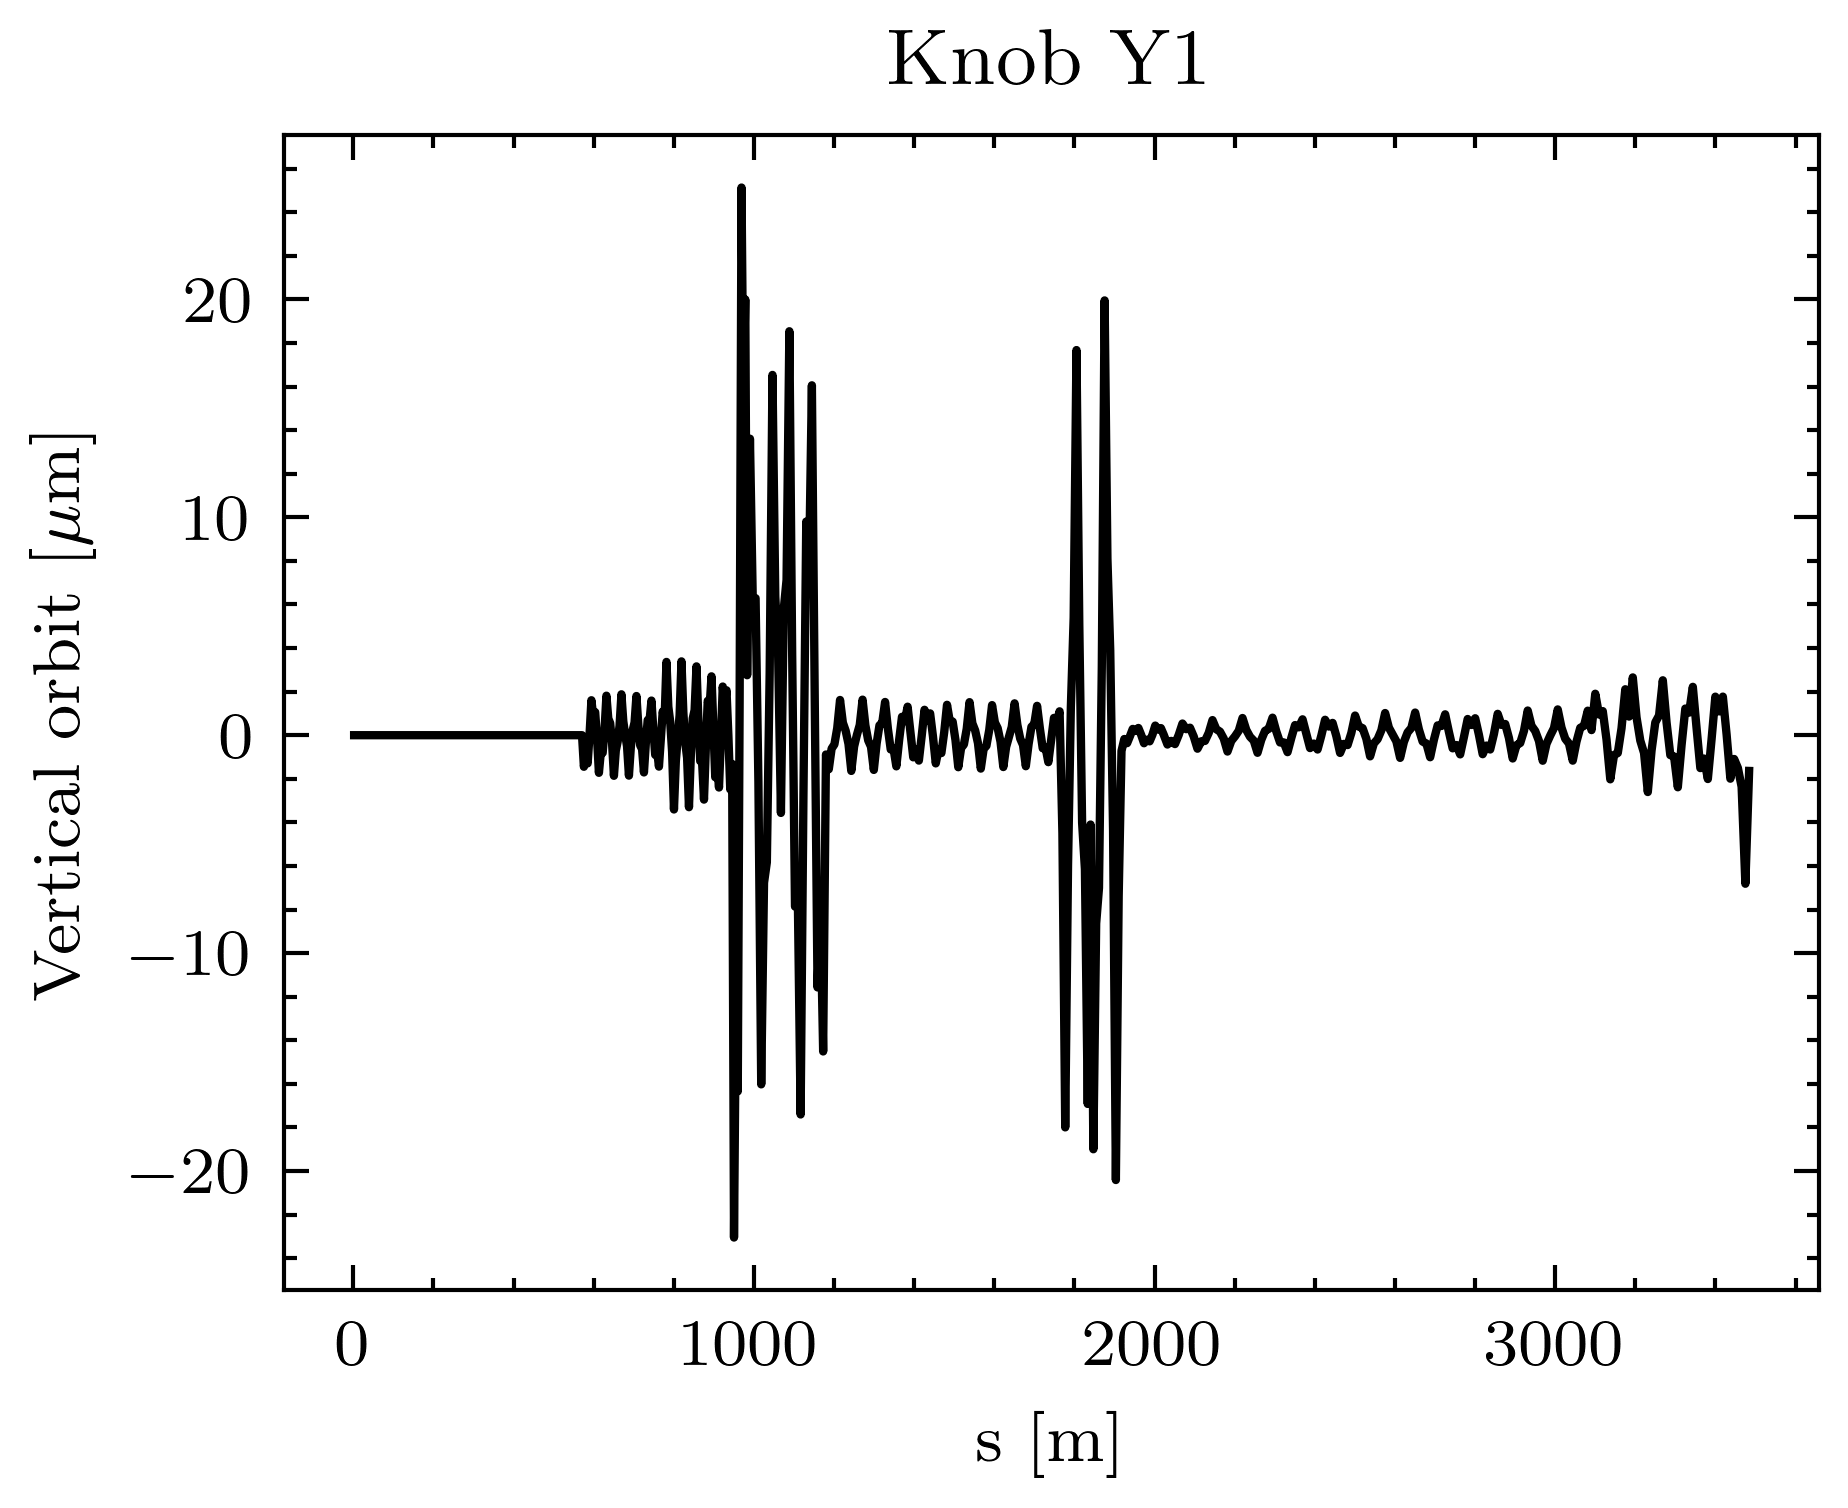

In [74]:
knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

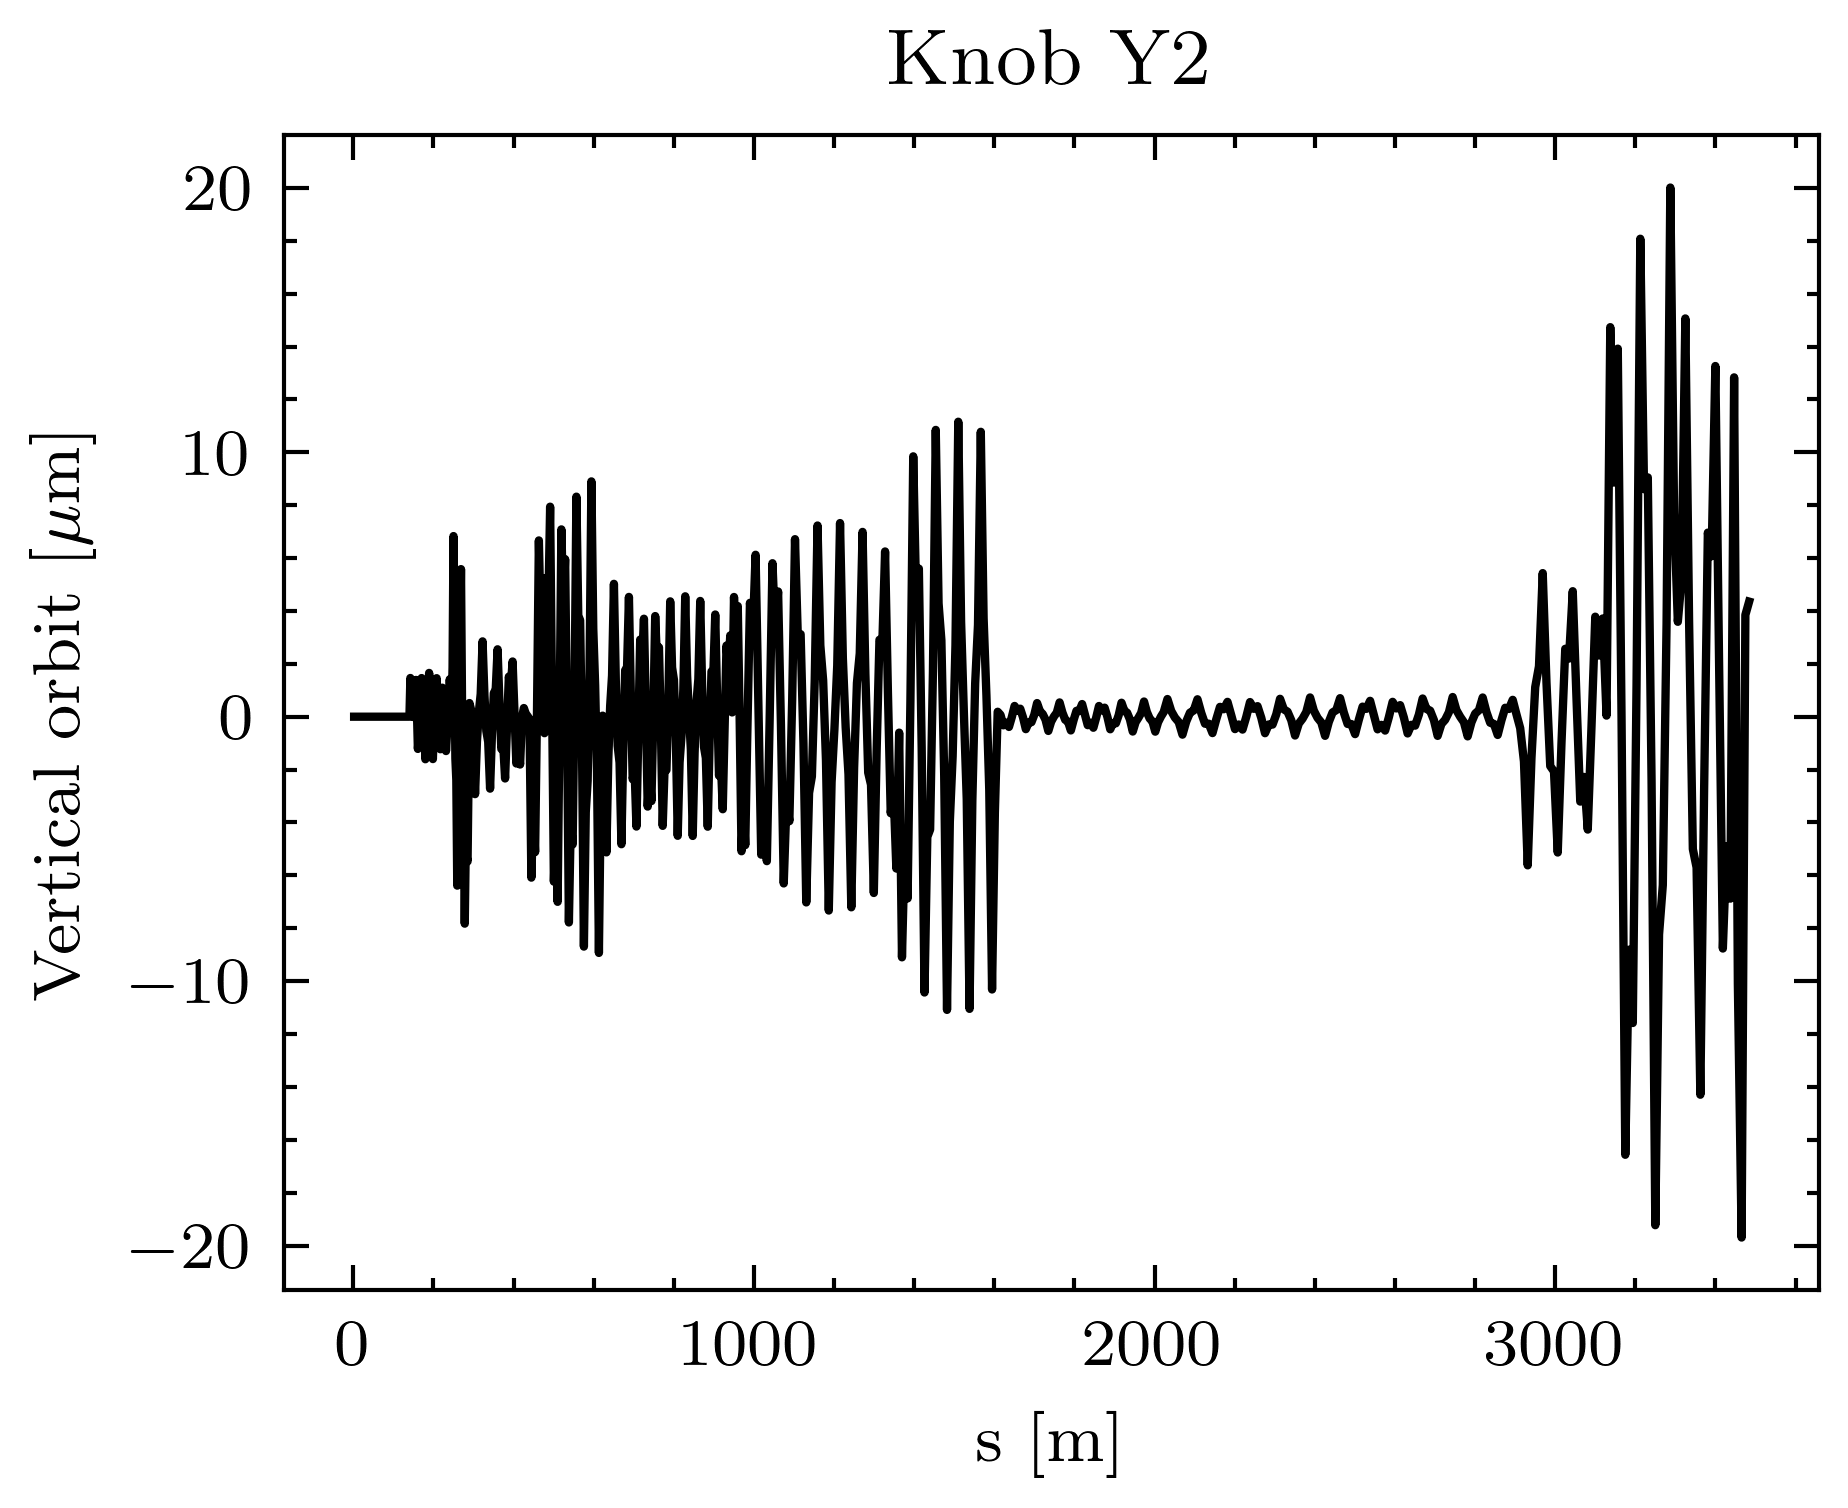

In [75]:
knob_id = 2

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

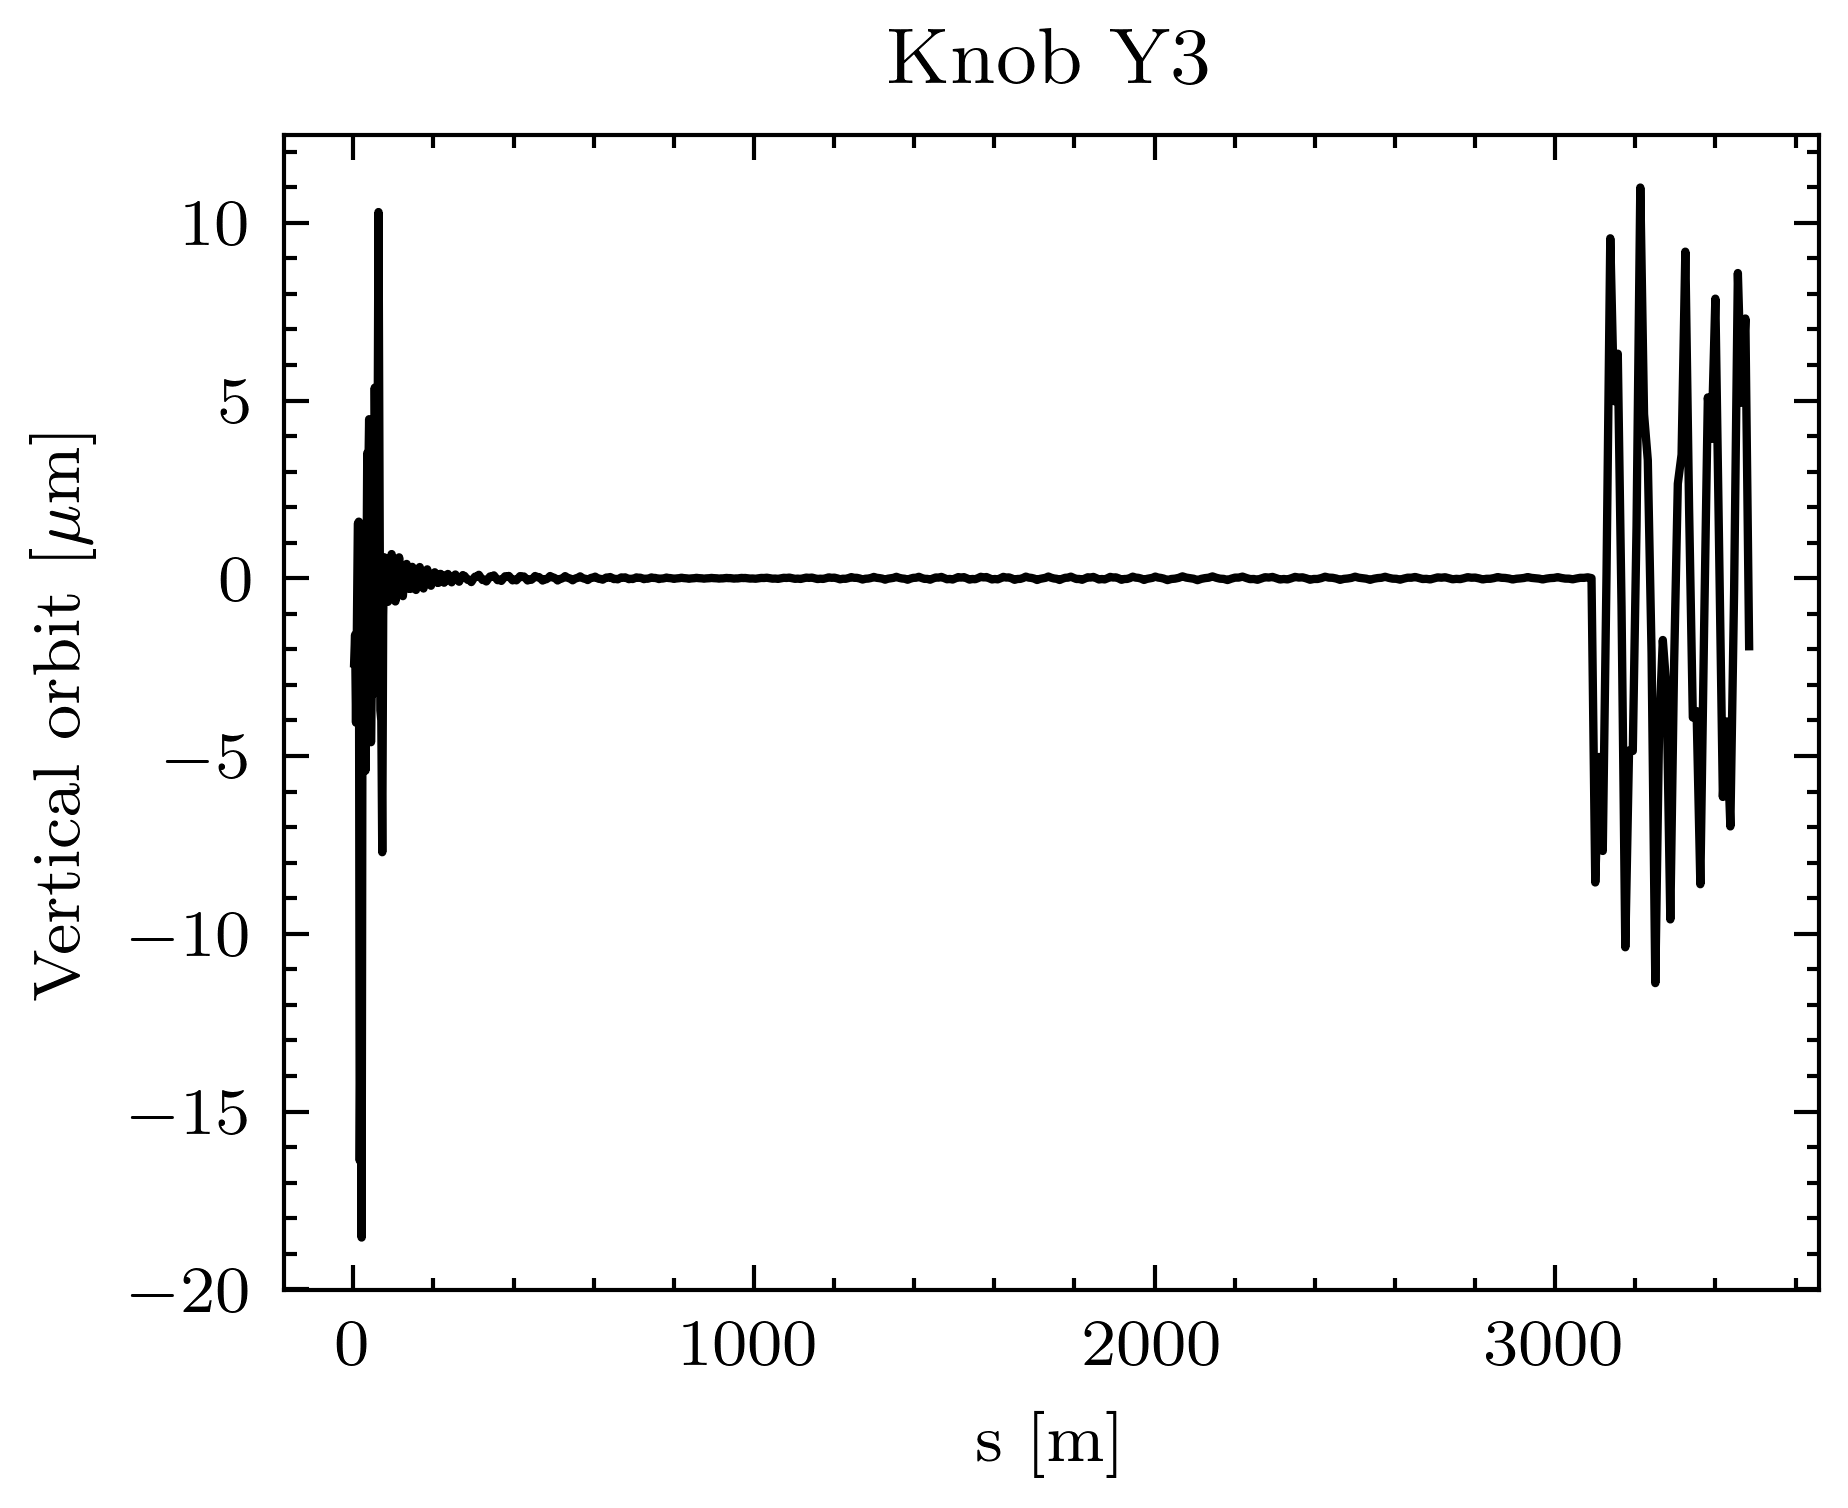

In [76]:
knob_id = 3

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

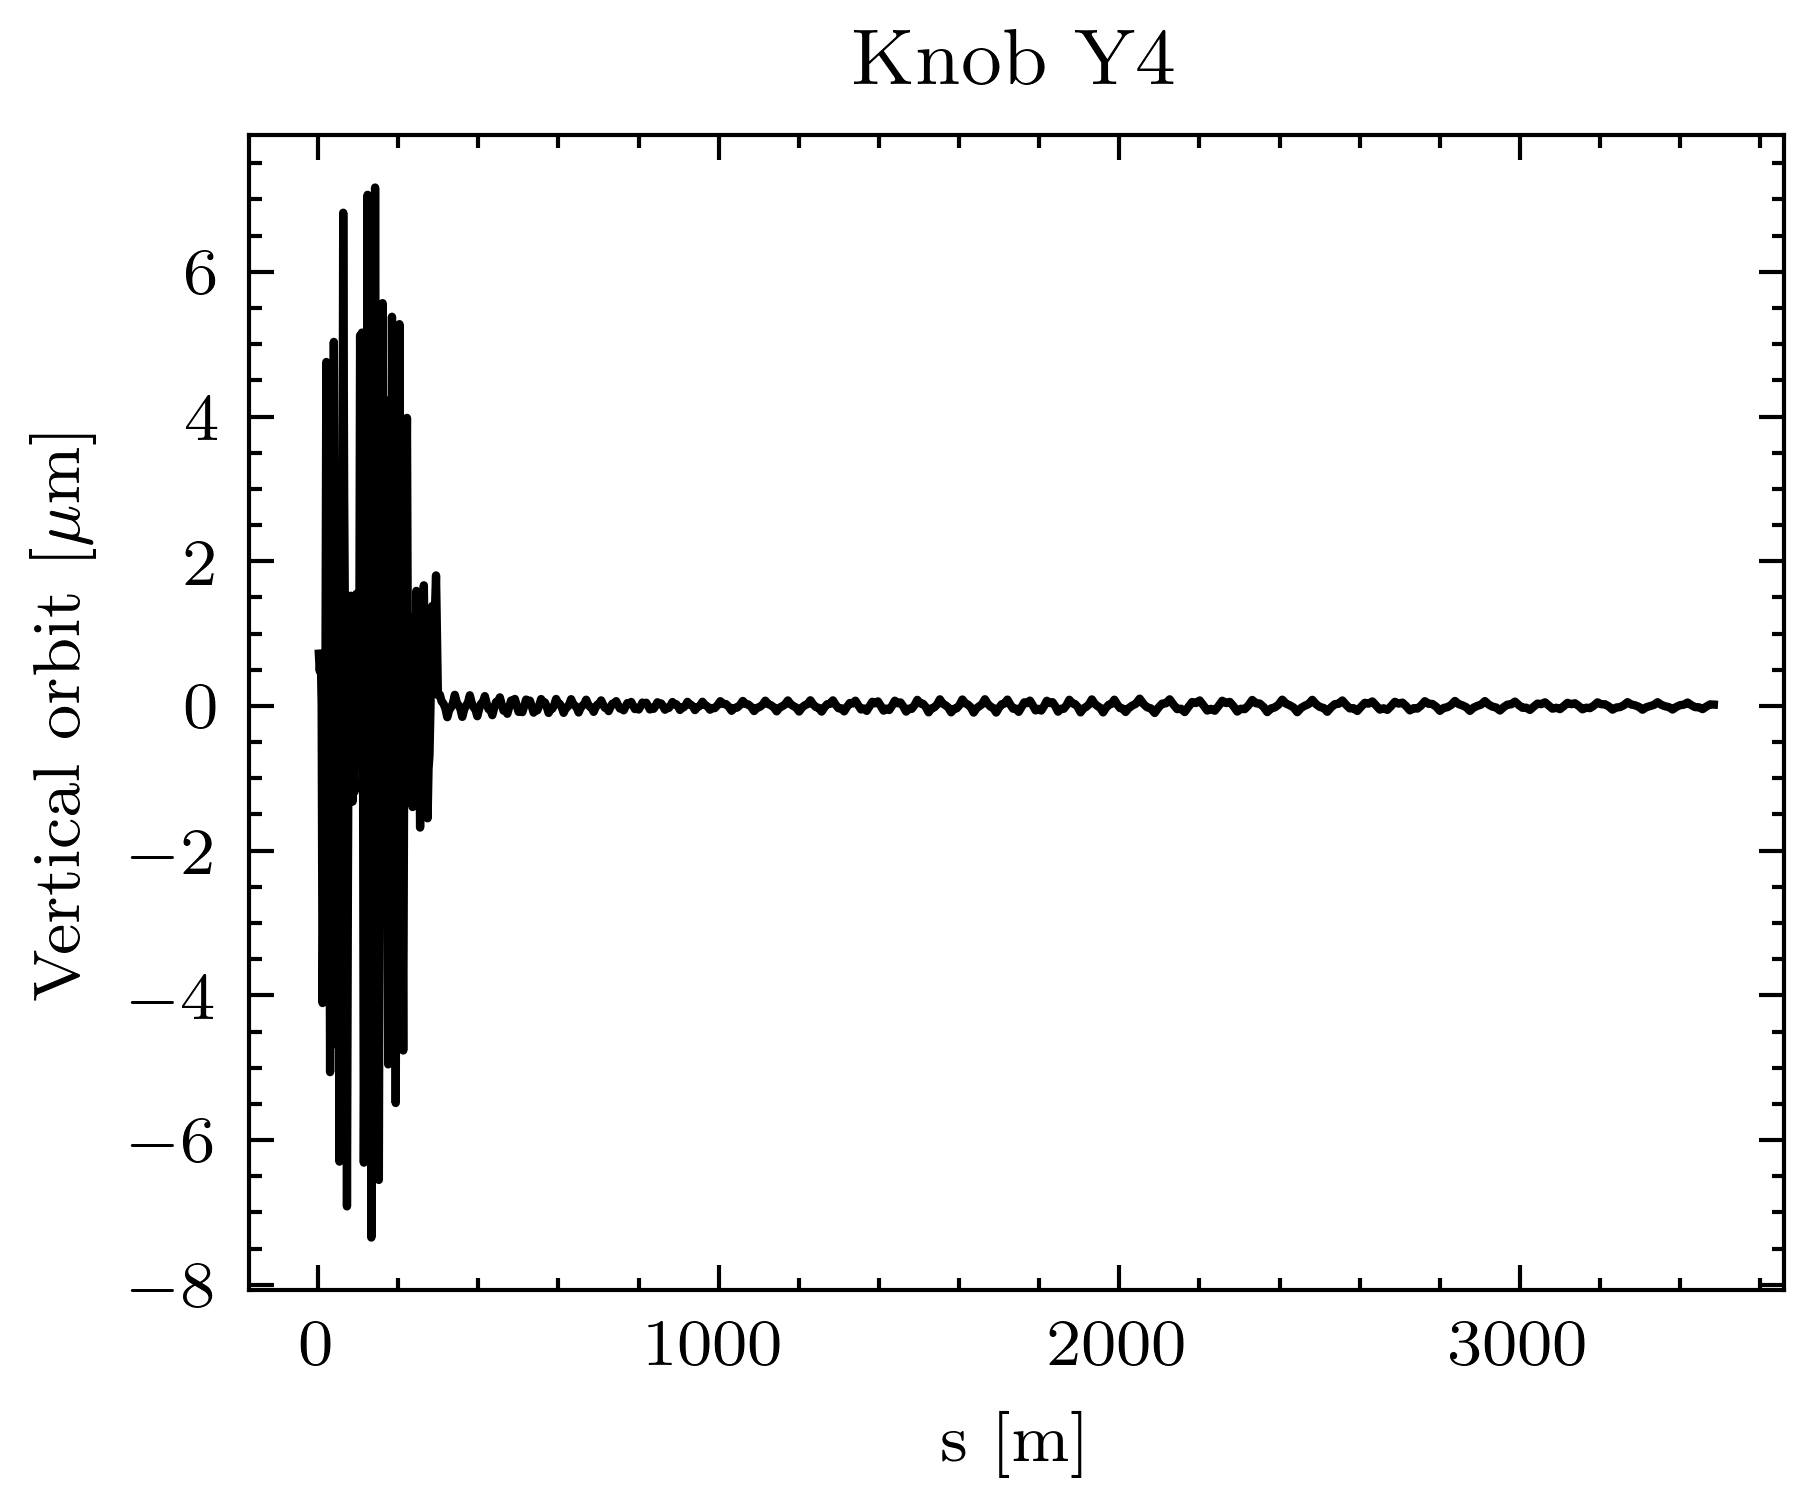

In [77]:
knob_id = 4

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

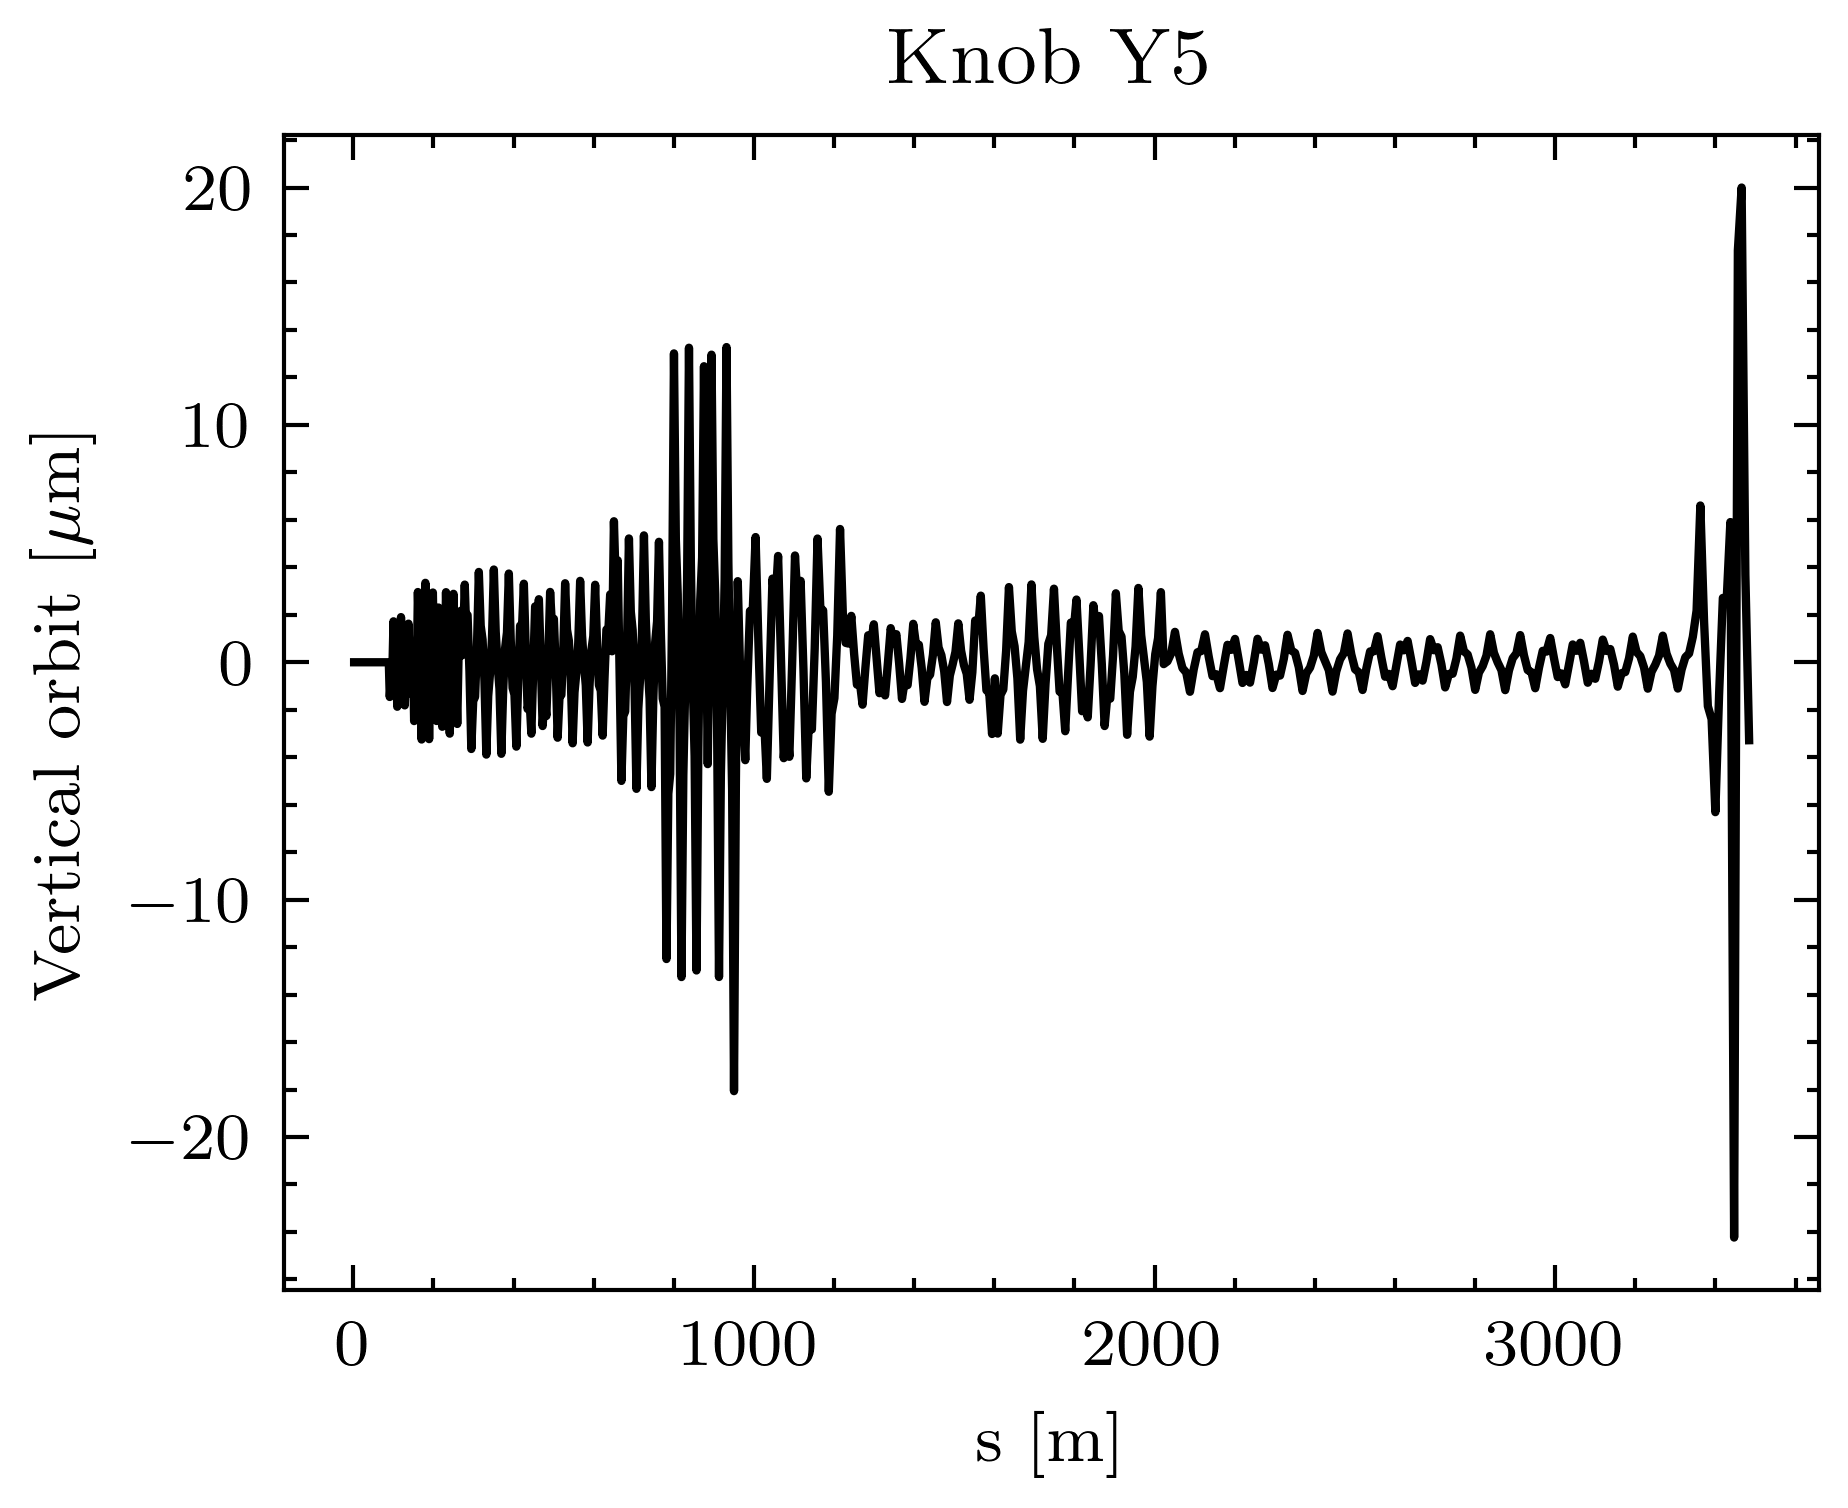

In [78]:
knob_id = 5

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

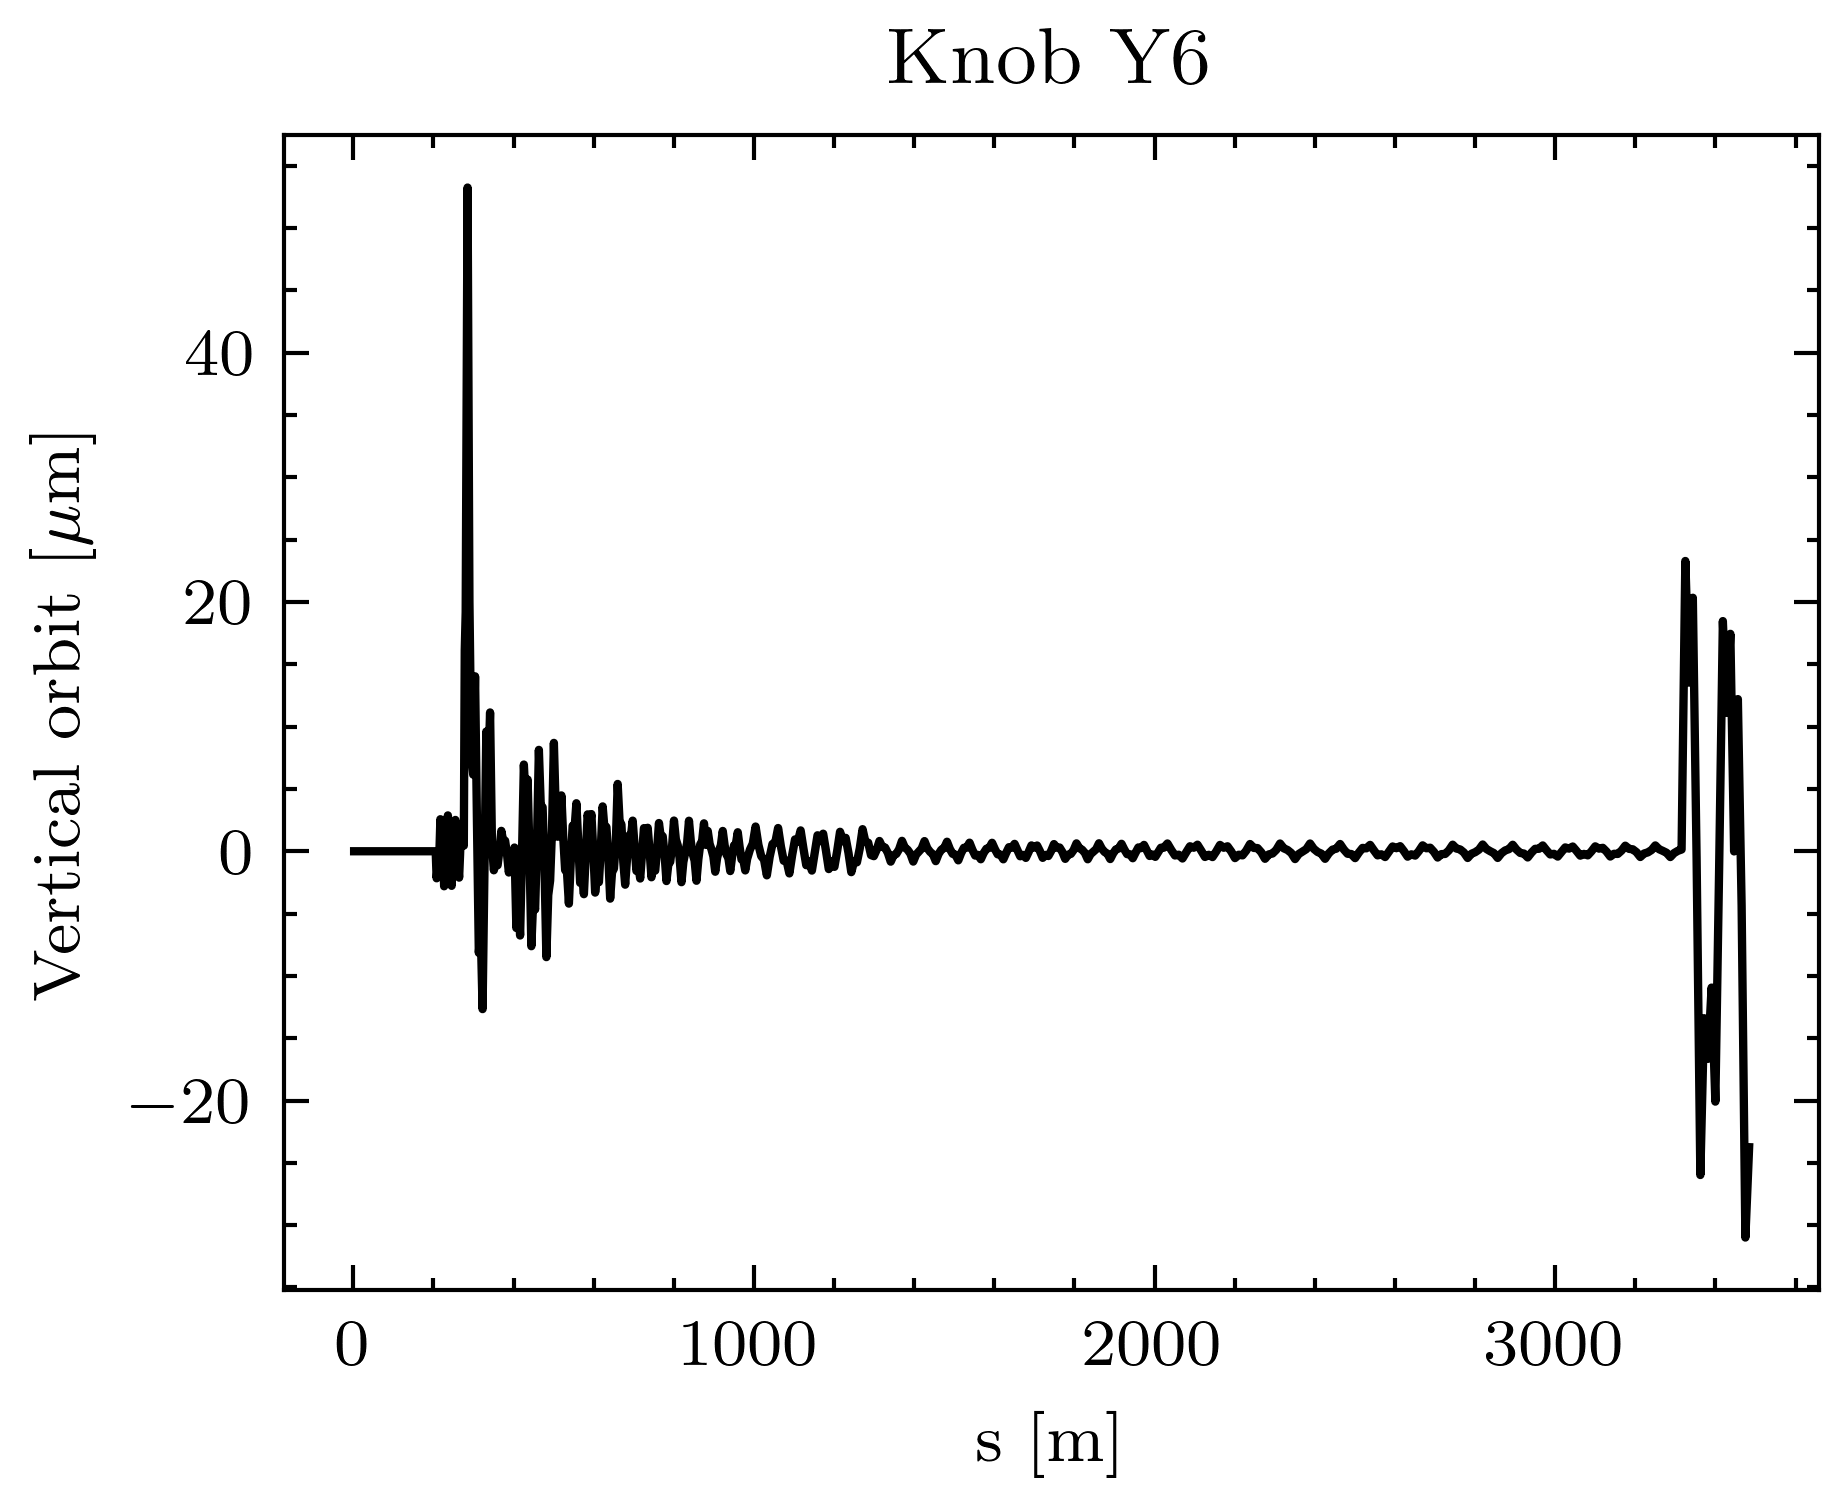

In [79]:
knob_id = 6

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

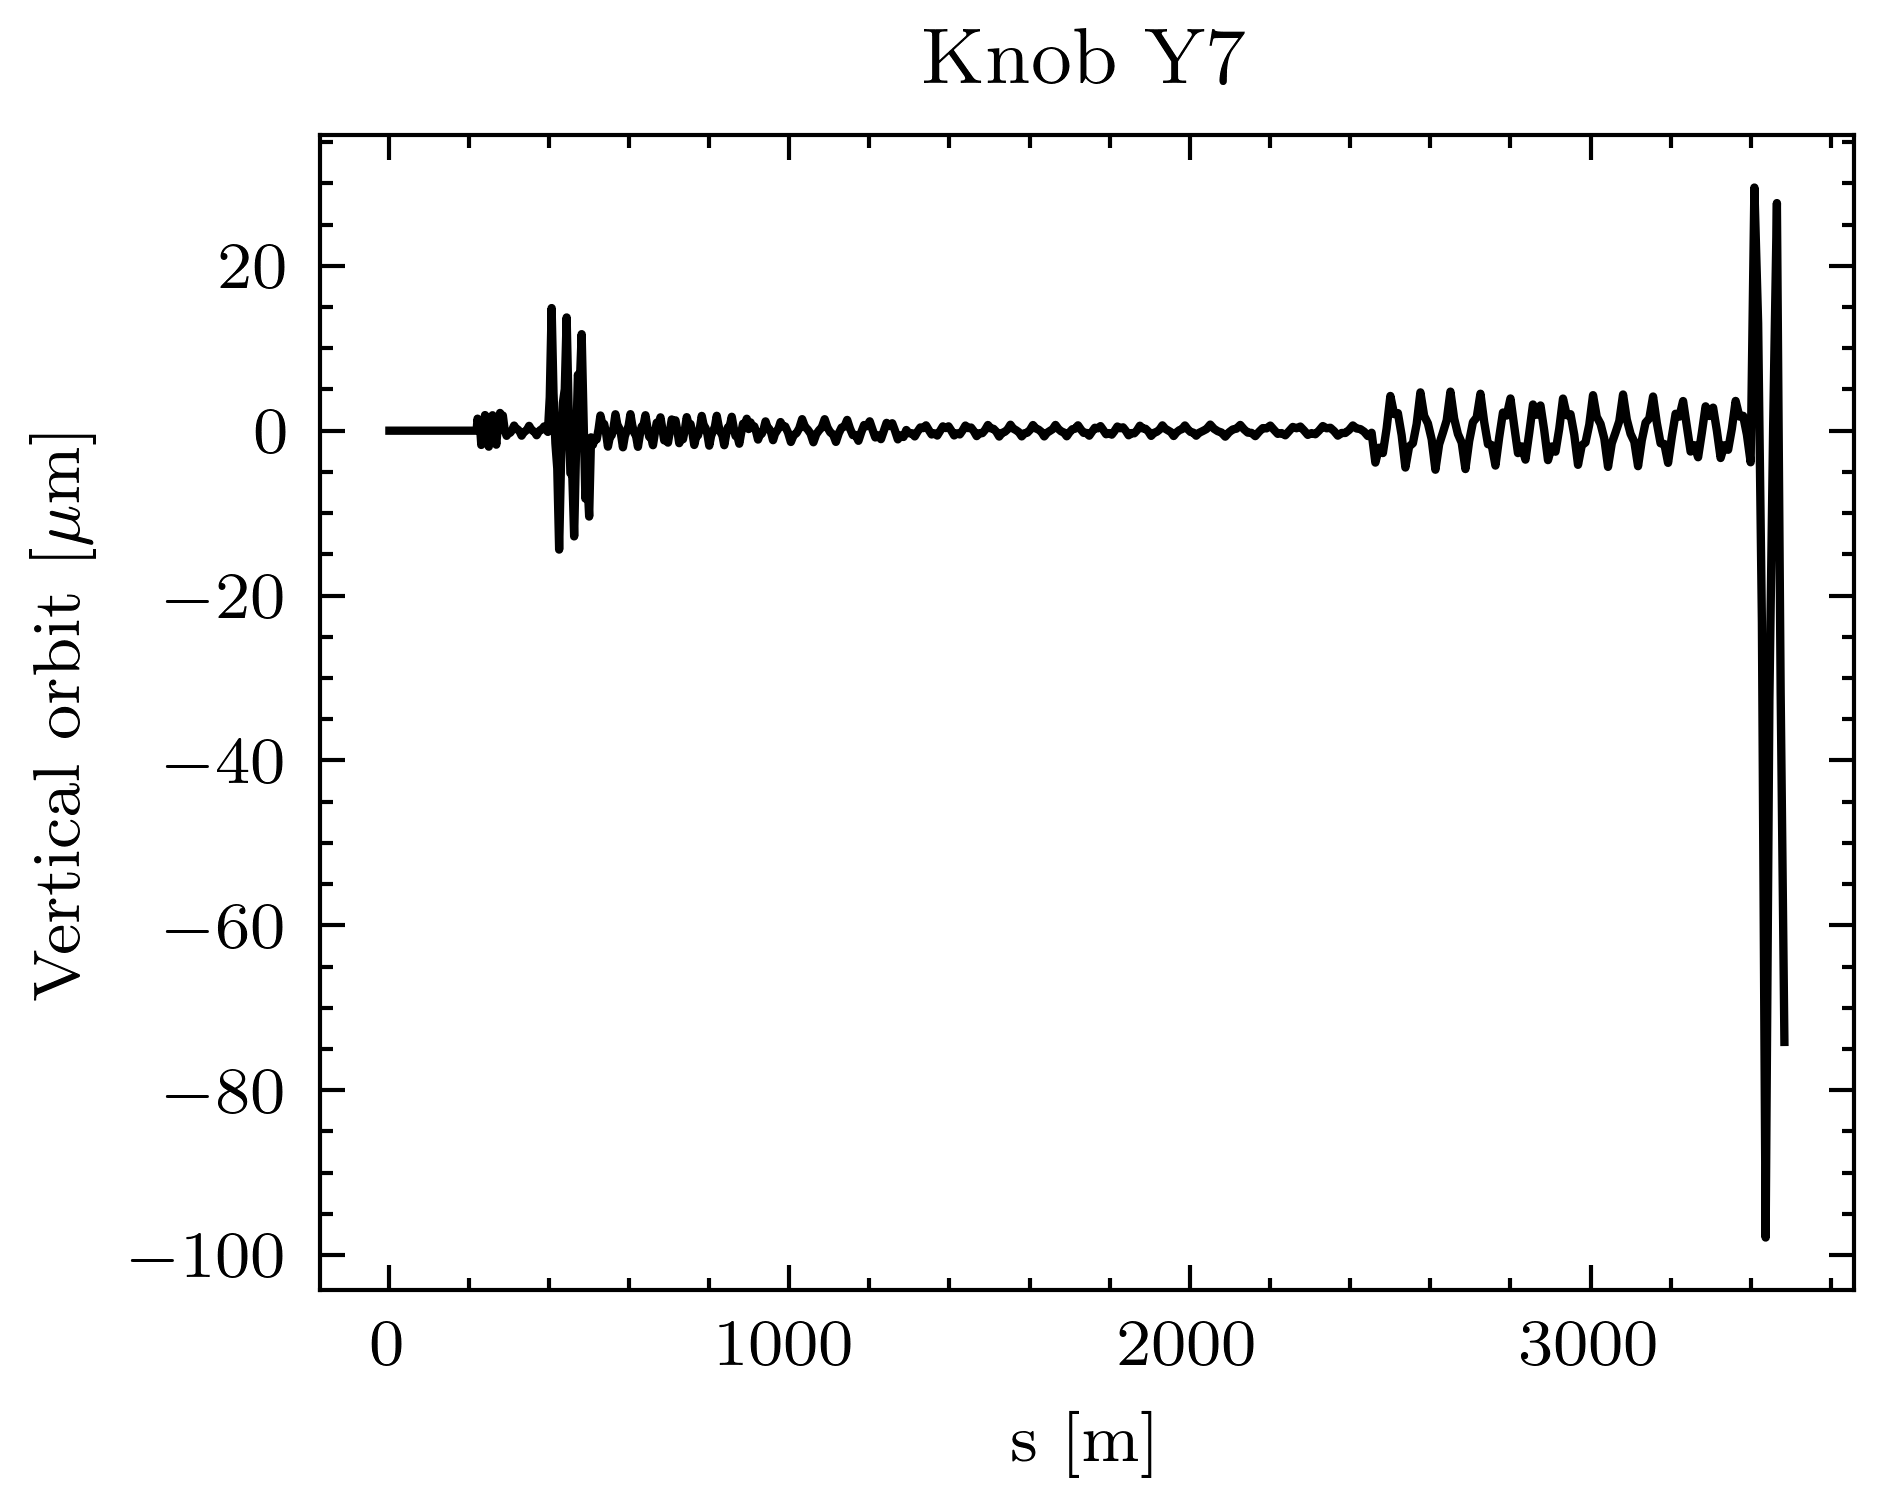

In [80]:
knob_id = 7

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

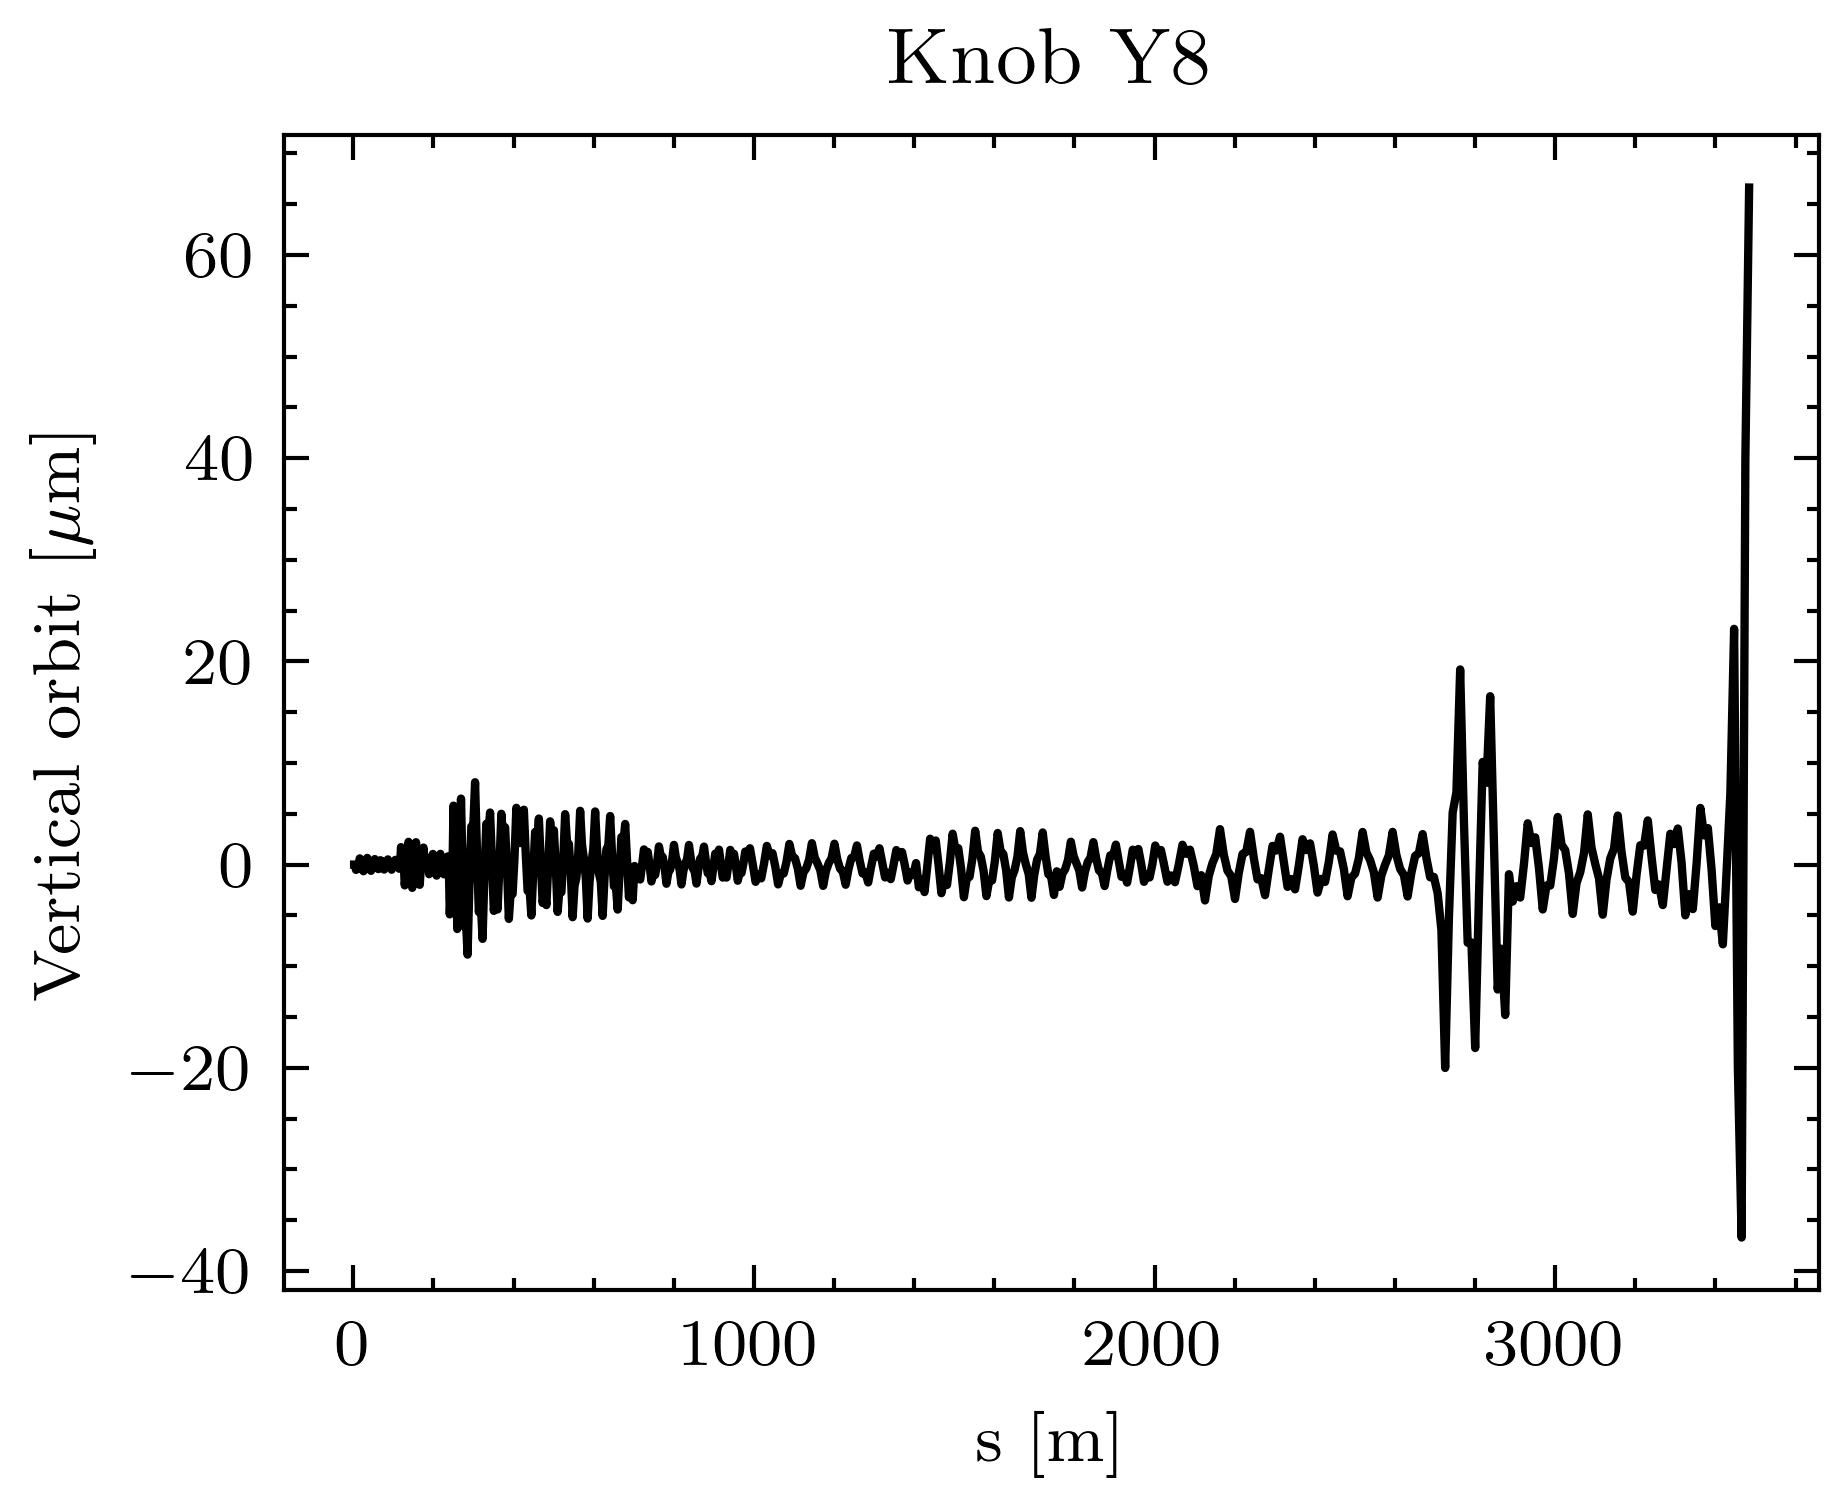

In [81]:
knob_id = 8

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

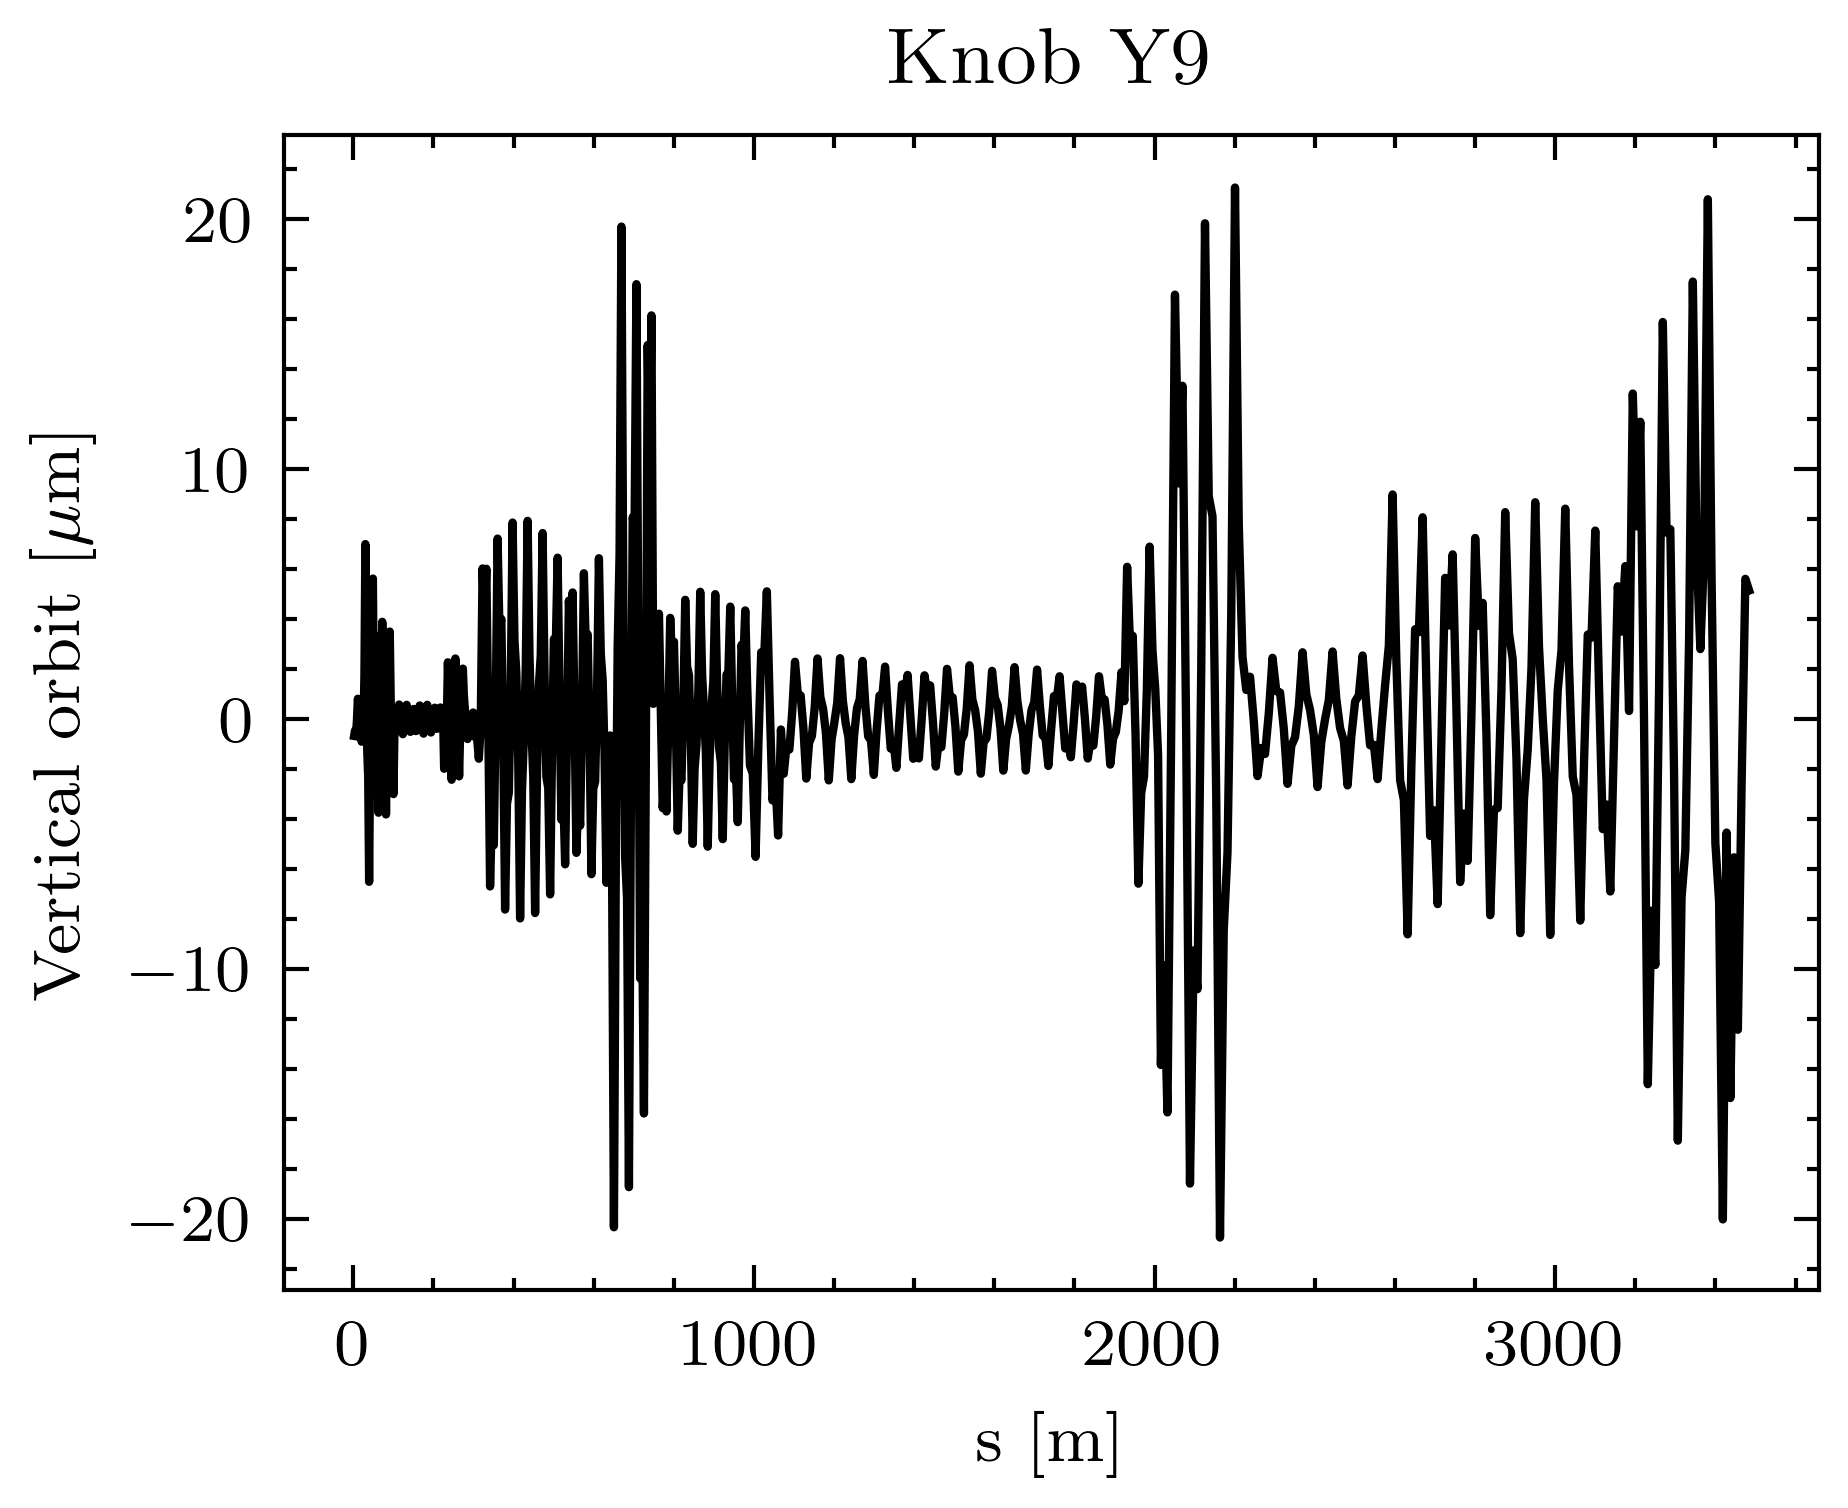

In [82]:
knob_id = 9

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

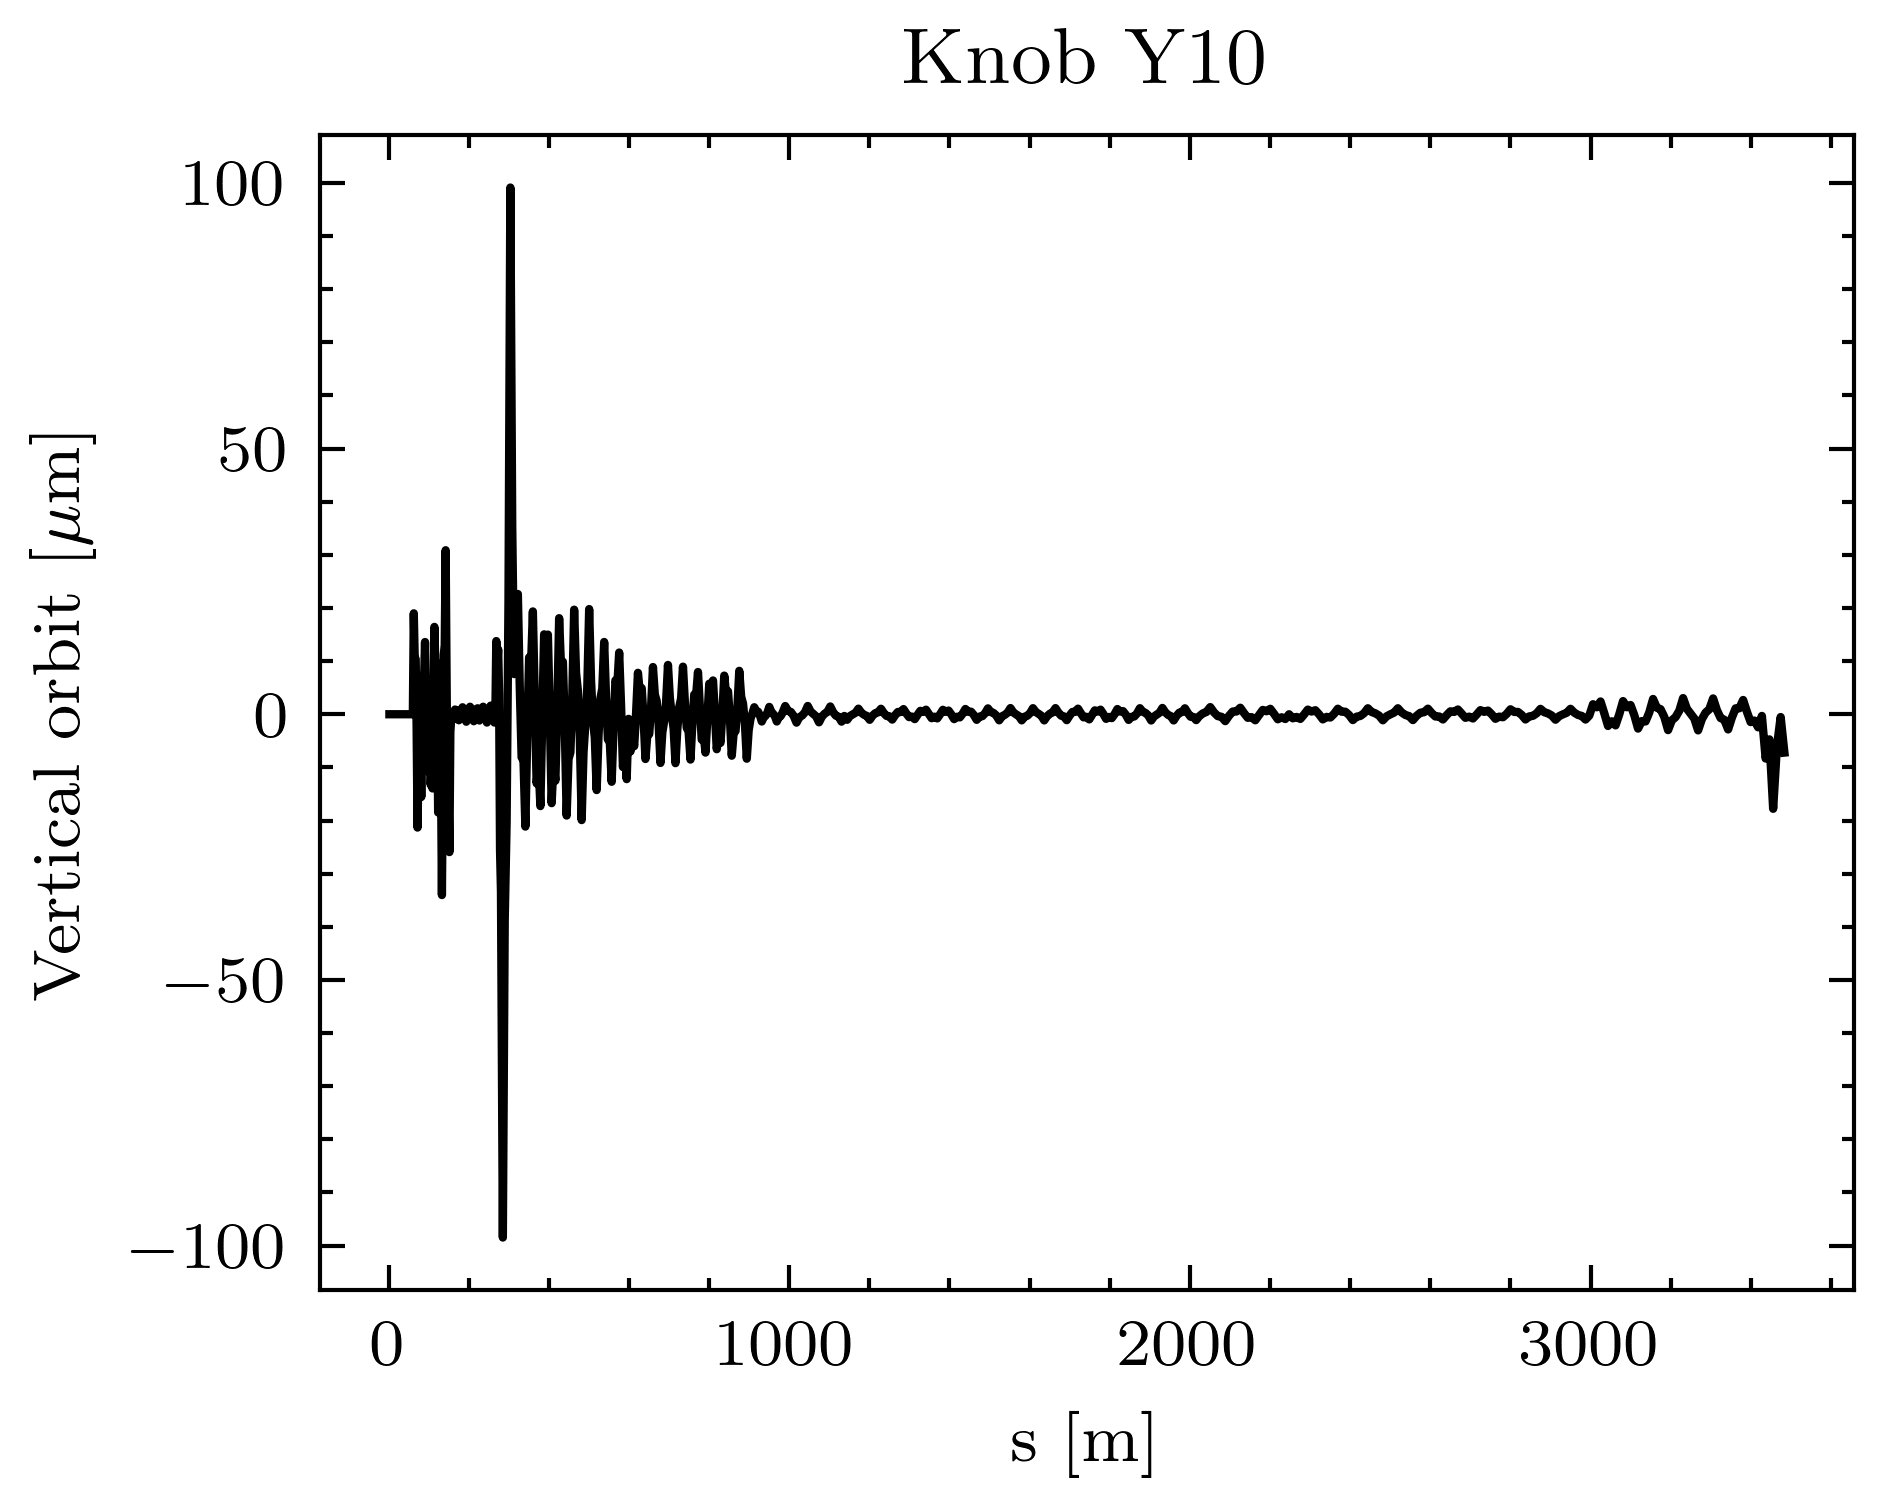

In [83]:
knob_id = 10

clic.apply_knob(knobs[knob_id - 1], 1.0)
beam_orbit = clic.eval_orbit(main_beam)

with plt.style.context(['science', 'ieee']):
    
    plt.title(f"Knob Y{knob_id}")
    plt.plot(beam_orbit.s, beam_orbit.y)
    
    plt.xlabel("s [m]")
    plt.ylabel(r"Vertical orbit [$\mu$m]")
    
    plt.show()

clic.apply_knob(knobs[knob_id - 1], -1.0)

Althougр the performance improved very much. There are still few knobs that have spikes in the orbit: **Y7**, **Y8**, and **Y10**. Maybe, I can fix that by increasing the number of elements. In the case of **Y7** there is a margin because I used the solution with 11 element. For example, if I go up to 20 elements, the orbit penalty goes down by a factor of 2. In the cases of **Y8** and **Y10** it is not possible, because I have chosen a solution with 19/20 elements and there is no place to go up to reduce the orbit loss more. Also, what is noticable, for these knobs the good performance was not achieved.

I think as a solution, I can keep increasing the number of elements since the total loss goes down for all of them. Maybe keeping this and runnning on my home PC. In the meantime, evaluating their performance.

In [93]:
# defining the neccesery functions for the knobs tuning - parabola fit function

def parabola(x, a, b, c) -> float:
    return a + b * (x - c)**2

def parabola_jac(x, a, b, c) -> np.array:
    J = np.zeros((len(x), 3))
    for i in range(len(x)):
        J[i][0] = 1
        J[i][1] = (x[i] - c)**2
        J[i][2] = -2 * b * (x[i] - c)

    return J

def parabola_fit(knob_range, observable_values, **kwargs) -> list:
    """
    Apply the parabolic fit for the knob scan

    Parameters
    ----------
    knob_range: list
        The knob values
    observable_values: list
        The observable values

    Additional parameters
    ---------------------
    init_guess: [double, double, double] default [1e-13, 10, 0.0]
        The list of the initial guesses for the parabola
    ignore_restrictions: bool default False
        If True, the initial fit result check is ignored

    Returns
    -------
    [double, func, message]
        The fitting summary of the format
        [
            fit_center,- double; center of the Gaussian fit
            fit_func- func; resulting fit function
            message	- str; message from the fit
        ]
    """
    try: 
        fit_params, pcov = optimize.curve_fit(parabola, knob_range, observable_values, kwargs.get("init_guess", [1e-13, 10, 0.0]), None, True, True, [-np.inf, np.inf], 'lm', parabola_jac)
    except RuntimeError:
        ''' fitting failed, setting to zero '''
        return [sum(knob_range) / len(knob_range), None, "Fitting failed! Setting to zero"]

    if kwargs.get('ignore_restrictions', False):
        ''' fitting succeeded, skipping the restrictions'''
        return [fit_params[2], lambda x: parabola(x, *fit_params), "Fit is correct! Smallest obs for " + str(fit_params[2])]

    """ Check of the fitting effectiveness """
    if fit_params[1] == 0:
        '''	incorrect fit, taking the average value'''
        return [sum(knob_range) / len(knob_range), None, "Fit is not correct! Setting to zero"]

    if fit_params[1] < 0.0:
        if fit_params[2] > 0.0:
            return [knob_range[0], None, "Fit is not correct! Setting to the boundary"]
        else:
            return [knob_range[1], None, "Fit is not correct! Setting to the boundary"]
    else:

        optimal = fit_params[2]
        '''Checking the boundaries'''
        if optimal > knob_range[-1]: optimal = knob_range[-1]
        if optimal < knob_range[0]: optimal = knob_range[0]

        return [optimal, lambda x: parabola(x, *fit_params), "Fit is correct! Smallest obs for " + str(optimal)]

In [87]:
# extra stuff for the tuning

import random

# Defining static errors
static_errors = {
    "quadrupole_x": 14.0,
    "quadrupole_y": 14.0,
    "quadrupole_roll": 100.0,
    "bpm_x": 14.0,
    "bpm_y": 14.0,
    "bpm_roll": 100.0,
    "cavity_x": 14.0,
    "cavity_y": 10.0,
    "cavity_realign_x": 3.5,
    "cavity_realign_y": 3.5,
    "cavity_xp": 141,
    "cavity_yp": 141
}

#extra beams for DFS
beam1 = clic.make_beam_slice_energy_gradient("dfs_beam1", 11, 5, 0.95, 0.9, int(random.random() * 1e5), **beam_parameters)
cbeam0 = clic.make_beam_slice_energy_gradient("dfs_cbeam0", 1, 1, 1.0, 1.0, int(random.random() * 1e5), **beam_parameters)
cbeam1 = clic.make_beam_slice_energy_gradient("dfs_cbeam1", 1, 1, 0.95, 0.9, int(random.random() * 1e5), **beam_parameters)


In [88]:
print(clic)

Machine(placet = Placet(is_alive = True), beamline = Beamline(name = 'ml', structure = 
      name        type  girder           s    x   xp    y   yp
0           Quadrupole       1     0.21500  0.0  0.0  0.0  0.0
1                Drift       1     0.27500  0.0  0.0  0.0  0.0
2               Cavity       1     0.81833  0.0  0.0  0.0  0.0
3                Drift       1     0.85833  0.0  0.0  0.0  0.0
4               Cavity       1     1.40166  0.0  0.0  0.0  0.0
...    ...         ...     ...         ...  ...  ...  ...  ...
13524           Cavity    1488  3483.28447  0.0  0.0  0.0  0.0
13525            Drift    1488  3483.32447  0.0  0.0  0.0  0.0
13526           Cavity    1488  3483.86780  0.0  0.0  0.0  0.0
13527            Drift    1488  3483.88780  0.0  0.0  0.0  0.0
13528              Bpm    1489  3483.96780  0.0  0.0  0.0  0.0

[13529 rows x 8 columns]), beams available = ['main_beam', 'dfs_beam1', 'dfs_cbeam0', 'dfs_cbeam1'])


In [94]:
# performing the tuning on 100 different error seeds
scan_res = []

for i in tqdm.tqdm(range(1000)):
    clic.assign_errors("default_clic", static_errors = static_errors, scatter_y = 12.0, flo_y = 5.0)

    correction_summary = clic.track(main_beam)

    #+++++++++++121 correction+++++++++++
    one_2_one = clic.one_2_one(main_beam, bpm_resolution = 0.1)
    correction_summary = pd.concat([correction_summary, one_2_one])

    #+++++++++++DFS+++++++++++
    dfs_options = {
        'wgt1': 1000, 
        'bin_iteration': 3, 
        'correct_full_bin': 1, 
        'binlength': 36, 
        'binoverlap': 18,
        'bpm_resolution': 0.1,
        'beam1': beam1,
        'cbeam0': cbeam0,
        'cbeam1': cbeam1
    }

    dfs = clic.DFS(main_beam, **dict(dfs_options))
    correction_summary = pd.concat([correction_summary, dfs])

    #+++++++++++RF alignment+++++++++++
    rf = clic.RF_align(main_beam, girder = 1, bpm_resolution = 0.1)
    correction_summary = pd.concat([correction_summary, rf])
    
    #+++++++++++Knobs scan+++++++++++
    for knob in knobs:
        clic.scan_knob(main_beam, knob, 'emitty', np.linspace(-1.0, 1.0, 10), parabola_fit)
    
    correction_summary = pd.concat([correction_summary, clic.track(main_beam)])
 #   print(correction_summary)
    scan_res.append(correction_summary)

100%|██████████| 1000/1000 [4:22:28<00:00, 15.75s/it] 


In [91]:
from scipy import optimize

In [96]:
for data in scan_res:
    print(data)

  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  24470.6  12532.600000   
0      1-2-1  main_beam  from_file           None     None      3.459180   
0        DFS  main_beam  from_file           None     None      0.561218   
0   RF align  main_beam  from_file           None   8.0165      0.104480   
0         No  main_beam  from_file           None  8.01653      0.100715   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  6882.25  26950.900000   
0      1-2-1  main_beam  from_file           None     None      2.079230   
0        DFS  main_beam  from_file           None     None      0.157424   
0   RF align  main_beam  from_file           None  8.01257      0.106144   
0         No  main_beam  from_file           None  8.01253      0.101747   

  beamli

0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  21347.9  29875.500000   
0      1-2-1  main_beam  from_file           None     None      5.637580   
0        DFS  main_beam  from_file           None     None      0.651051   
0   RF align  main_beam  from_file           None    8.021      0.108385   
0         No  main_beam  from_file           None  8.02106      0.101565   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  13115.2  17844.200000   
0      1-2-1  main_beam  from_file           None     None      1.451550   
0        DFS  main_beam  from_file           None     None      0.286721   
0   RF align  main_beam  from_file           None  8.01888      0.106716   
0         No  main_beam  from_file           None  8.01897      0.101483

0       ml  
  correction       beam     survey positions_file   emittx       emitty  \
0         No  main_beam  from_file           None  5415.48  7773.120000   
0      1-2-1  main_beam  from_file           None     None     2.611850   
0        DFS  main_beam  from_file           None     None     0.180954   
0   RF align  main_beam  from_file           None   8.0157     0.111714   
0         No  main_beam  from_file           None  8.01561     0.101686   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx       emitty  \
0         No  main_beam  from_file           None  18340.9  9877.980000   
0      1-2-1  main_beam  from_file           None     None     0.538554   
0        DFS  main_beam  from_file           None     None     0.160469   
0   RF align  main_beam  from_file           None  8.01412     0.109062   
0         No  main_beam  from_file           None  8.01409     0.101307   

  beaml

  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None   5242.3  15673.700000   
0      1-2-1  main_beam  from_file           None     None      4.055810   
0        DFS  main_beam  from_file           None     None      0.344815   
0   RF align  main_beam  from_file           None  8.01629      0.111953   
0         No  main_beam  from_file           None  8.01612      0.102860   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  7201.71  23013.300000   
0      1-2-1  main_beam  from_file           None     None      2.263480   
0        DFS  main_beam  from_file           None     None      0.905037   
0   RF align  main_beam  from_file           None  8.02395      0.123982   
0         No  main_beam  from_file           None  8.02383      0.101042   

  beamli

0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  10435.3  47087.900000   
0      1-2-1  main_beam  from_file           None     None      5.740070   
0        DFS  main_beam  from_file           None     None      0.218661   
0   RF align  main_beam  from_file           None  8.02298      0.104291   
0         No  main_beam  from_file           None  8.02294      0.101531   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  8481.77  11828.200000   
0      1-2-1  main_beam  from_file           None     None      4.305670   
0        DFS  main_beam  from_file           None     None      0.654107   
0   RF align  main_beam  from_file           None  8.02022      0.109740   
0         No  main_beam  from_file           None  8.02026      0.101380

0       ml  
  correction       beam     survey positions_file   emittx       emitty  \
0         No  main_beam  from_file           None  8194.77  6020.460000   
0      1-2-1  main_beam  from_file           None     None     2.739970   
0        DFS  main_beam  from_file           None     None     0.532757   
0   RF align  main_beam  from_file           None  8.01545     0.107633   
0         No  main_beam  from_file           None  8.01548     0.101665   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  11475.6  11538.100000   
0      1-2-1  main_beam  from_file           None     None      2.331590   
0        DFS  main_beam  from_file           None     None      0.124391   
0   RF align  main_beam  from_file           None  8.02551      0.104616   
0         No  main_beam  from_file           None  8.02549      0.101173   

 

0       ml  
  correction       beam     survey positions_file   emittx       emitty  \
0         No  main_beam  from_file           None  6996.36  9369.600000   
0      1-2-1  main_beam  from_file           None     None     1.453410   
0        DFS  main_beam  from_file           None     None     0.164157   
0   RF align  main_beam  from_file           None   8.0167     0.108373   
0         No  main_beam  from_file           None  8.01667     0.101187   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  24347.8  21406.300000   
0      1-2-1  main_beam  from_file           None     None      4.810110   
0        DFS  main_beam  from_file           None     None      0.367034   
0   RF align  main_beam  from_file           None  8.01801      0.119388   
0         No  main_beam  from_file           None   8.0184      0.102639   

 

0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  11637.7  26812.800000   
0      1-2-1  main_beam  from_file           None     None      3.745300   
0        DFS  main_beam  from_file           None     None      0.362608   
0   RF align  main_beam  from_file           None  8.02269      0.104764   
0         No  main_beam  from_file           None  8.02271      0.102309   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  11095.3  18875.600000   
0      1-2-1  main_beam  from_file           None     None      1.908830   
0        DFS  main_beam  from_file           None     None      0.279873   
0   RF align  main_beam  from_file           None  8.01493      0.103335   
0         No  main_beam  from_file           None  8.01495      0.100989

  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  16356.9  10658.700000   
0      1-2-1  main_beam  from_file           None     None      5.875910   
0        DFS  main_beam  from_file           None     None      0.462957   
0   RF align  main_beam  from_file           None  8.01343      0.114696   
0         No  main_beam  from_file           None  8.01326      0.101653   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx       emitty  \
0         No  main_beam  from_file           None  11844.7  4653.940000   
0      1-2-1  main_beam  from_file           None     None     5.428130   
0        DFS  main_beam  from_file           None     None     0.845358   
0   RF align  main_beam  from_file           None  8.01518     0.109503   
0         No  main_beam  from_file           None  8.01516     0.100767   

  beamline  
0

0       ml  
  correction       beam     survey positions_file   emittx       emitty  \
0         No  main_beam  from_file           None  24178.5  4485.210000   
0      1-2-1  main_beam  from_file           None     None     0.766846   
0        DFS  main_beam  from_file           None     None     0.293031   
0   RF align  main_beam  from_file           None  8.01134     0.107755   
0         No  main_beam  from_file           None   8.0114     0.101094   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx       emitty  \
0         No  main_beam  from_file           None  43732.8  4938.290000   
0      1-2-1  main_beam  from_file           None     None     1.395450   
0        DFS  main_beam  from_file           None     None     0.216168   
0   RF align  main_beam  from_file           None  8.01095     0.110041   
0         No  main_beam  from_file           None  8.01093     0.102409   

  beaml

0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None   7402.3  36682.600000   
0      1-2-1  main_beam  from_file           None     None      4.913380   
0        DFS  main_beam  from_file           None     None      0.444293   
0   RF align  main_beam  from_file           None  8.01452      0.108941   
0         No  main_beam  from_file           None  8.01457      0.101725   

  beamline  
0       ml  
0       ml  
0       ml  
0       ml  
0       ml  
  correction       beam     survey positions_file   emittx        emitty  \
0         No  main_beam  from_file           None  14876.9  16007.300000   
0      1-2-1  main_beam  from_file           None     None      4.359820   
0        DFS  main_beam  from_file           None     None      0.398278   
0   RF align  main_beam  from_file           None  8.01417      0.109472   
0         No  main_beam  from_file           None  8.01432      0.102243

In [97]:
one2one_res, dfs_res, rf_res, knobs_res = [], [], [], []
for data in scan_res:
    one2one_res.append((data[data.correction == '1-2-1'].emitty[0] - 0.100151) * 100)
    dfs_res.append((data[data.correction == 'DFS'].emitty[0] - 0.100151) * 100)
    rf_res.append((data[data.correction == 'RF align'].emitty[0] - 0.100151) * 100)
    knobs_res.append((data[data.correction == 'No'].emitty.values[1] - 0.100151) * 100)

In [98]:
def counter(data_list, x_min, x_max):
    return(len(list(filter(lambda x: x > x_min and x < x_max, data_list))))

def transform(data_list, x_range = 100.0, n_bins = 200):
    N = len(data_list)
    res_x, res_y = [0], [0]
    step = x_range / n_bins
    for i in range(1, n_bins + 1):
        res_x.append(step * i)
        res_y.append(res_y[-1] + counter(data_list, step * (i - 1), step * i) / N)
    return res_x, res_y

In [99]:
res_x, one2one_res_tr = transform(one2one_res)
__, dfs_res_tr = transform(dfs_res)
__, rf_res_tr = transform(rf_res)
__, knobs_res_tr = transform(knobs_res)


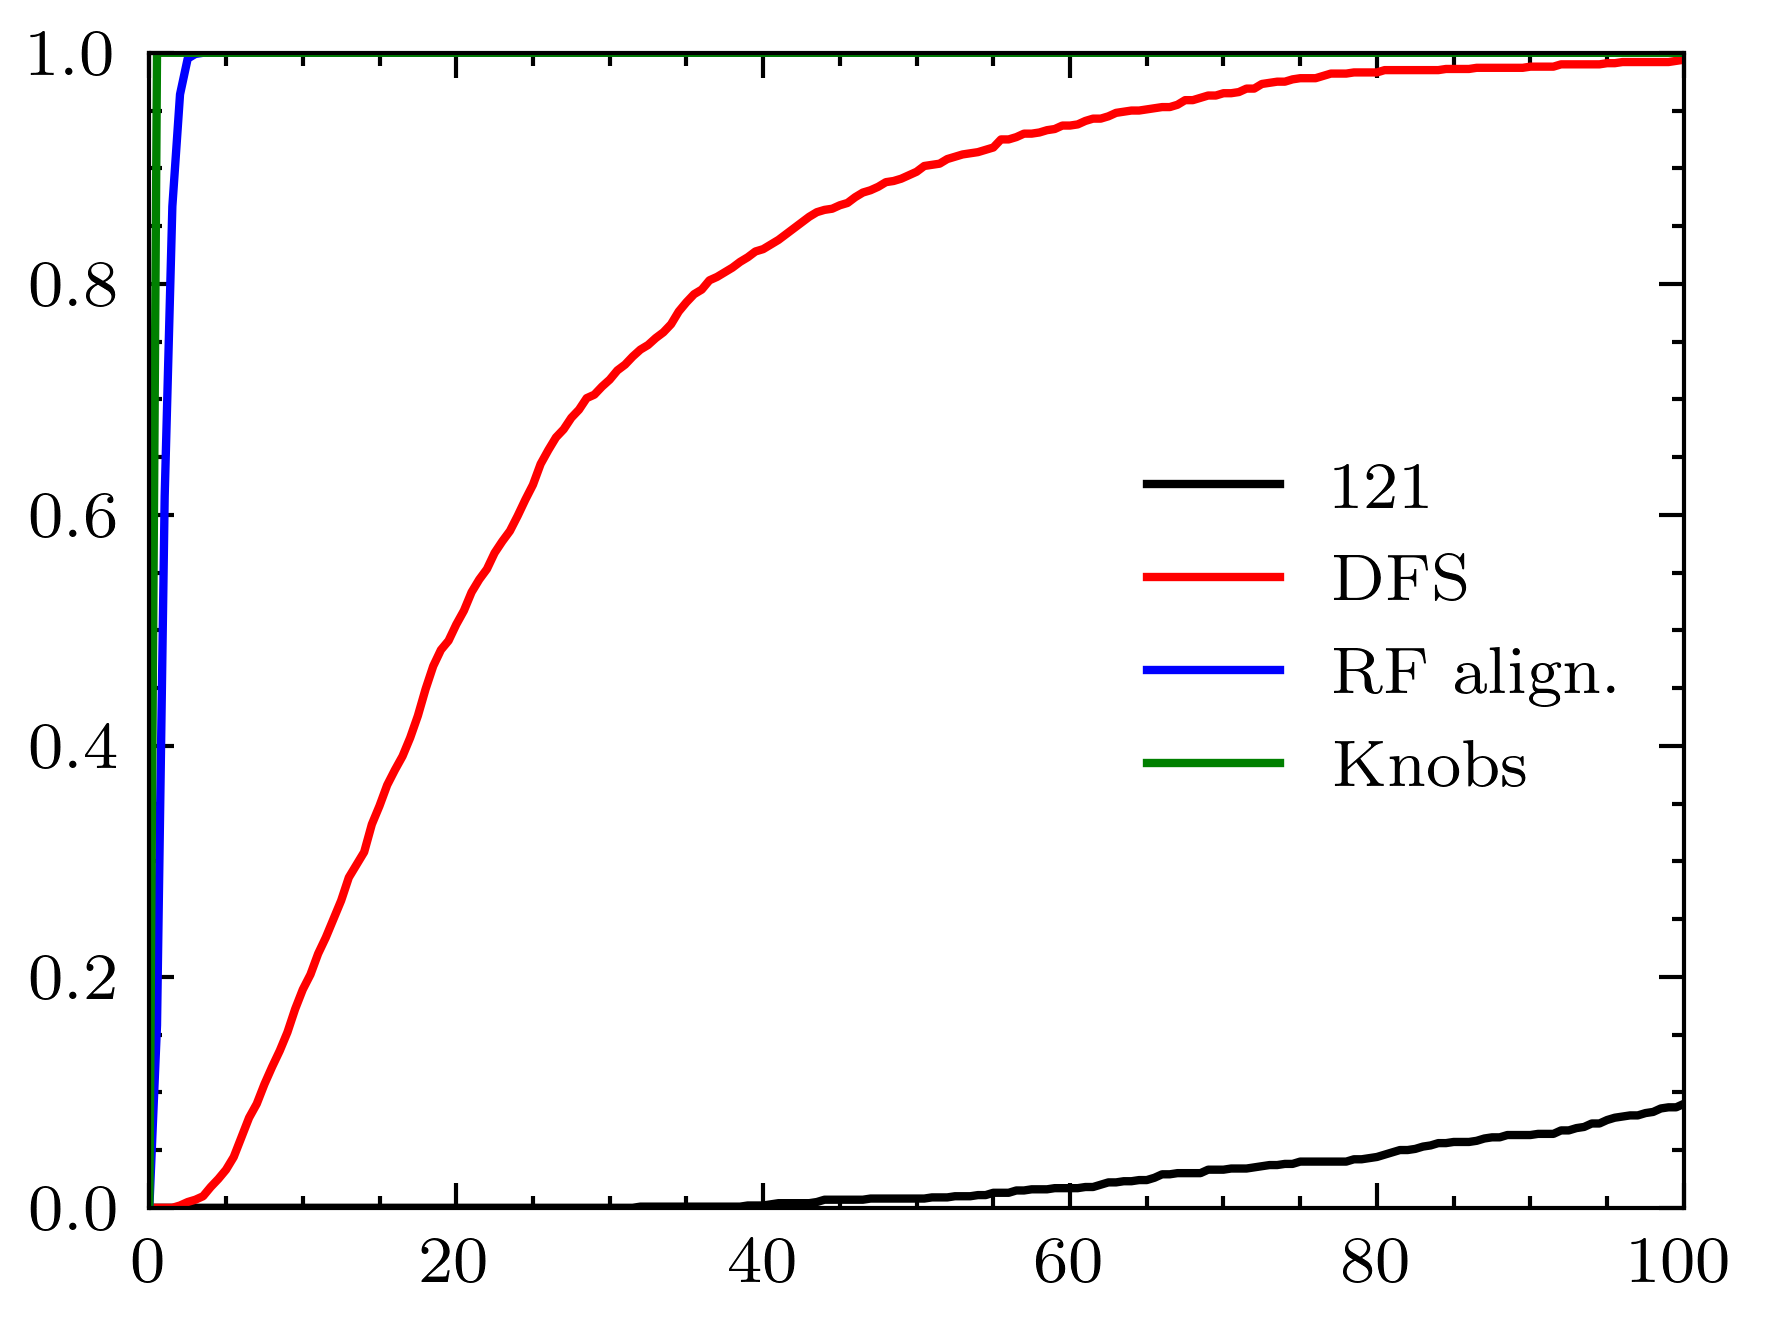

In [100]:
with plt.style.context(['science', 'ieee']):
    plt.plot(res_x, one2one_res_tr, '-', linewidth = 1.0, color = "black", label = "121")
    plt.plot(res_x, dfs_res_tr, '-', linewidth = 1.0, color = "red", label = "DFS")
    plt.plot(res_x, rf_res_tr, '-', linewidth = 1.0, color = "blue", label = "RF align.")
    plt.plot(res_x, knobs_res_tr, '-', linewidth = 1.0, color = "green", label = "Knobs")
    
    plt.xlim(0, 100.0)
    plt.ylim(0, 1.0)
    
    plt.legend()
    plt.show()

In [101]:
res_x, one2one_res_tr = transform(one2one_res, 5.0)
__, dfs_res_tr = transform(dfs_res, 5.0)
__, rf_res_tr = transform(rf_res, 5.0)
__, knobs_res_tr = transform(knobs_res, 5.0)


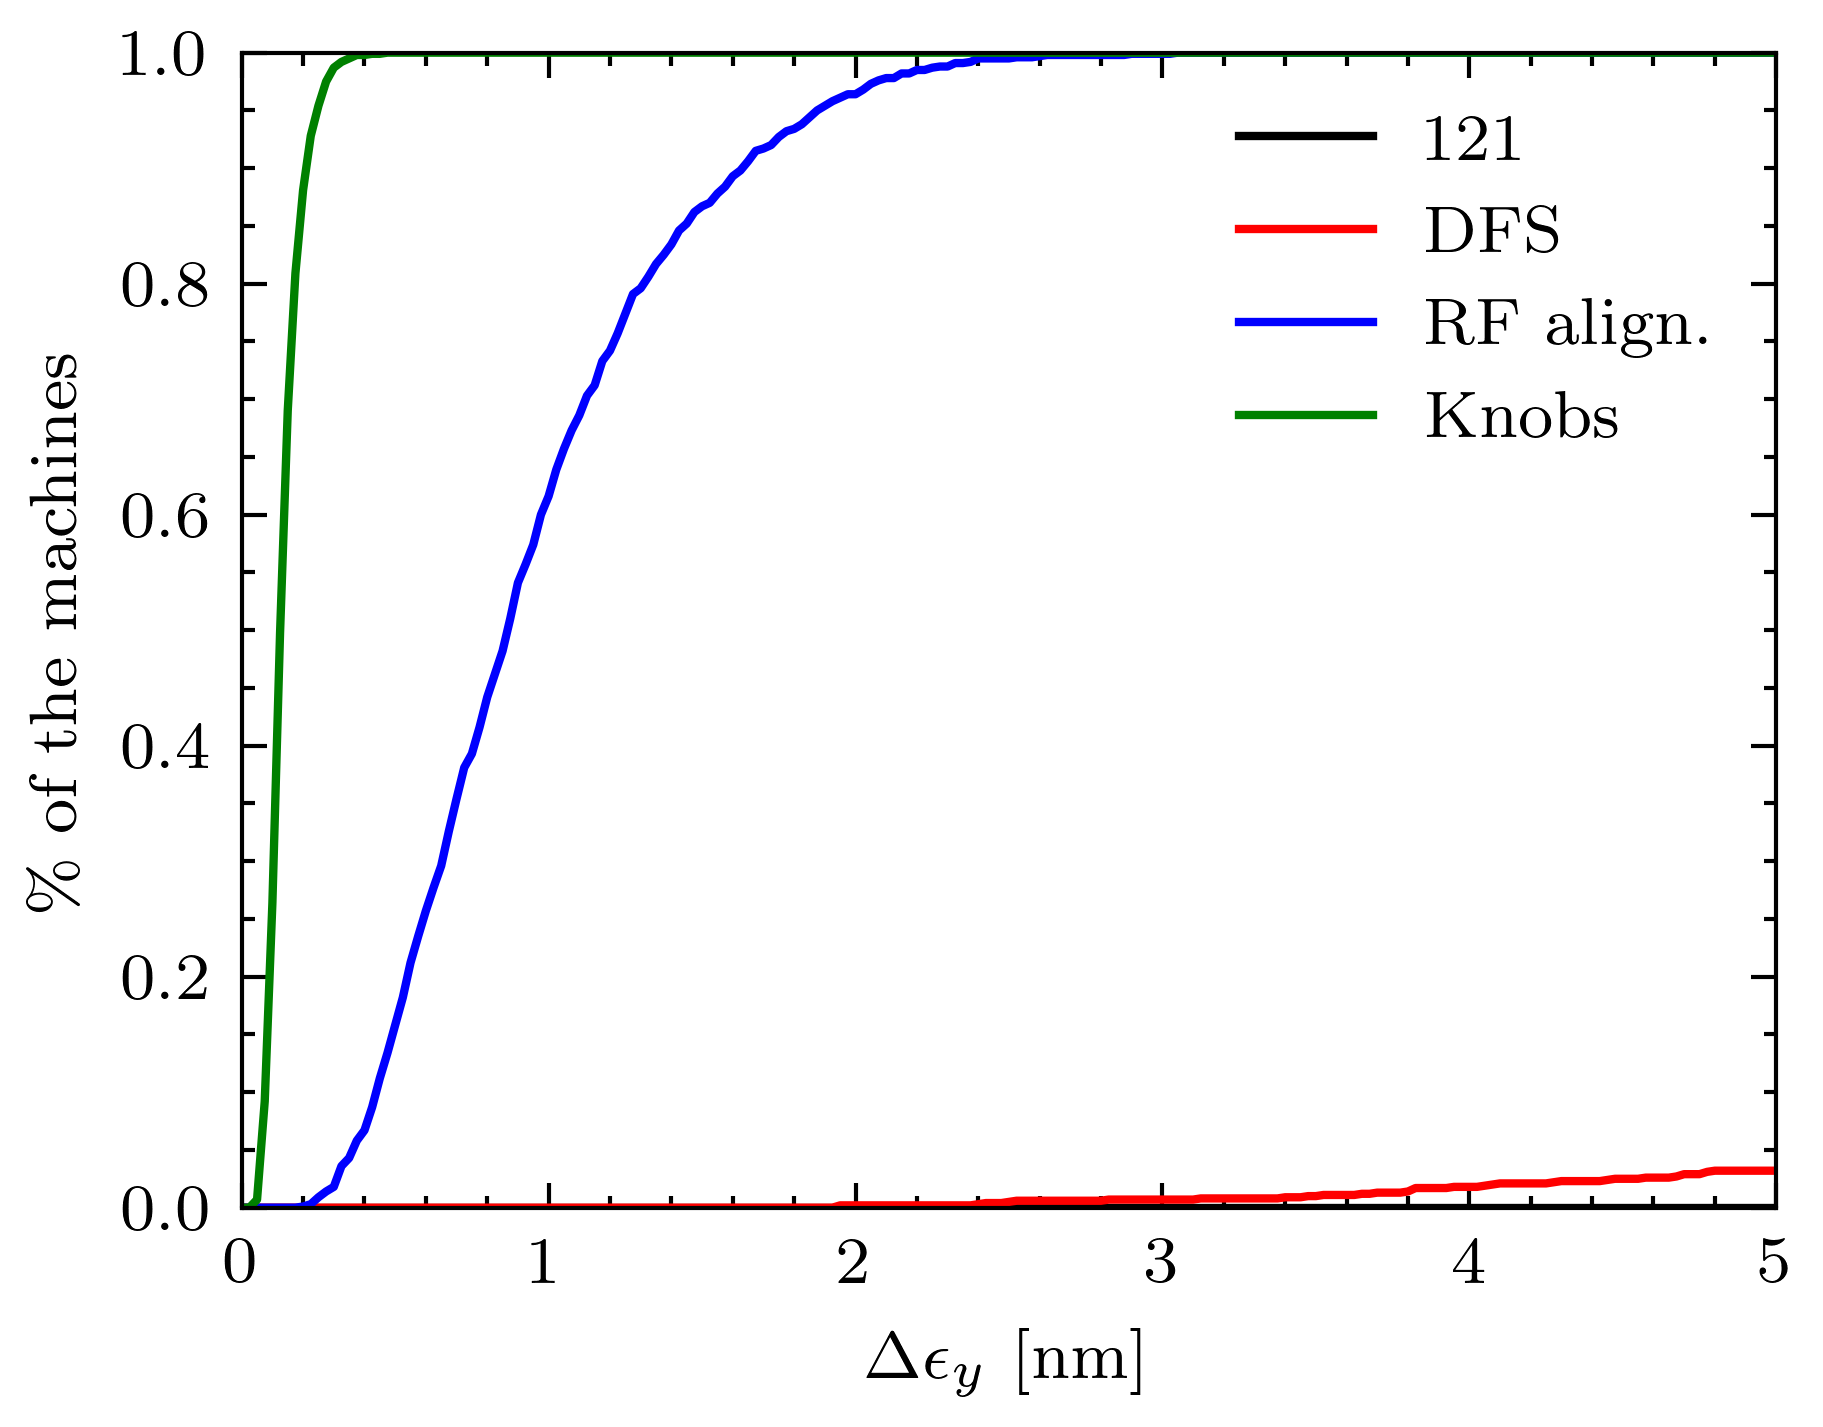

In [102]:
with plt.style.context(['science', 'ieee']):
    plt.plot(res_x, one2one_res_tr, '-', linewidth = 1.0, color = "black", label = "121")
    plt.plot(res_x, dfs_res_tr, '-', linewidth = 1.0, color = "red", label = "DFS")
    plt.plot(res_x, rf_res_tr, '-', linewidth = 1.0, color = "blue", label = "RF align.")
    plt.plot(res_x, knobs_res_tr, '-', linewidth = 1.0, color = "green", label = "Knobs")
    
    plt.xlim(0, 5.0)
    plt.ylim(0, 1.0)
    
    plt.xlabel(r"$\Delta \epsilon_y$ [nm]")
    plt.ylabel("\% of the machines")
    plt.legend()
    plt.show()

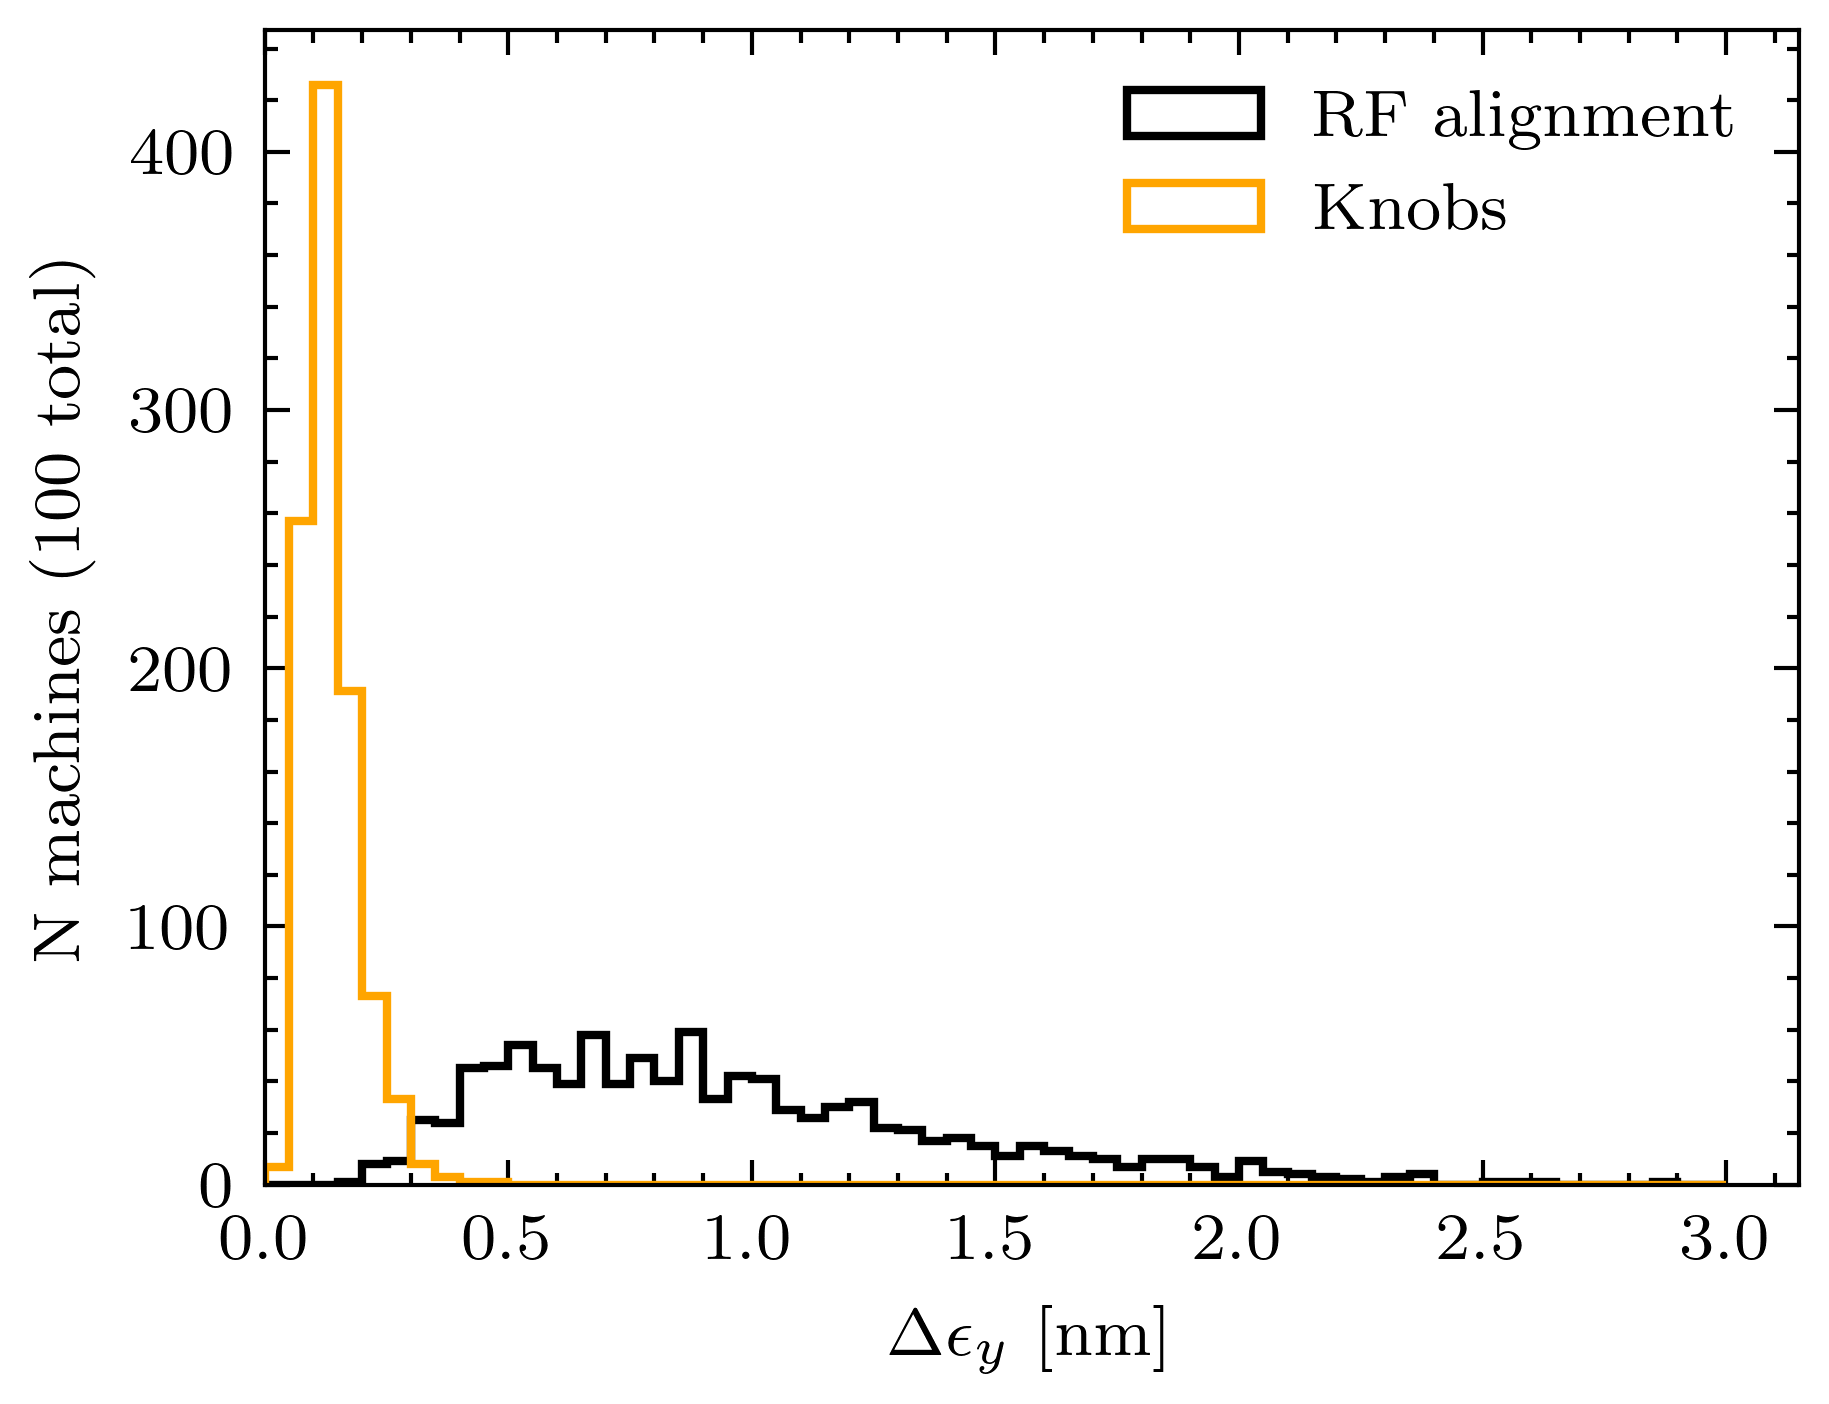

In [103]:
with plt.style.context(['science', 'ieee']):
    plt.hist(rf_res, histtype = 'step', color = "black", linewidth = 1.0, label = "RF alignment", linestyle = "solid", range = (0, 3.0), bins = 60)
    plt.hist(knobs_res, histtype = 'step', color = "orange", linewidth = 1.0, label = "Knobs", linestyle = "solid", range = (0, 3.0), bins = 60)
    
    plt.ylabel("N machines (100 total)")
    plt.xlabel(r"$\Delta \epsilon_y$ [nm]")
    
    plt.xlim(0.0,)
    plt.legend()
    plt.show()

Saving this iteration of the knobs somewhere so they can be easily called and used in the simulations.

### Created a new repository specifically for that purpose. I am going to store the knobs there and update the files if needed.

#### Another thing.
In this notebook, I used `gather_data2()` on the folders to read the whole scan data for a given number of elements. After, I would take the one with the smallest loss as a solution.
I think this is not very convenient, as storing such huge amount of data in the repo is stupid. I am going to extract the data from the folders and then going to store it in the usable and easily accessible format.

In [106]:
knobs_database = {}

for knob in knobs_setup:
    # reading the calculation file
    knob_candidate = gather_data2(knobs_setup[knob], True)

    # sorting the processed data 
    knob_candidate_sorted = knob_candidate.sort_values(by = ['total_loss'])

    weights = knob_candidate_sorted.weights.values[0].ravel()
    features = knob_candidate_sorted.features_ids.values[0]
#    print(knob, weights, features)
    knobs_database[knob] = {
        "quads": features,
        "offsets": weights
    }

In [107]:
print(knobs_database)

{'Y1': {'quads': [2031, 1763, 2060, 1881, 1751, 1892, 2021, 1870, 1671, 1759, 1787, 1715, 1771], 'offsets': array([ -1.4499317,   1.0086112,  -1.7835302,  17.416288 ,  14.735407 ,
        -4.104488 ,  -1.6451167,  -3.3707256,   0.999744 , -24.63238  ,
        10.131407 ,  -1.4434994, -15.551787 ], dtype=float32)}, 'Y2': {'quads': [2062, 2025, 1643, 1639, 1611, 1594, 2002, 2061, 2056, 2044, 2059, 2058, 1553, 1682, 1751, 1813, 1848, 1549, 1651], 'offsets': array([-12.644044 , -12.95743  ,   3.972991 ,   1.1433855,   5.6239467,
         1.6334957,  -1.0004653, -42.10206  ,   1.0103716,   7.0255275,
        44.215057 ,   8.905501 ,  -1.7946887,  -2.7856796,  -5.251406 ,
         9.241636 ,  -2.1251884,  -1.0008932,  -8.53229  ], dtype=float32)}, 'Y3': {'quads': [1495, 1521, 2062, 1491, 1499, 1489, 1514, 1519, 2059, 2021, 2040], 'offsets': array([13.627413 ,  4.406359 , -1.1989676,  1.1548543, 15.497834 ,
        3.5694447,  3.163236 , -1.0031986, -1.0209639,  5.8221865,
       -4.190667 ],

Ok, now as I have these values, I need to transform them into a proper quadrupole ids. I think, I should also mention the lattice that I use in the calculations.

In [112]:
quads_transform = {}

quad_index = 1489
for quad in clic.beamline.extract(['Quadrupole']):
    quads_transform[quad_index] = quad.index
    quad_index += 1

for knob in knobs_database:
    print("before transformation")
    print(knobs_database[knob]["quads"])
    print("after transformation")
    transformed_quads = list(map(lambda quad_id: quads_transform[quad_id], knobs_database[knob]["quads"]))
    print(transformed_quads)
    knobs_database[knob]["quads_transformed"] = transformed_quads
    print()

before transformation
[2031, 1763, 2060, 1881, 1751, 1892, 2021, 1870, 1671, 1759, 1787, 1715, 1771]
after transformation
[12410, 4162, 13425, 7394, 3898, 7680, 12060, 7108, 2378, 4050, 4834, 3214, 4386]

before transformation
[2062, 2025, 1643, 1639, 1611, 1594, 2002, 2061, 2056, 2044, 2059, 2058, 1553, 1682, 1751, 1813, 1848, 1549, 1651]
after transformation
[13495, 12200, 1846, 1770, 1238, 1050, 11395, 13460, 13285, 12865, 13390, 13355, 640, 2587, 3898, 5562, 6536, 600, 1998]

before transformation
[1495, 1521, 2062, 1491, 1499, 1489, 1514, 1519, 2059, 2021, 2040]
after transformation
[60, 320, 13495, 20, 100, 0, 250, 300, 13390, 12060, 12725]

before transformation
[1489, 1511, 1522, 1559, 1585, 1493, 1613, 1533]
after transformation
[0, 220, 330, 700, 960, 40, 1276, 440]

before transformation
[1687, 2062, 1691, 1715, 1839, 1754, 2059, 1847, 1907, 2061, 2058, 1750, 1794, 1738, 2060, 2048, 1527, 1605, 1553, 1906]
after transformation
[2682, 13495, 2758, 3214, 6290, 3955, 13390, 651

In [113]:
print(knobs_database)

{'Y1': {'quads': [2031, 1763, 2060, 1881, 1751, 1892, 2021, 1870, 1671, 1759, 1787, 1715, 1771], 'offsets': array([ -1.4499317,   1.0086112,  -1.7835302,  17.416288 ,  14.735407 ,
        -4.104488 ,  -1.6451167,  -3.3707256,   0.999744 , -24.63238  ,
        10.131407 ,  -1.4434994, -15.551787 ], dtype=float32), 'quads_transformed': [12410, 4162, 13425, 7394, 3898, 7680, 12060, 7108, 2378, 4050, 4834, 3214, 4386]}, 'Y2': {'quads': [2062, 2025, 1643, 1639, 1611, 1594, 2002, 2061, 2056, 2044, 2059, 2058, 1553, 1682, 1751, 1813, 1848, 1549, 1651], 'offsets': array([-12.644044 , -12.95743  ,   3.972991 ,   1.1433855,   5.6239467,
         1.6334957,  -1.0004653, -42.10206  ,   1.0103716,   7.0255275,
        44.215057 ,   8.905501 ,  -1.7946887,  -2.7856796,  -5.251406 ,
         9.241636 ,  -2.1251884,  -1.0008932,  -8.53229  ], dtype=float32), 'quads_transformed': [13495, 12200, 1846, 1770, 1238, 1050, 11395, 13460, 13285, 12865, 13390, 13355, 640, 2587, 3898, 5562, 6536, 600, 1998]}, '

In [117]:
polished_knobs_database = {}
for knob in knobs_database:
    polished_knobs_database[knob] = {}
    polished_knobs_database[knob]['quads'] = knobs_database[knob]['quads_transformed']
    polished_knobs_database[knob]['offsets'] = list(knobs_database[knob]['offsets'])

In [118]:
print(polished_knobs_database)

{'Y1': {'quads': [12410, 4162, 13425, 7394, 3898, 7680, 12060, 7108, 2378, 4050, 4834, 3214, 4386], 'offsets': [-1.4499317, 1.0086112, -1.7835302, 17.416288, 14.735407, -4.104488, -1.6451167, -3.3707256, 0.999744, -24.63238, 10.131407, -1.4434994, -15.551787]}, 'Y2': {'quads': [13495, 12200, 1846, 1770, 1238, 1050, 11395, 13460, 13285, 12865, 13390, 13355, 640, 2587, 3898, 5562, 6536, 600, 1998], 'offsets': [-12.644044, -12.95743, 3.972991, 1.1433855, 5.6239467, 1.6334957, -1.0004653, -42.10206, 1.0103716, 7.0255275, 44.215057, 8.905501, -1.7946887, -2.7856796, -5.251406, 9.241636, -2.1251884, -1.0008932, -8.53229]}, 'Y3': {'quads': [60, 320, 13495, 20, 100, 0, 250, 300, 13390, 12060, 12725], 'offsets': [13.627413, 4.406359, -1.1989676, 1.1548543, 15.497834, 3.5694447, 3.163236, -1.0031986, -1.0209639, 5.8221865, -4.190667]}, 'Y4': {'quads': [0, 220, 330, 700, 960, 40, 1276, 440], 'offsets': [-1.0776453, 5.5204387, -1.0026138, -6.105201, -3.4961488, 2.2045083, -1.2163846, -4.6496086]},

Another thing I did not fully tested, is that the score I have for these knobs is actually correct. So, they are orthogonal to some distinct.

In [119]:
for knob in knobs:
    print(knob)

   name        type  girder           s    x          y   xp   yp
0        Quadrupole    1361  3185.28596  0.0  -1.449932  0.0  0.0
1        Quadrupole     433  1011.61682  0.0   1.008611  0.0  0.0
2        Quadrupole    1477  3456.91794  0.0  -1.783530  0.0  0.0
3        Quadrupole     787  1841.21928  0.0  17.416288  0.0  0.0
4        Quadrupole     405   946.04382  0.0  14.735407  0.0  0.0
5        Quadrupole     820  1918.47558  0.0  -4.104488  0.0  0.0
6        Quadrupole    1321  3091.61976  0.0  -1.645117  0.0  0.0
7        Quadrupole     754  1763.96298  0.0  -3.370726  0.0  0.0
8        Quadrupole     245   571.37902  0.0   0.999744  0.0  0.0
9        Quadrupole     421   983.51030  0.0 -24.632380  0.0  0.0
10       Quadrupole     505  1180.25594  0.0  10.131407  0.0  0.0
11       Quadrupole     333   777.44466  0.0  -1.443499  0.0  0.0
12       Quadrupole     457  1067.82986  0.0 -15.551787  0.0  0.0
   name        type  girder           s    x          y   xp   yp
0        Q

In [120]:
print(clic.beamline)

Beamline(name = 'ml', structure = 
      name        type  girder           s          x        xp          y  \
0           Quadrupole       1     0.21500  -0.694327    0.0000  -2.059810   
1                Drift       1     0.27500   0.000000   -0.0000   0.000000   
2               Cavity       1     0.81833  14.116700  -48.6655  -0.113363   
3                Drift       1     0.85833   0.000000   -0.0000   0.000000   
4               Cavity       1     1.40166 -17.979900  141.3750  -6.941030   
...    ...         ...     ...         ...        ...       ...        ...   
13524           Cavity    1488  3483.28447   5.130050 -105.3120  -5.091240   
13525            Drift    1488  3483.32447   0.000000   -0.0000   0.000000   
13526           Cavity    1488  3483.86780  15.796800   83.7538  18.748700   
13527            Drift    1488  3483.88780  -0.000000    0.0000   0.000000   
13528              Bpm    1489  3483.96780   7.347020    0.0000   7.840220   

             yp  
0       -0

In [121]:
# before doing the knob creation, we need to create the beamline.

# creating a Machine object and the beamline

clic = pl.Machine(console_output = False)

#+++++++++++Beamline creation+++++++++++
cavity_structure = {
    'a': 3.33e-3,
    'g': 6.4e-3,
    'l': 8.33333e-3,
    'delta': 0.18,
    'delta_g': 0.5e-3,
    'phase': 8.0, 
    'frac_lambda': 0.25, 
    'scale': 1.0
}
clic.create_beamline("Lattices/1000_db_ml.tcl", name = "ml", cavities_setup = cavity_structure)

#+++++++++++Beam creation+++++++++++

# the following parameters are neccesery to provide to the routine.

beam_parameters =  {
    'emitt_x': 8.0,
    'emitt_y': 0.1,
    'e_spread': 1.6,
    'e_initial': 9.0,
    'sigma_z': 70, 
    'phase': 0.0,
    'charge': 5.2e9,
    'beta_x': 8.054208256047598,
    'beta_y': 1.201443036029169,
    'alpha_x': 2.455451375064132e-02,
    'alpha_y': 6.250882009649877e-03,
    'n_total': 500
}

# creating a sliced beam
main_beam = clic.make_beam_slice_energy_gradient("main_beam", 11, 5, 1.0, 1.0, **beam_parameters)


********************************************************************************
**                                                                            **
**                       PLACET Version No 1.0.5 (SWIG)                       **
**                           written by D. Schulte                            **
**                             contributions from                             **
**                            A. Latina, N. Leros,                            **
**                           P. Eliasson, E. Adli,                            **
**                          B. Dalena, J. Snuverink,                          **
**                           Y. Levinsen, J. Esberg                           **
**                                                                            **
**                             THIS VERSION INFO:                             **
**                         Octave interface enabled                           **
**                         P

In [122]:
print(clic.beamline)

Beamline(name = 'ml', structure = 
      name        type  girder           s    x   xp    y   yp
0           Quadrupole       1     0.21500  0.0  0.0  0.0  0.0
1                Drift       1     0.27500  0.0  0.0  0.0  0.0
2               Cavity       1     0.81833  0.0  0.0  0.0  0.0
3                Drift       1     0.85833  0.0  0.0  0.0  0.0
4               Cavity       1     1.40166  0.0  0.0  0.0  0.0
...    ...         ...     ...         ...  ...  ...  ...  ...
13524           Cavity    1488  3483.28447  0.0  0.0  0.0  0.0
13525            Drift    1488  3483.32447  0.0  0.0  0.0  0.0
13526           Cavity    1488  3483.86780  0.0  0.0  0.0  0.0
13527            Drift    1488  3483.88780  0.0  0.0  0.0  0.0
13528              Bpm    1489  3483.96780  0.0  0.0  0.0  0.0

[13529 rows x 8 columns])


In [123]:
# To confirm the knob works, we need to check the principal components when the knob is applied.
# Reading the nececsery transformations

norm_coordinates = pk.load(open("data/knobs/S11_M5_opt_knobs_after_rf/norm_coordinates_v3.pkl", 'rb'))
pca = pk.load(open("data/knobs/S11_M5_opt_knobs_after_rf/pca_v3.pkl", 'rb'))

def get_principals(data_list):
    '''
    Get the principal components
    
    data_list: np.array
        Containts n ys and n pys
    
    The correct data can be aquired as following:
        >>> ys, pys = ml.eval_obs(main_beam, ['y', 'py'])
        >>> data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
    
    '''
    for func in [norm_coordinates.transform, pca.transform]:
        try:
            data_list = func(data_list)
        except ValueError:
            #pca expect the data as a row not a vector
            data_list = func(data_list.T).T
    return data_list.T


In [125]:
# evaluating the initial principal components

ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals_init = get_principals(data_list)

print(principals_init)

[[ 9.45158293e-12  9.66065933e-11 -6.48891205e-12 -4.17065677e-11
  -7.54685060e-11  6.99233682e-11 -2.95468226e-11  2.64361150e-11
   4.40870765e-11  2.11199412e-11  1.27214610e-11  1.60409621e-12
   2.56319773e-11 -4.39193805e-12  7.00655795e-12 -9.53793353e-12
   3.60960980e-12  6.78959000e-12  6.90252767e-12  2.48842143e-12
  -3.02684899e-12 -6.82852586e-12 -2.07363066e-12 -5.29604537e-12
  -5.07320256e-12  2.03662093e-12 -2.47685729e-12 -1.61171043e-12
   8.75102476e-13  2.00864363e-12  1.67758167e-12 -5.68770644e-13
  -1.60561539e-12 -2.40967594e-14  1.24968068e-13  4.88532388e-13
   4.63201814e-13  3.66427157e-13 -2.44955938e-13 -1.61602115e-13
  -5.50861348e-14 -1.72891872e-13  1.66285462e-13 -2.23272741e-13
  -7.92509031e-14  1.41890086e-13 -6.49583287e-14 -1.19590707e-13
  -1.09082915e-13  9.28828236e-14  7.23692085e-14  1.17498453e-13
  -7.44096599e-15  2.65975846e-14  1.81714770e-14  2.09797030e-14
   3.39384902e-15  1.53031598e-14 -3.85894175e-14 -8.43532113e-15
   2.79051

In [130]:
principals_changes = [None] * 10
knobs = construct_knobs()

[[ 9.73034128e-09  1.64740858e-11 -9.06518809e-10  3.05957600e-10
  -2.61925383e-10  1.91433459e-10 -1.73738046e-11 -1.08704706e-10
  -2.95026348e-10 -7.33669590e-10  2.98973723e-10  6.88409276e-11
   3.45867254e-11  4.27956886e-10 -2.72324862e-10 -2.38635600e-10
  -1.97311493e-10 -2.04684733e-10 -2.30562403e-10  1.98710248e-10
   2.92279466e-10  1.26225586e-10  9.81236373e-11  1.87224075e-10
   2.17092424e-10  1.42498348e-10 -2.00705338e-11 -5.03709378e-11
  -2.55772081e-11 -1.32787363e-10  4.04776903e-11  4.45035057e-11
   4.84525579e-11 -1.63021953e-10  3.14584135e-11  3.35280779e-11
  -2.57985093e-11 -9.35834773e-11 -1.05806241e-11  1.11487689e-12
  -1.14703184e-11 -3.06899982e-12 -5.03115493e-12  7.13030787e-12
  -1.05023983e-11 -9.01791847e-12 -5.69900008e-12  2.34225172e-11
   2.34144233e-11 -3.32605345e-12  1.34257514e-12 -6.89523478e-12
   4.60291080e-12  5.03835465e-12 -3.50120655e-12  2.52099430e-12
  -4.34654020e-12 -5.17022338e-12  8.82270416e-13  1.83344713e-12
   8.64465

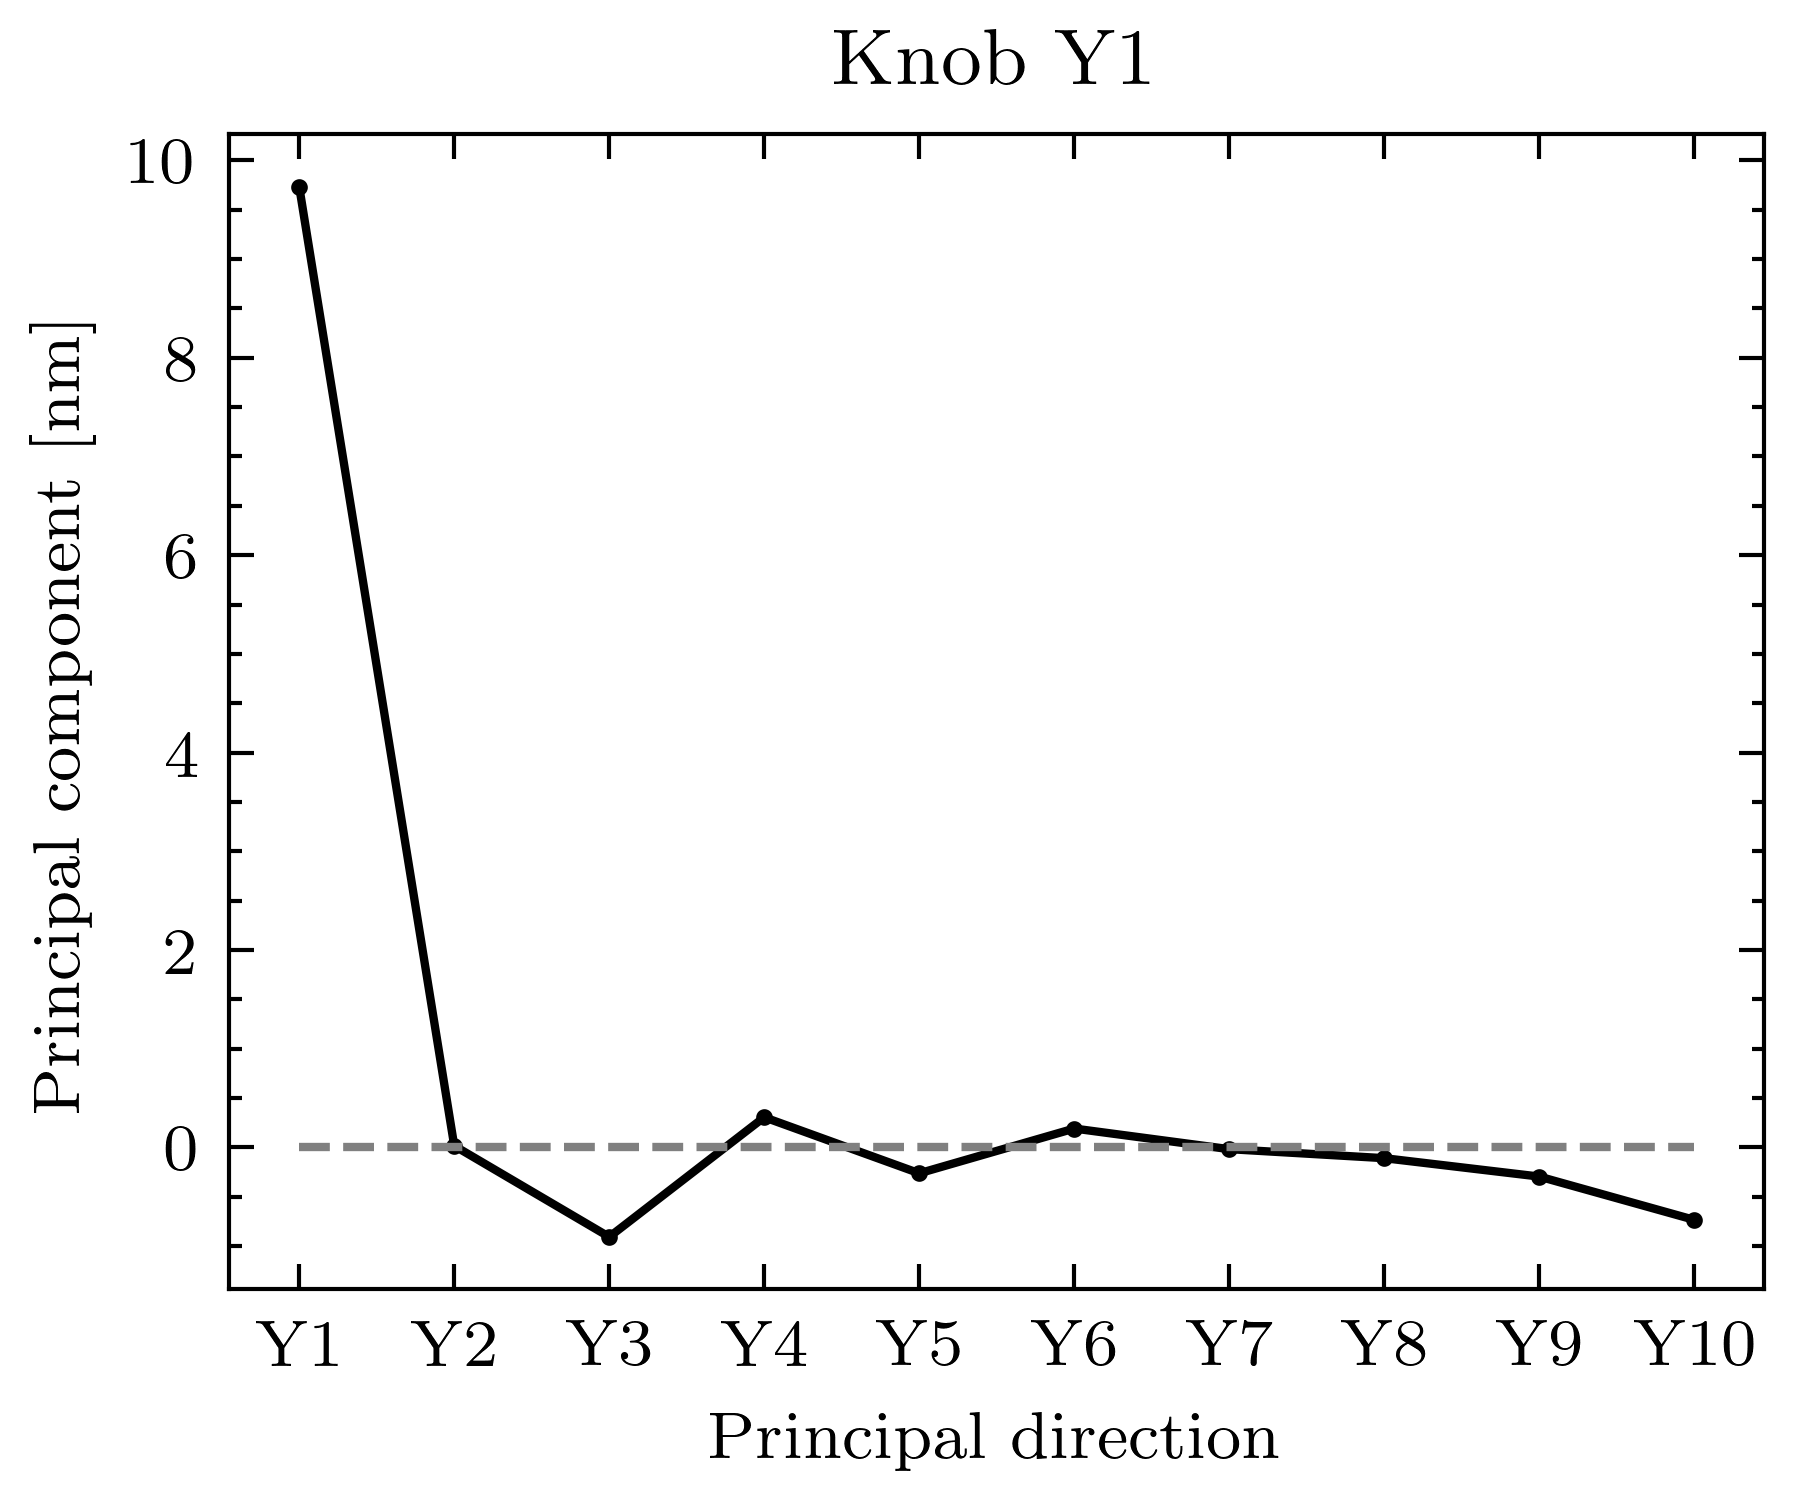

In [142]:
# So applying the Knob and checking the principal components

knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 2.82113886e-11  9.98183218e-09  3.61345904e-11  1.55926453e-10
   5.53201819e-12  3.40345561e-11 -1.91569394e-10 -9.95266561e-11
   6.82164801e-11 -8.21047443e-11  2.01676879e-10  2.24135610e-11
  -5.60150613e-11  4.02506454e-10  6.67931411e-11  9.91183706e-11
  -1.96410809e-11  1.21747952e-10  6.42021379e-12  2.78025925e-10
  -3.20328330e-10 -2.04707108e-10 -1.39499837e-10 -1.77908460e-11
  -4.92989010e-11 -1.41285326e-10  2.63000657e-10  9.09375158e-12
   9.42547658e-11  8.54207517e-11 -1.52054770e-10  2.70343055e-11
  -2.81097816e-11 -5.11697040e-11 -5.65502722e-11 -6.00767647e-11
   2.46966990e-11 -1.88763619e-11  2.01405845e-11 -2.83021963e-11
  -1.20050965e-11 -9.56080575e-12 -3.35209728e-12  6.44970007e-13
   6.92371246e-12  3.58647346e-12  9.01025756e-12  1.25265632e-11
  -1.79085785e-12 -1.21711929e-11  3.62974523e-13 -6.78247336e-12
   4.54275385e-13  6.93996873e-12 -1.74964125e-12  2.02392392e-12
   4.58361492e-13 -1.35578894e-12  5.12847042e-12  1.88047009e-12
  -6.21814

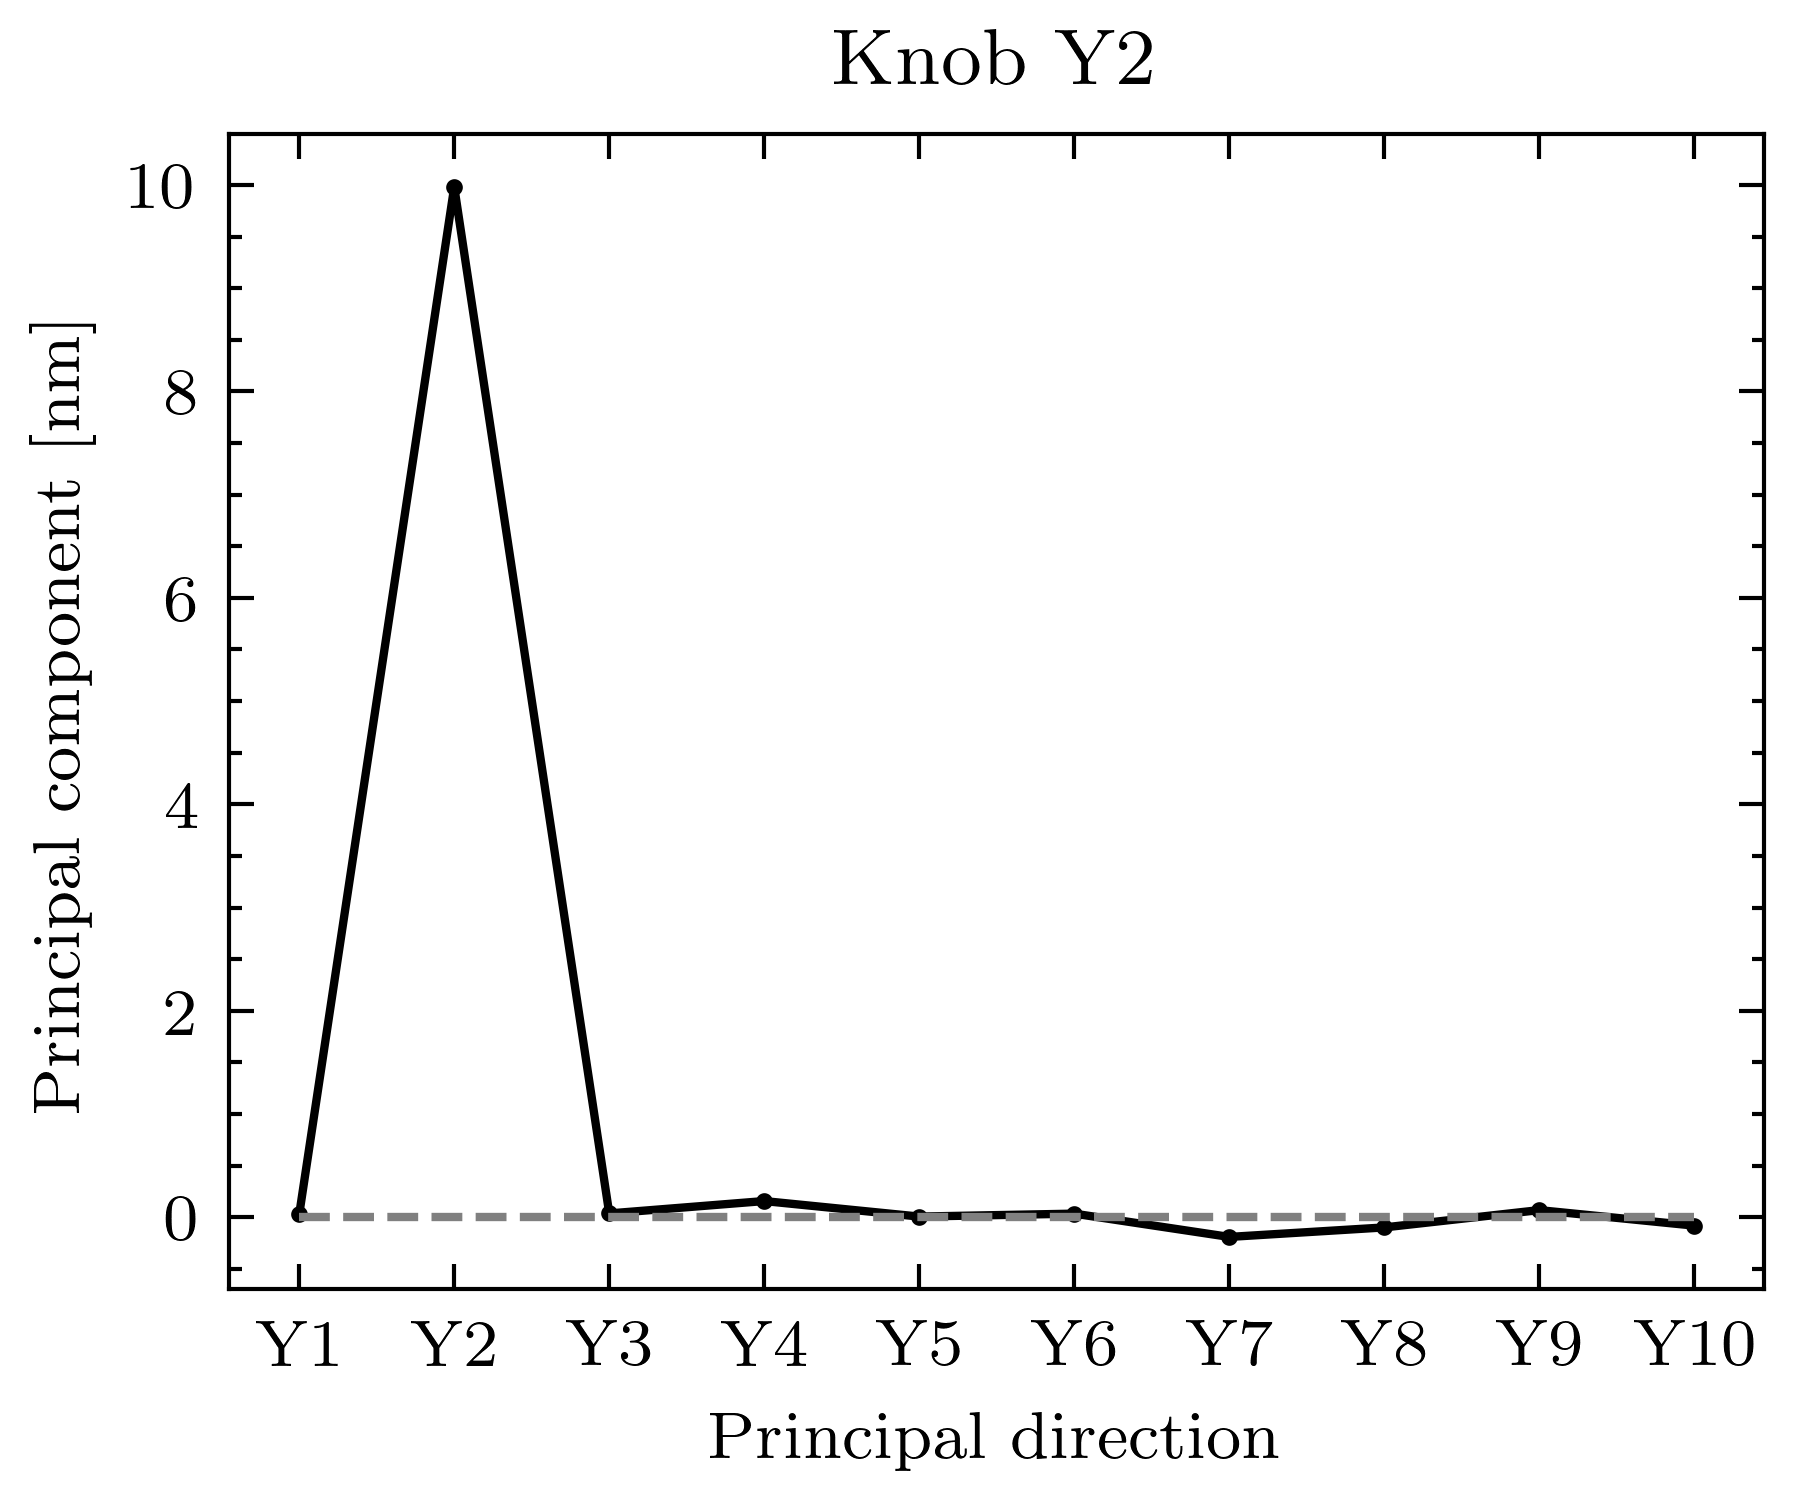

In [143]:
# So applying the Knob and checking the principal components

knob_id = 2

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 2.67052407e-10 -2.54582064e-10  9.67105302e-09 -7.85853448e-11
   6.22709763e-10  1.28515057e-10  2.37399780e-10 -7.55155671e-10
  -1.84544400e-10 -1.44720256e-10 -5.64626846e-11  9.66022786e-13
   1.94988081e-10  1.75063389e-10  1.68617001e-10  4.34165685e-10
  -9.08862807e-11  1.86651140e-10 -4.61110217e-10  2.71682098e-10
  -2.06523985e-10  5.10317935e-10 -4.70875674e-10 -2.86397733e-10
   1.49829285e-10  3.93352117e-10 -5.04748641e-10 -3.82229173e-11
  -3.24538691e-10  2.27679447e-10 -2.49348362e-10 -2.17143491e-10
   1.91723358e-10  1.83698616e-10  3.23557037e-12 -4.23967080e-11
  -2.69010867e-11  6.69251707e-11  8.82994704e-12 -6.90908269e-12
  -6.04156959e-11  2.66671416e-11 -1.23387545e-11 -4.47976764e-12
   6.07661236e-12 -2.91515095e-14 -2.46471873e-11 -4.79451232e-12
  -9.51722048e-12  2.08785613e-11  1.04332125e-11 -5.42824225e-12
  -1.02479986e-11  3.94623832e-12 -3.97033110e-12  1.91261792e-12
   1.15238202e-13 -2.15445596e-12  1.25963875e-12 -4.22047184e-12
   1.38999

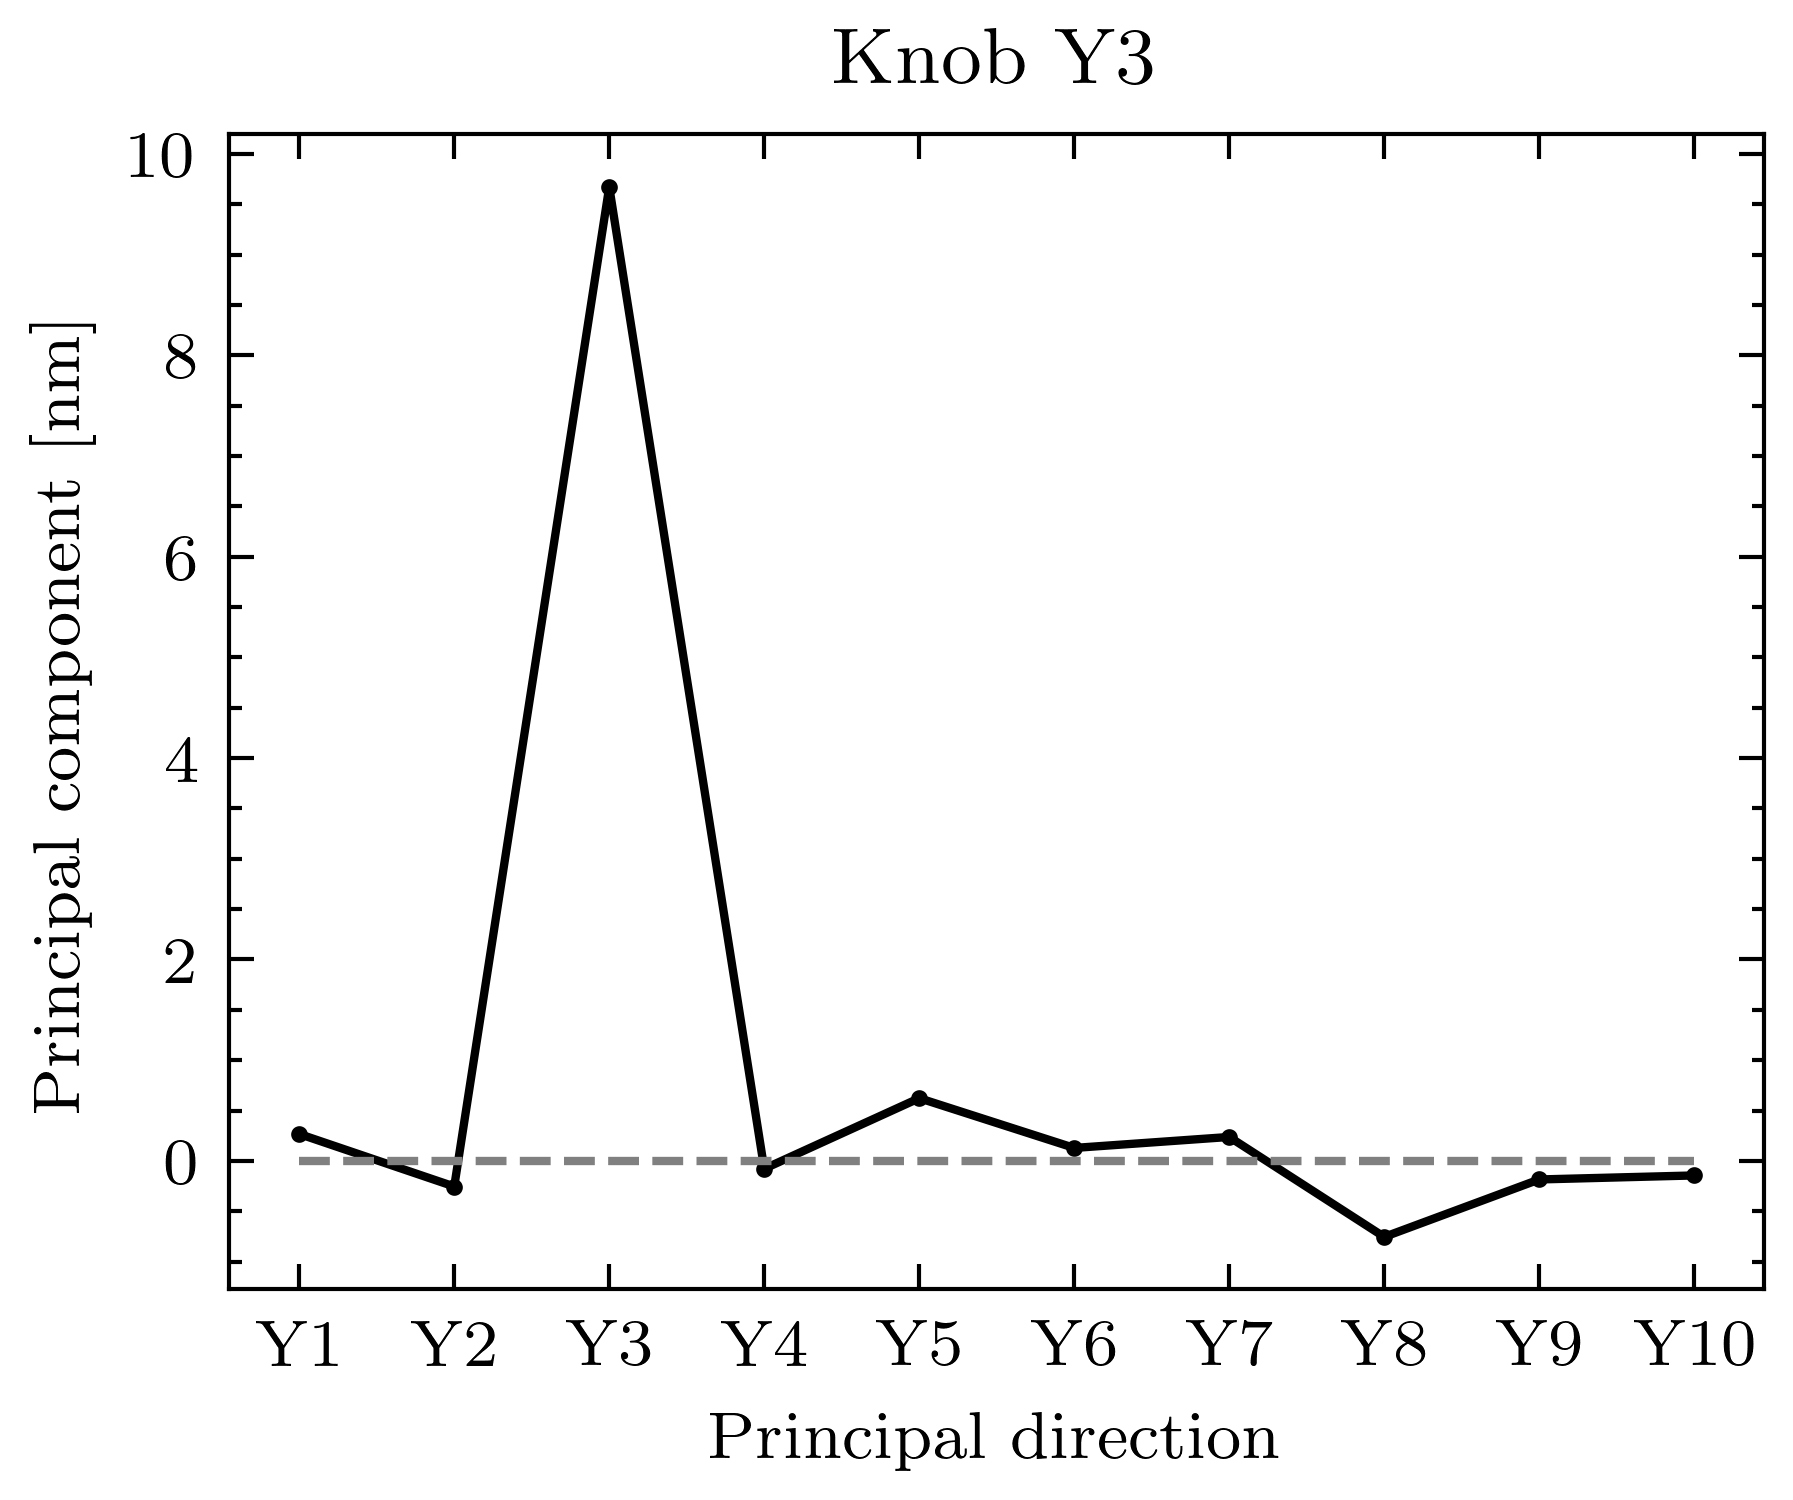

In [144]:
# So applying the Knob and checking the principal components

knob_id = 3

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-8.47235080e-10 -1.64855933e-10 -6.99273776e-11  9.55878951e-09
   4.86730442e-10 -4.31165120e-10 -5.19350153e-11 -1.33040335e-10
  -7.41170522e-10 -5.70424178e-11 -9.29695459e-10 -4.43219363e-11
   4.33619484e-11 -2.14371882e-10  4.46993212e-10  1.08225748e-10
   4.99865933e-10  1.94370284e-10  2.20514901e-10 -1.33092091e-10
   2.31926096e-11  2.12561218e-10  4.63479638e-10 -3.66190103e-10
   2.73344158e-10 -3.54472454e-11  1.28341568e-10  4.93077799e-10
  -9.54229984e-12  3.37131174e-10  2.17581691e-10 -4.64900312e-10
   8.95351791e-11 -2.18916229e-10  1.36981355e-12  6.05235483e-12
  -6.88492379e-11 -2.20909152e-11  1.98462704e-11 -9.85895111e-12
  -5.87839624e-12  2.57914891e-11  4.99843001e-13 -1.68553164e-12
  -4.50892865e-12 -1.20781977e-11 -4.09546970e-12 -1.65420869e-11
  -1.35247833e-11  5.94158047e-12 -2.33169408e-13 -1.24632123e-12
  -2.06348405e-14 -2.94995152e-12  3.69718357e-13  1.80060385e-12
  -1.51340812e-12  8.71825148e-13 -2.40131233e-12  3.03126935e-13
  -4.00541

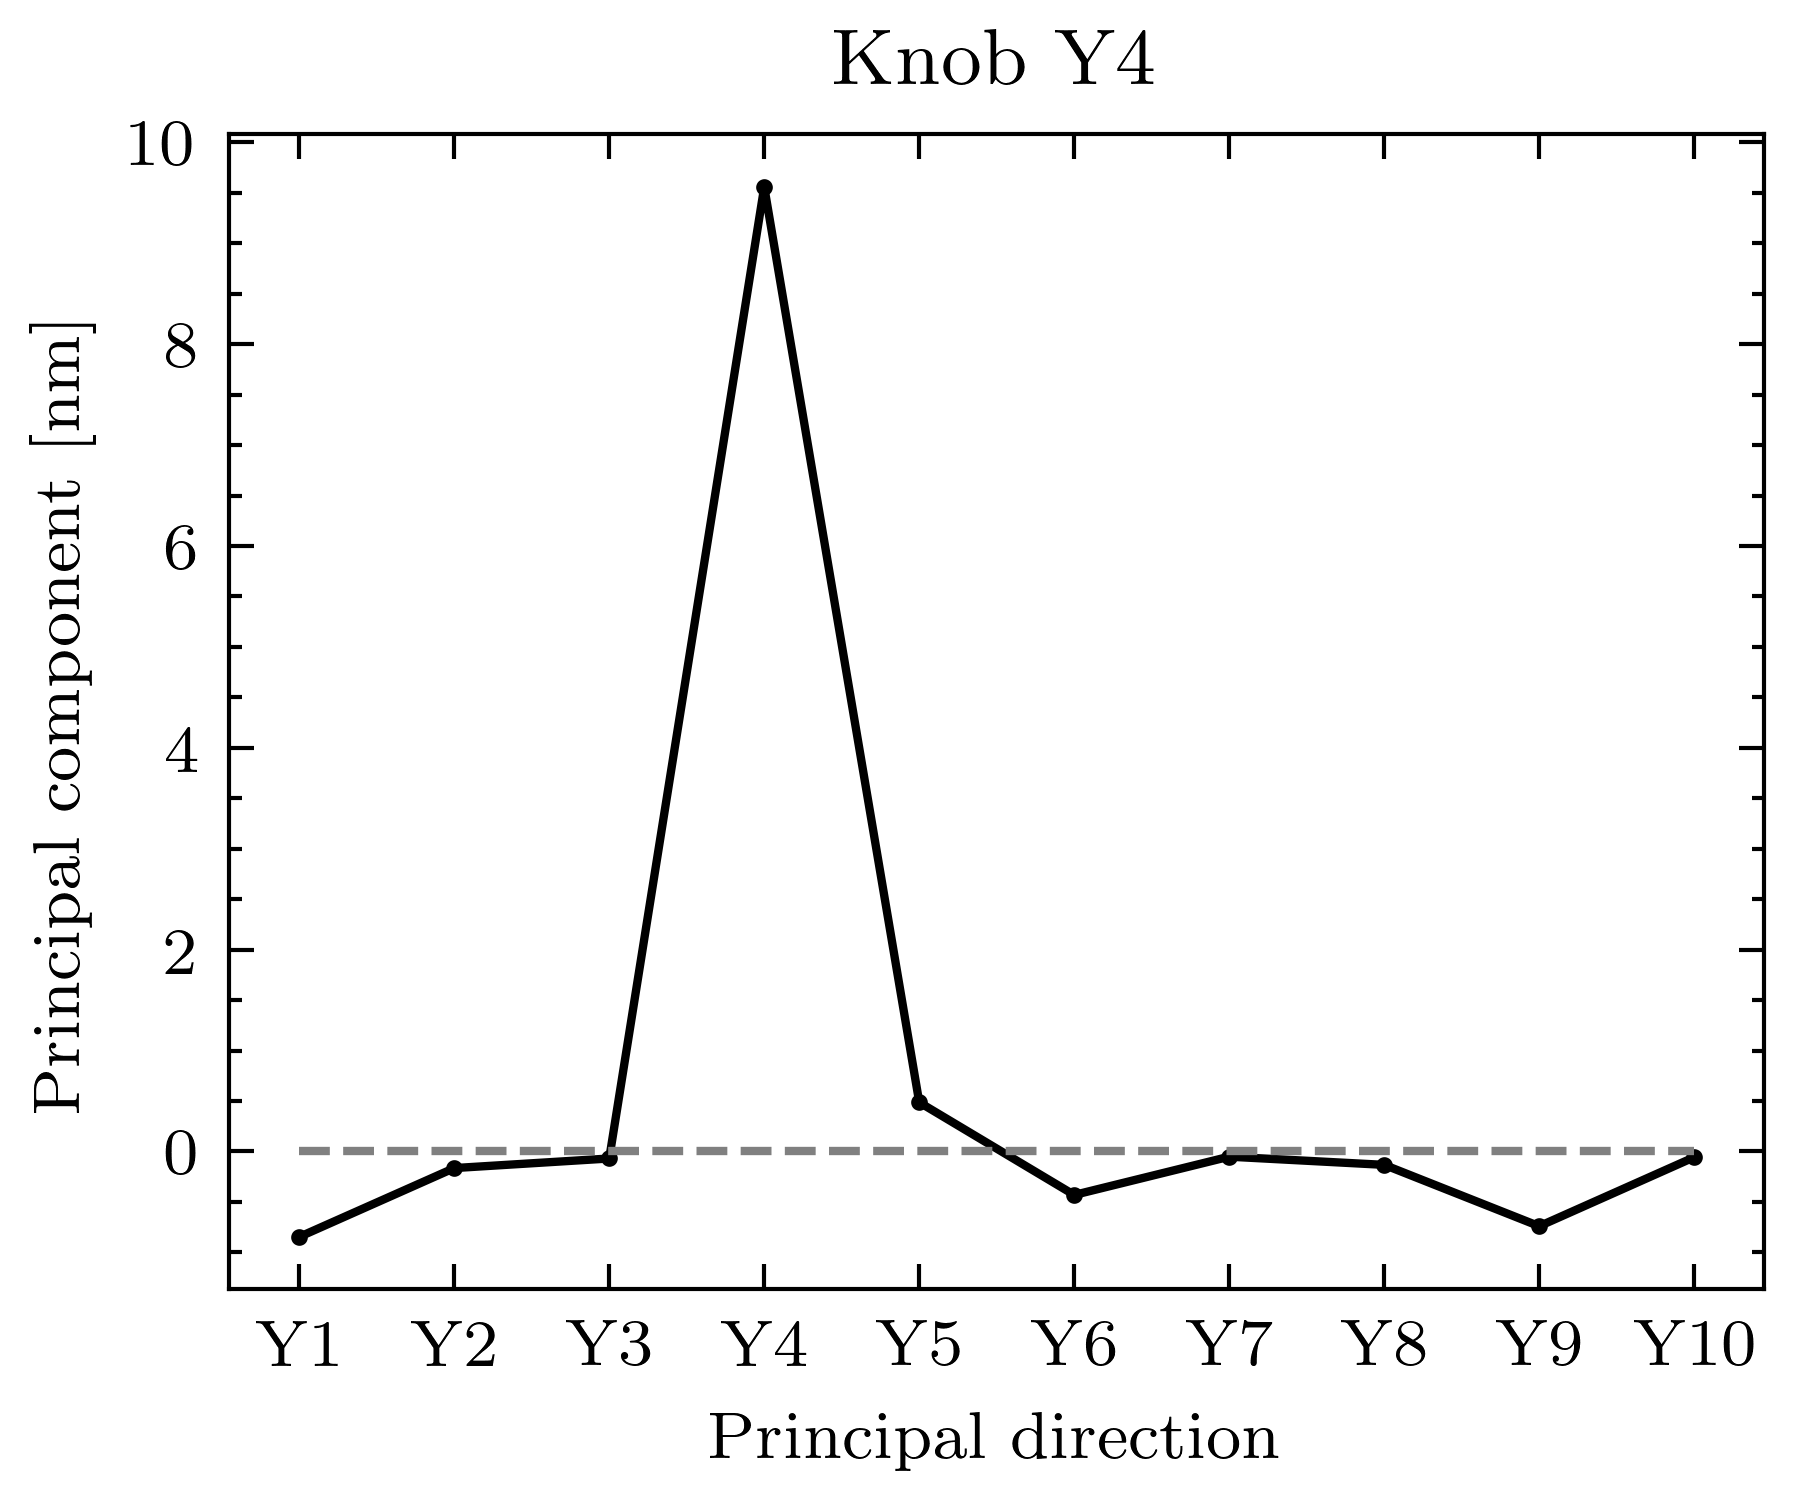

In [145]:
# So applying the Knob and checking the principal components

knob_id = 4

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-1.07139765e-10  6.12996742e-11 -1.04811959e-09  5.51152575e-11
   9.82129488e-09 -3.15893900e-11  2.58709660e-10  7.19565967e-11
   1.94567508e-10  7.37698437e-11  2.22017393e-10  2.19750177e-10
   2.69558362e-10 -3.10748578e-11  5.52457131e-10  3.59268493e-10
   4.83036399e-10  2.26294119e-11  6.39933845e-11 -2.71112198e-10
   2.41223468e-10  3.94176890e-10  2.97000729e-10 -1.36137483e-10
  -2.35938511e-10  1.19523983e-10 -1.13192462e-10  1.76489631e-10
   1.52294134e-11 -6.64547742e-12  4.63410426e-11  1.64575016e-10
   1.88297203e-10 -2.02597341e-11  4.12388368e-11  6.38593497e-11
   5.47723869e-11 -5.18086688e-11 -3.64768919e-11  1.55644852e-11
   1.39209402e-12  1.63202134e-11 -2.16437991e-12  3.77932816e-13
  -1.82530989e-11 -8.09571275e-12 -1.63463850e-11  6.65749323e-12
   2.24709372e-11  1.89627412e-11 -1.10228158e-13  1.40236370e-11
  -1.88946576e-12 -3.97315507e-12 -1.24792866e-11 -8.20081190e-12
   4.47366560e-12  2.94962051e-12 -6.34402614e-12  1.93788519e-12
   2.62959

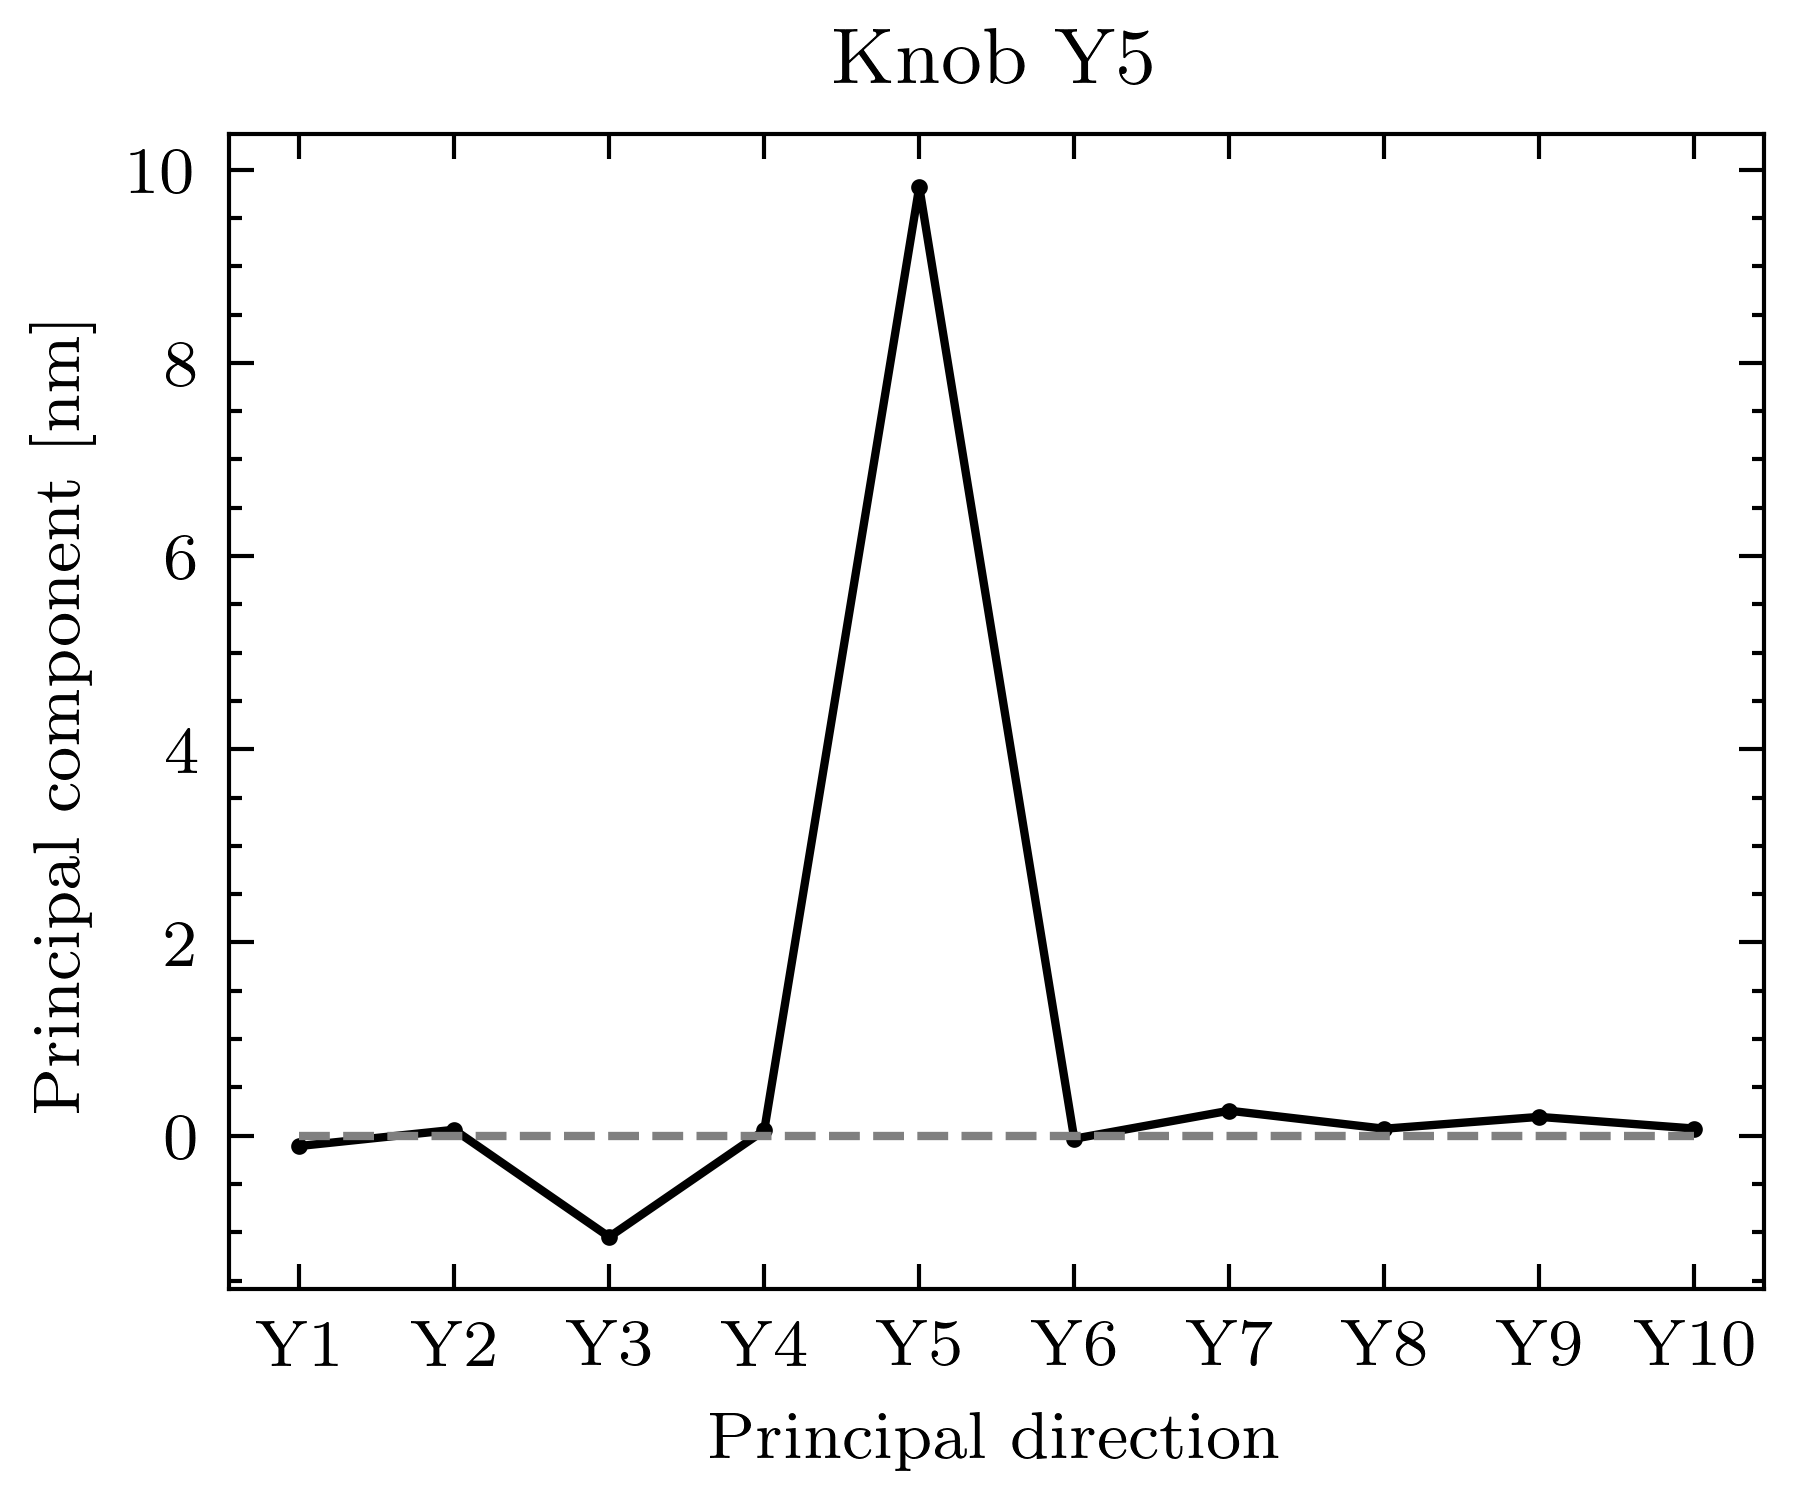

In [146]:
# So applying the Knob and checking the principal components

knob_id = 5

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-2.69756658e-10  6.33145106e-12  2.05365873e-10  3.29429537e-10
   1.00208302e-10  9.69865345e-09  1.21829255e-11 -1.53260651e-10
  -3.65631056e-10  7.71788816e-11 -1.93768911e-10 -1.90425784e-10
   1.95576877e-10  2.76634186e-10  9.45978434e-11  1.67563956e-10
  -3.29398670e-10  1.88875690e-10  1.53457692e-10 -1.16429124e-11
  -5.18785639e-11  1.63332070e-10 -1.82611289e-10  5.40721695e-10
   3.54543104e-10 -2.50151019e-10 -4.85285021e-11 -1.86822858e-10
   6.41648464e-13 -1.52011205e-10  3.87767364e-11 -1.61138909e-10
  -5.23149689e-11 -1.15527533e-11 -6.30645654e-11  1.14975519e-10
   6.25565401e-12 -6.46551037e-11  3.28022345e-11 -1.49840257e-12
   4.20618601e-11  9.04531662e-12 -1.76059367e-12 -1.50314069e-12
  -8.76088367e-12 -1.20580148e-11 -4.44655147e-12  9.47079344e-12
   1.84939143e-11 -2.02625375e-11  6.64454849e-12  1.32282664e-11
   1.38365159e-12 -6.16079013e-12 -4.45549383e-12 -6.92510555e-13
  -1.91956516e-13  3.49631407e-12 -6.59378078e-12 -4.63300921e-12
   8.99825

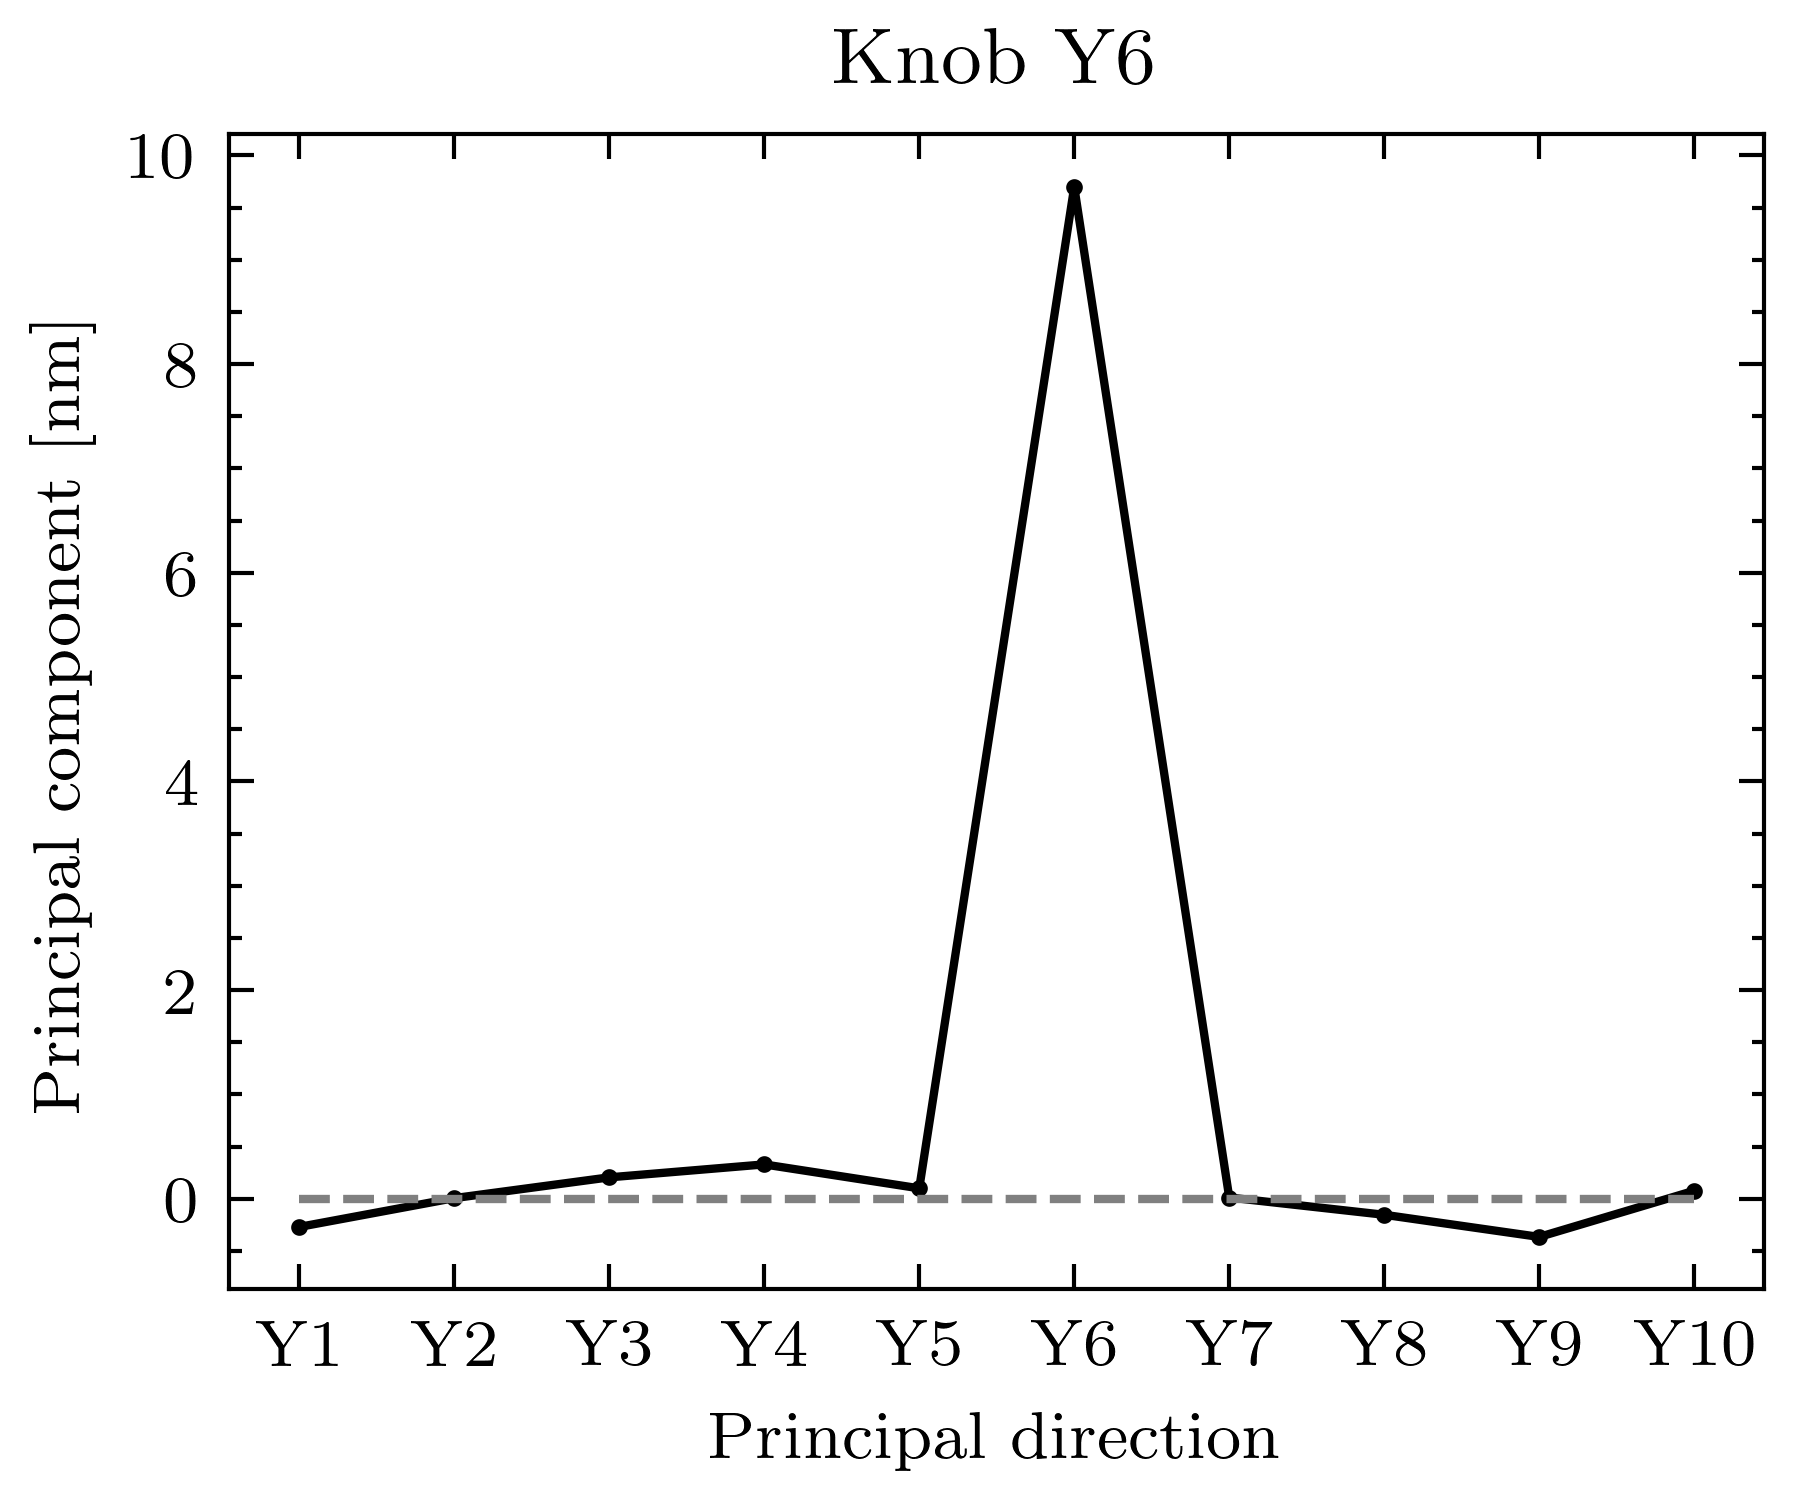

In [147]:
# So applying the Knob and checking the principal components

knob_id = 6

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 1.62075008e-10 -1.76151165e-10  9.68218734e-10  3.54877730e-12
  -2.35715883e-10  7.66301681e-11  9.09627150e-09 -4.65041852e-10
   3.63249650e-10 -2.47789749e-11  8.69999679e-10 -5.58193034e-10
  -7.85434493e-10  8.58475653e-11 -4.95047993e-10 -4.85065538e-10
  -4.09800480e-10  8.82834431e-10  4.35508774e-11  2.63179917e-10
  -2.50290609e-10  2.35758256e-10 -6.91611295e-10 -7.26402927e-10
   3.13407536e-10  8.38218568e-11 -1.14437375e-10 -1.59514656e-10
  -3.28599343e-10 -6.28281770e-11  1.26422443e-10  1.28809827e-10
  -4.68826081e-10  1.25394410e-10 -1.63910731e-11 -1.75988221e-10
  -2.85563362e-10  1.19942325e-10  5.01850557e-11  5.09921027e-11
  -1.01433754e-10  5.36901391e-11 -1.30307952e-11 -1.12411692e-11
   1.30798672e-11  1.66492885e-11 -3.35630345e-11  2.00122135e-12
  -1.20095279e-11  4.53877894e-11  1.60637861e-11 -2.30001563e-11
  -1.60822822e-11  1.41449283e-11  8.08600197e-12  7.79209198e-12
   5.63568305e-12 -5.29201425e-12  1.46005883e-11 -4.46821826e-12
  -8.89273

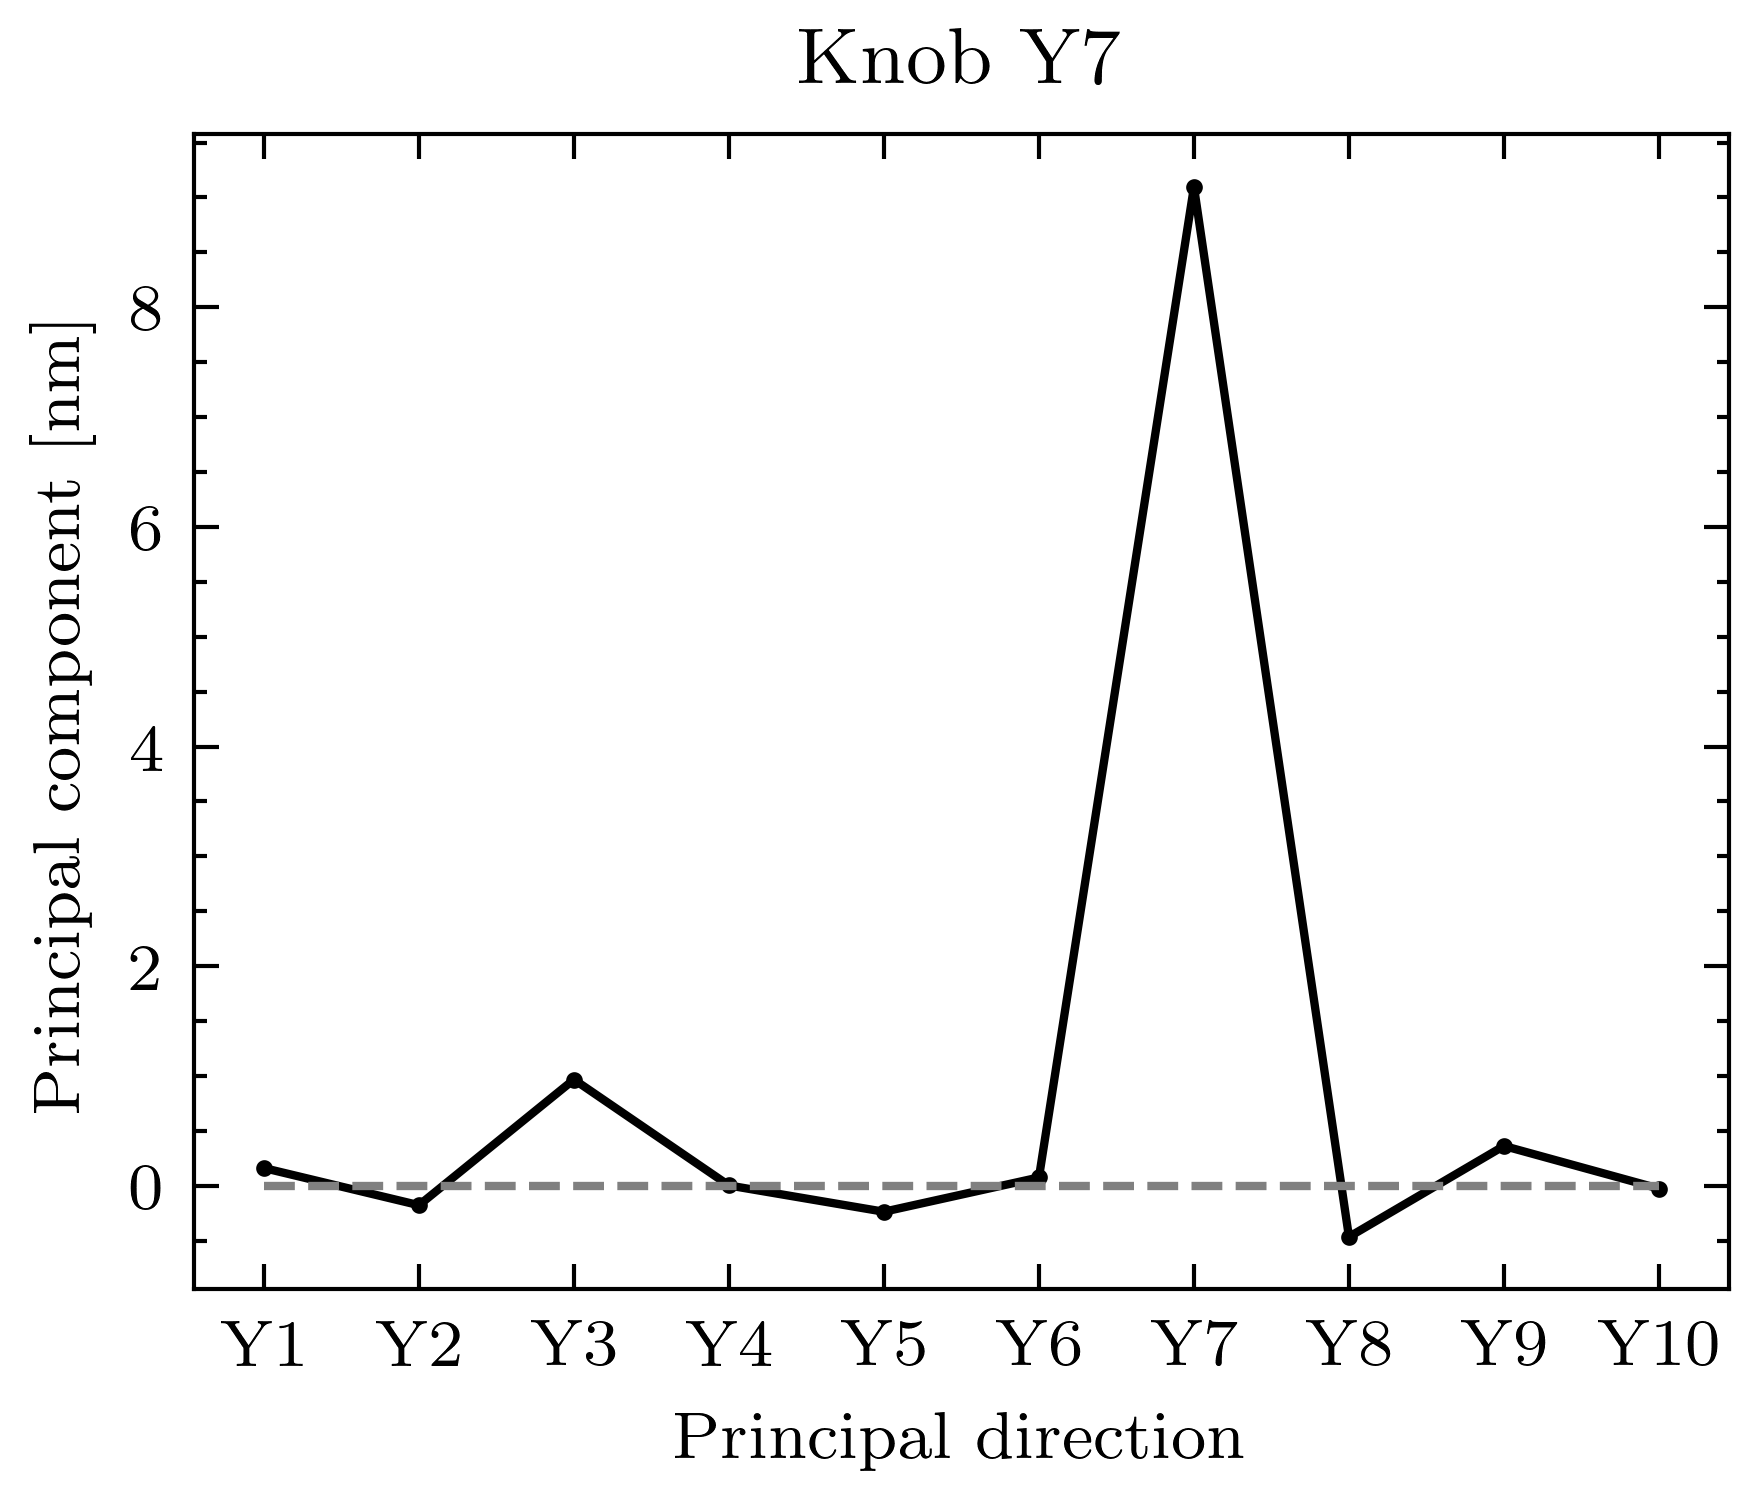

In [148]:
# So applying the Knob and checking the principal components

knob_id = 7

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 1.94356841e-10 -1.31484623e-10  2.19379095e-11 -5.99941152e-10
   4.43125951e-10 -2.51626275e-10  1.70508786e-10  9.29540636e-09
   1.01008288e-10  1.90168169e-10 -2.16926543e-10 -2.62272651e-11
  -2.72028464e-10  4.37943863e-10  3.05569496e-10 -1.66271735e-11
   2.45913040e-10  1.16607196e-09 -1.53146783e-10  1.57221687e-10
  -3.47327747e-10 -3.76539216e-10 -6.50675549e-10  1.46646183e-10
   1.23576814e-10  2.97583990e-10 -2.32373234e-10 -1.02415438e-10
   1.96362343e-10  5.58412814e-11  3.32658092e-10  2.16229052e-10
  -2.15228322e-10 -1.69321143e-10  7.58276502e-11  2.55633540e-11
   9.17949922e-11 -1.06126446e-10 -6.52174192e-11 -3.10256956e-11
   7.94381904e-11 -5.39966228e-11  2.61220371e-11  1.82534885e-11
  -9.35720461e-12  1.17523611e-11  6.43161975e-11  1.13561265e-12
   2.38403876e-12 -4.28106240e-11 -2.28382587e-11 -1.00056286e-11
   2.18100106e-11  6.21023334e-12  5.99689428e-12  3.13336019e-12
  -5.72061640e-12 -7.94734140e-12  2.97353788e-12  1.43277322e-11
  -4.69255

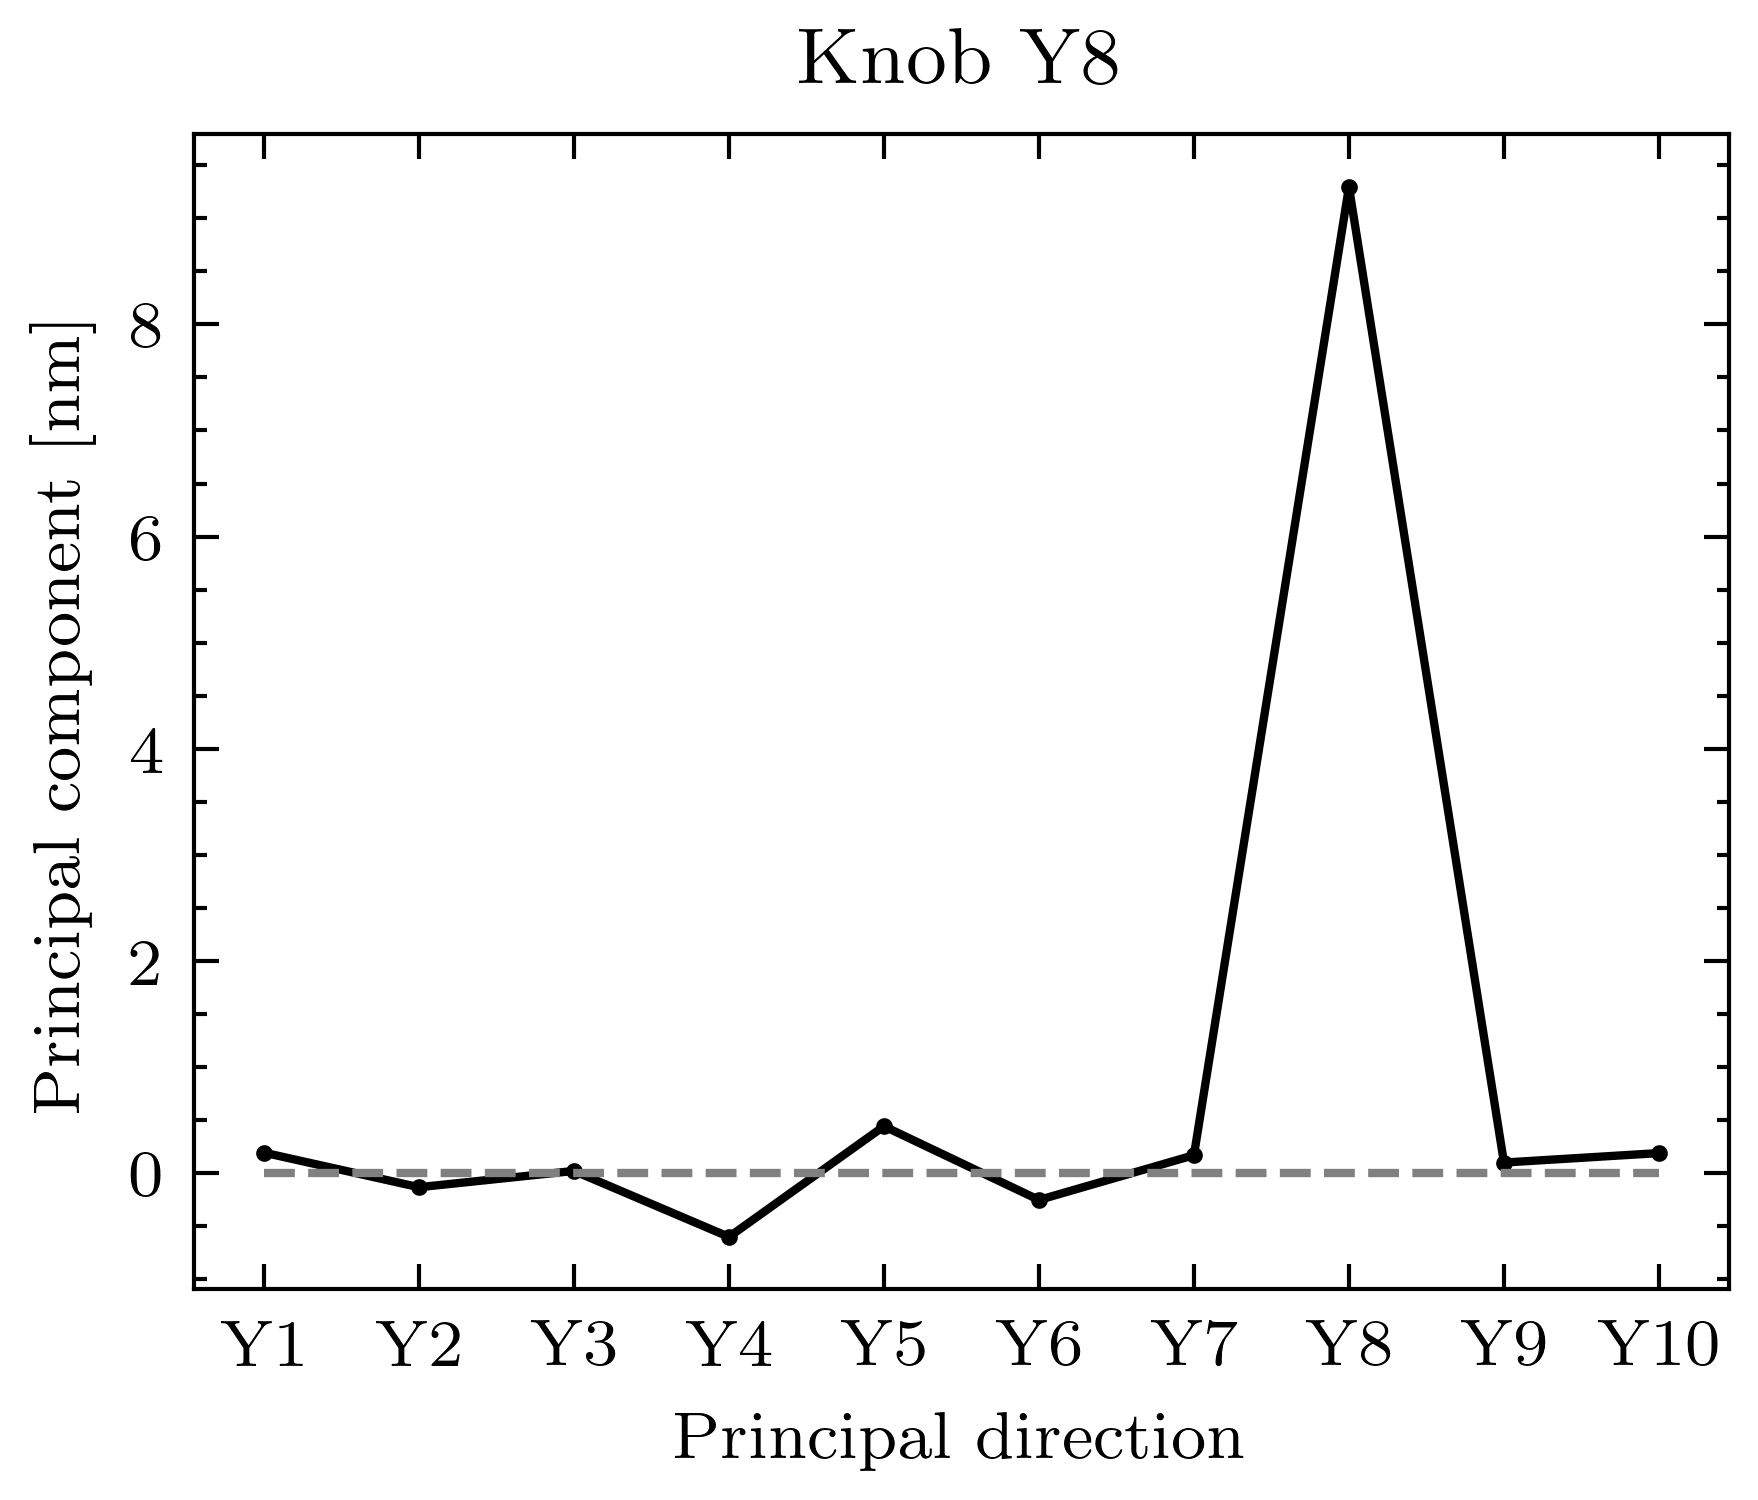

In [149]:
# So applying the Knob and checking the principal components

knob_id = 8

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-1.72119710e-10  3.93629085e-11  8.58226582e-11 -1.49328708e-10
   4.52782951e-10  4.36379011e-10 -1.59055893e-10 -2.59666977e-10
   9.42721663e-09 -3.15044174e-10 -4.72083989e-10 -7.36747768e-10
  -3.21814889e-10 -2.68673465e-10  2.05952316e-10 -7.99515036e-10
   9.20867027e-11  1.21554754e-10  1.11411132e-09  5.08843587e-11
  -6.96880678e-10  5.79737397e-10  3.99124098e-10 -2.23984519e-10
  -9.55011135e-11 -4.45561219e-10  4.98090599e-11  1.48646055e-10
  -8.49607955e-11  2.64609021e-10 -8.53790167e-11  2.22701811e-10
   4.73927147e-11  4.79001549e-10 -1.54899236e-11  9.32329543e-12
   1.81887095e-11  5.82168108e-11  2.57393980e-11  8.90248628e-12
  -5.24072048e-11 -5.58215226e-11 -8.79014708e-13  2.38091832e-12
   2.91375635e-11  4.16957573e-12  2.49650541e-11  2.01997776e-11
  -5.20294621e-12 -3.34293554e-11 -1.71824775e-11 -1.53122148e-11
   6.74519338e-12  5.73417309e-12  2.24214311e-11  1.70326523e-11
   5.58996040e-12 -3.36991692e-12  1.12143710e-11 -5.98008263e-12
  -2.41867

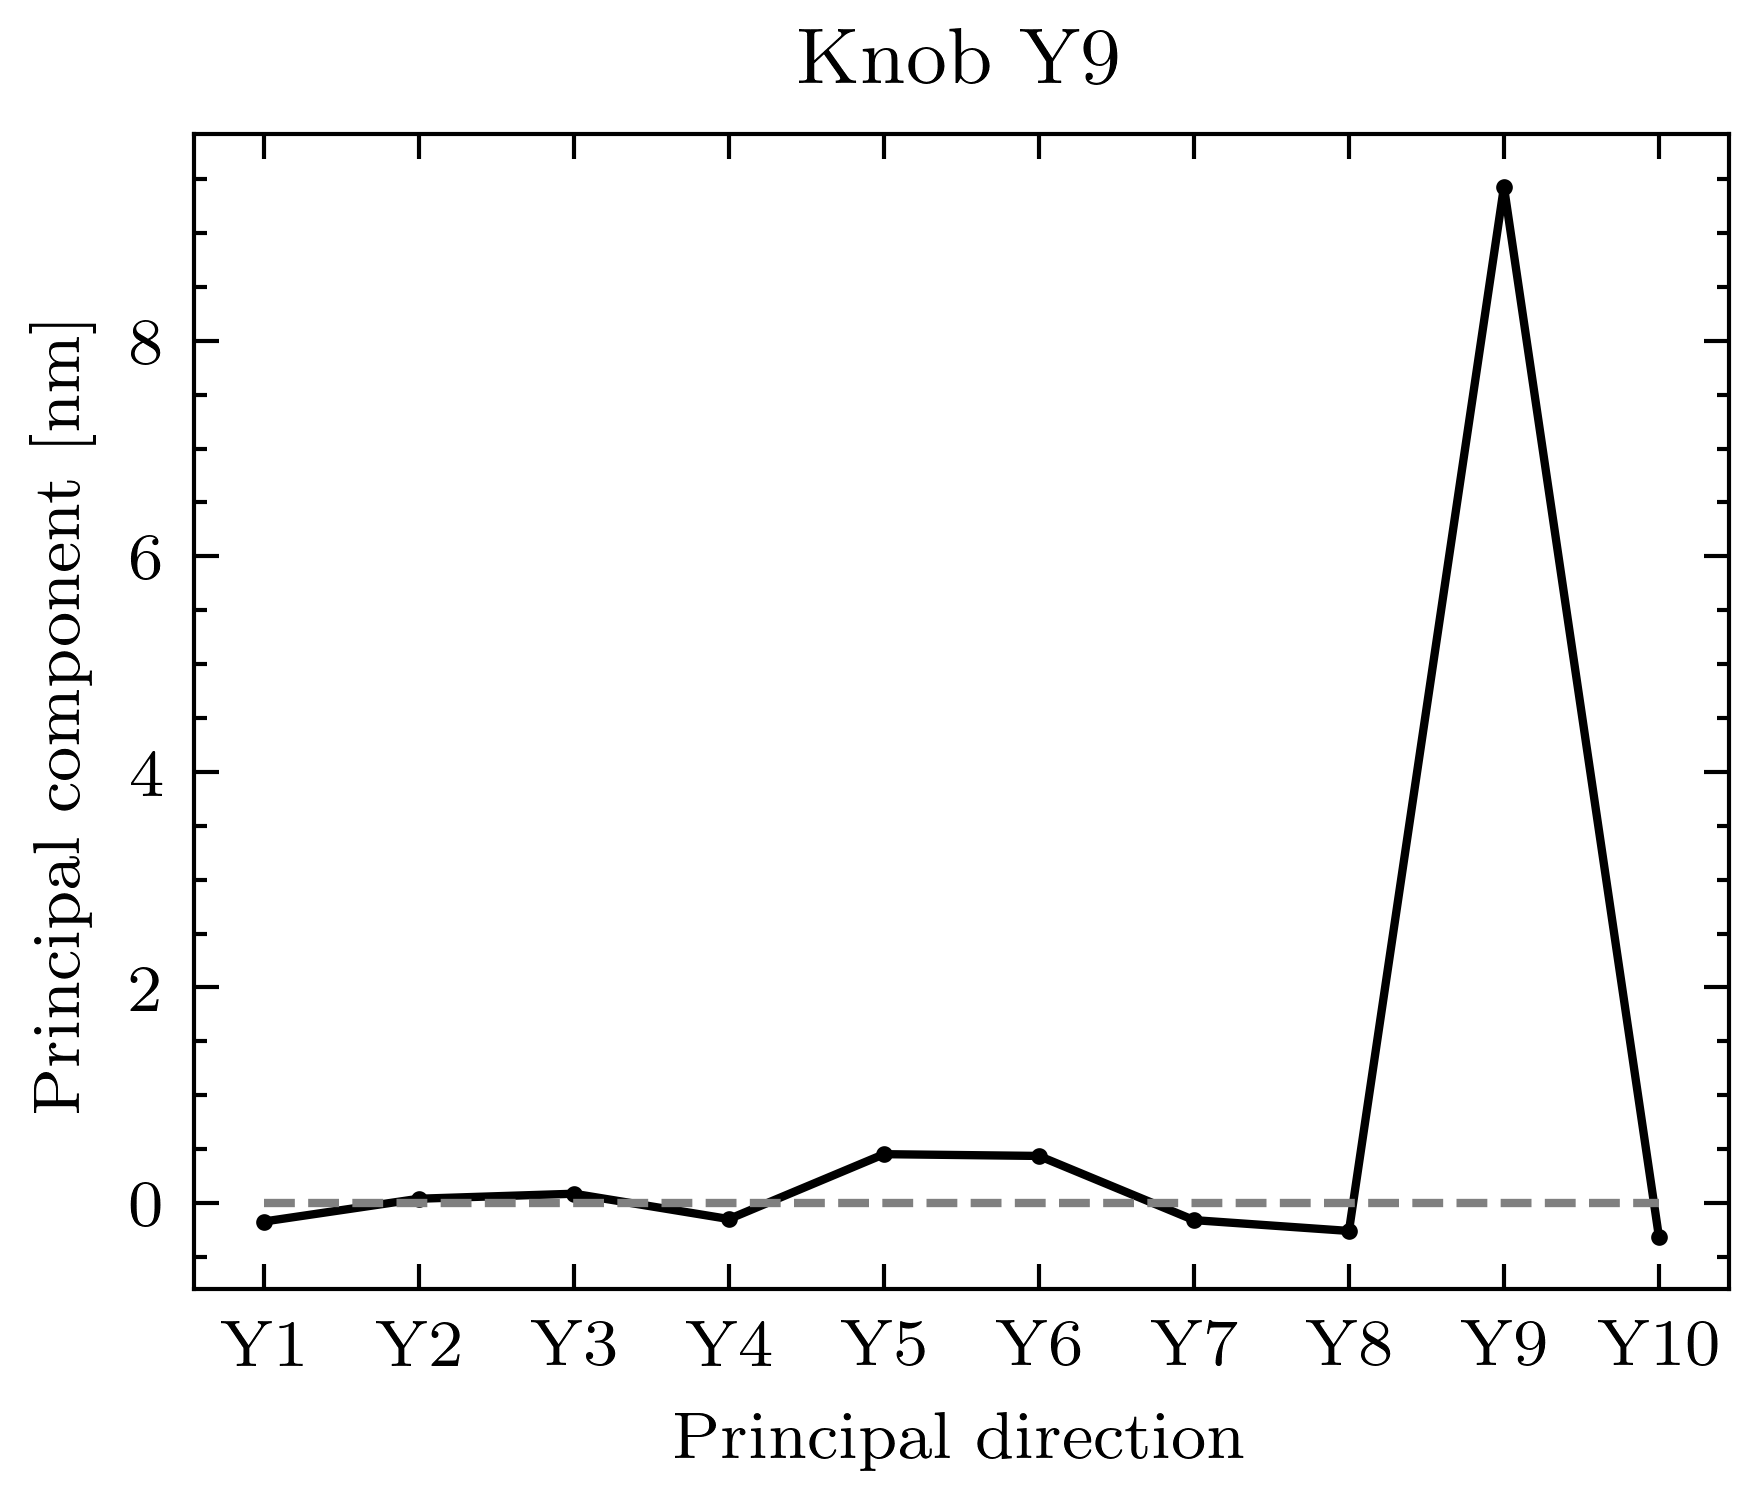

In [150]:
# So applying the Knob and checking the principal components

knob_id = 9

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 5.73577025e-11 -7.62887785e-11  1.84089148e-10  1.44379545e-11
   2.91267601e-11  3.31751152e-10  3.39528205e-10 -2.49214129e-10
  -1.41787508e-10  9.08956350e-09  2.74968483e-10  7.00984001e-10
  -2.38805966e-11  9.64280414e-10 -5.61336172e-10 -3.01204344e-10
   1.07701043e-09  1.94901645e-10  6.56783259e-10 -7.58685133e-10
   6.64188950e-10 -4.56217768e-10 -1.76474545e-10 -3.27313414e-10
  -1.99842472e-10 -2.63904467e-10  1.63606099e-10  4.85968082e-10
   1.89811935e-10  2.20596797e-10  1.14202874e-10  6.50133440e-11
   3.44826851e-10  2.08067811e-10 -3.31512360e-12 -2.66897131e-11
   7.48887361e-11 -1.21754433e-10 -6.26301804e-12 -3.44492552e-11
  -2.70492144e-11 -1.33987477e-11 -1.38503224e-11 -2.96915083e-12
   2.95182137e-11 -8.52655376e-12  4.08776636e-11  1.91729917e-11
  -5.47557307e-12 -4.54104022e-11 -3.71867784e-11 -1.97397563e-11
   3.08048652e-11 -3.14278394e-13  2.15622436e-11  3.33389507e-12
  -6.11604504e-12 -1.66830095e-11  2.04532761e-12  6.59173342e-12
  -1.26879

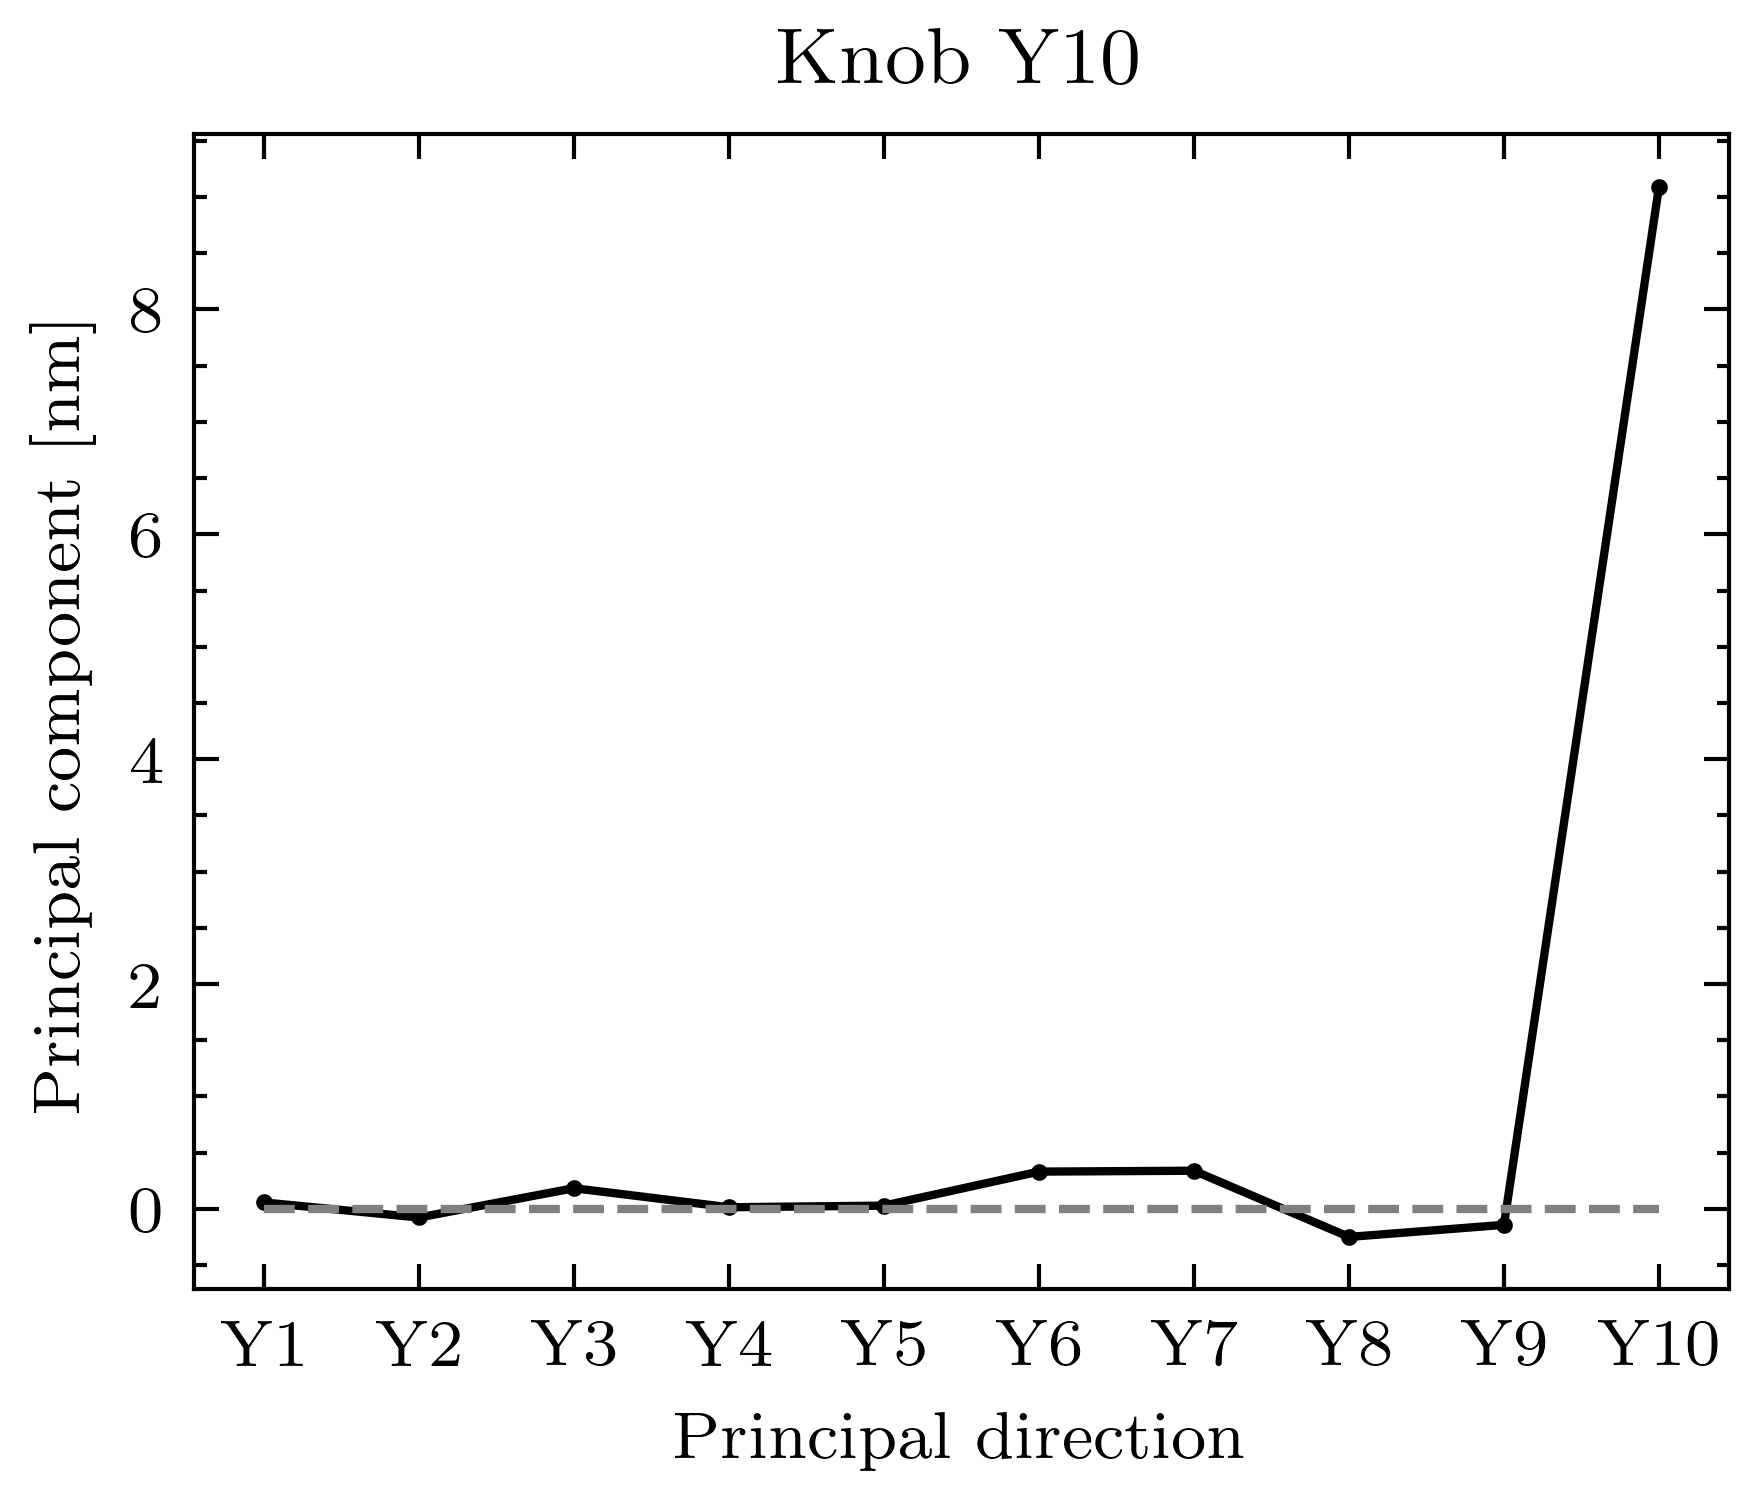

In [151]:
# So applying the Knob and checking the principal components

knob_id = 10

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 10

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

In the previous plots I analyzed the performance of the knobs wrt the other principal components that have knobs constructed on. Extending the number of principal compoentns I take into account to ~ **60**

[[ 9.73034128e-09  1.64740858e-11 -9.06518809e-10  3.05957600e-10
  -2.61925383e-10  1.91433459e-10 -1.73738046e-11 -1.08704706e-10
  -2.95026348e-10 -7.33669590e-10  2.98973723e-10  6.88409276e-11
   3.45867254e-11  4.27956886e-10 -2.72324862e-10 -2.38635600e-10
  -1.97311493e-10 -2.04684733e-10 -2.30562403e-10  1.98710248e-10
   2.92279466e-10  1.26225586e-10  9.81236373e-11  1.87224075e-10
   2.17092424e-10  1.42498348e-10 -2.00705338e-11 -5.03709378e-11
  -2.55772081e-11 -1.32787363e-10  4.04776903e-11  4.45035057e-11
   4.84525579e-11 -1.63021953e-10  3.14584135e-11  3.35280779e-11
  -2.57985093e-11 -9.35834773e-11 -1.05806241e-11  1.11487689e-12
  -1.14703184e-11 -3.06899982e-12 -5.03115493e-12  7.13030787e-12
  -1.05023983e-11 -9.01791847e-12 -5.69900008e-12  2.34225172e-11
   2.34144233e-11 -3.32605345e-12  1.34257514e-12 -6.89523478e-12
   4.60291080e-12  5.03835465e-12 -3.50120655e-12  2.52099430e-12
  -4.34654020e-12 -5.17022338e-12  8.82270416e-13  1.83344713e-12
   8.64465

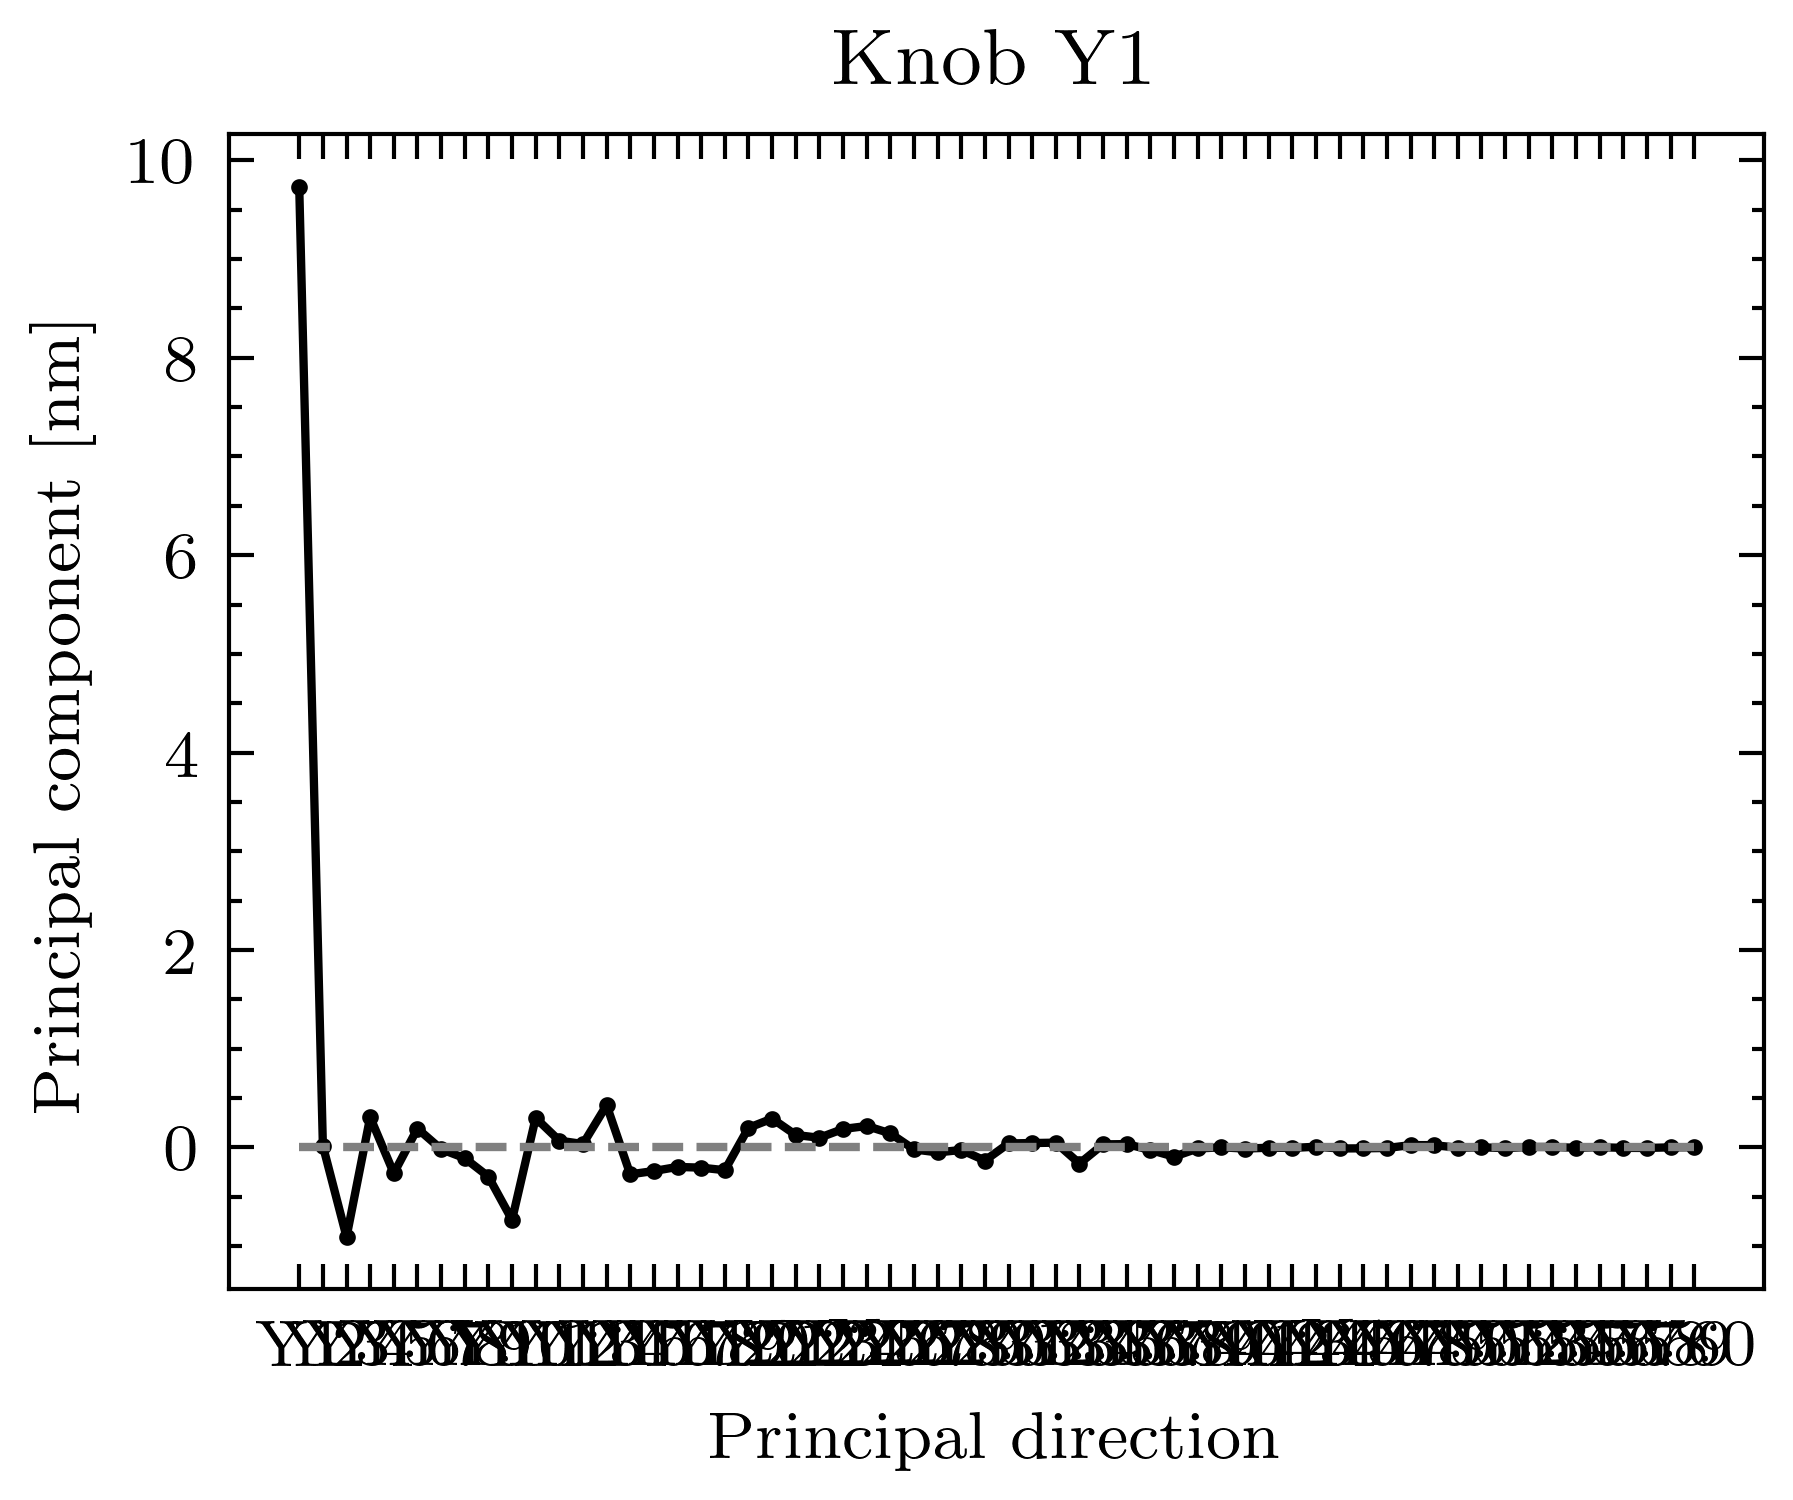

In [153]:
# So applying the Knob and checking the principal components

knob_id = 1

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 2.82113886e-11  9.98183218e-09  3.61345904e-11  1.55926453e-10
   5.53201819e-12  3.40345561e-11 -1.91569394e-10 -9.95266561e-11
   6.82164801e-11 -8.21047443e-11  2.01676879e-10  2.24135610e-11
  -5.60150613e-11  4.02506454e-10  6.67931411e-11  9.91183706e-11
  -1.96410809e-11  1.21747952e-10  6.42021379e-12  2.78025925e-10
  -3.20328330e-10 -2.04707108e-10 -1.39499837e-10 -1.77908460e-11
  -4.92989010e-11 -1.41285326e-10  2.63000657e-10  9.09375158e-12
   9.42547658e-11  8.54207517e-11 -1.52054770e-10  2.70343055e-11
  -2.81097816e-11 -5.11697040e-11 -5.65502722e-11 -6.00767647e-11
   2.46966990e-11 -1.88763619e-11  2.01405845e-11 -2.83021963e-11
  -1.20050965e-11 -9.56080575e-12 -3.35209728e-12  6.44970007e-13
   6.92371246e-12  3.58647346e-12  9.01025756e-12  1.25265632e-11
  -1.79085785e-12 -1.21711929e-11  3.62974523e-13 -6.78247336e-12
   4.54275385e-13  6.93996873e-12 -1.74964125e-12  2.02392392e-12
   4.58361492e-13 -1.35578894e-12  5.12847042e-12  1.88047009e-12
  -6.21814

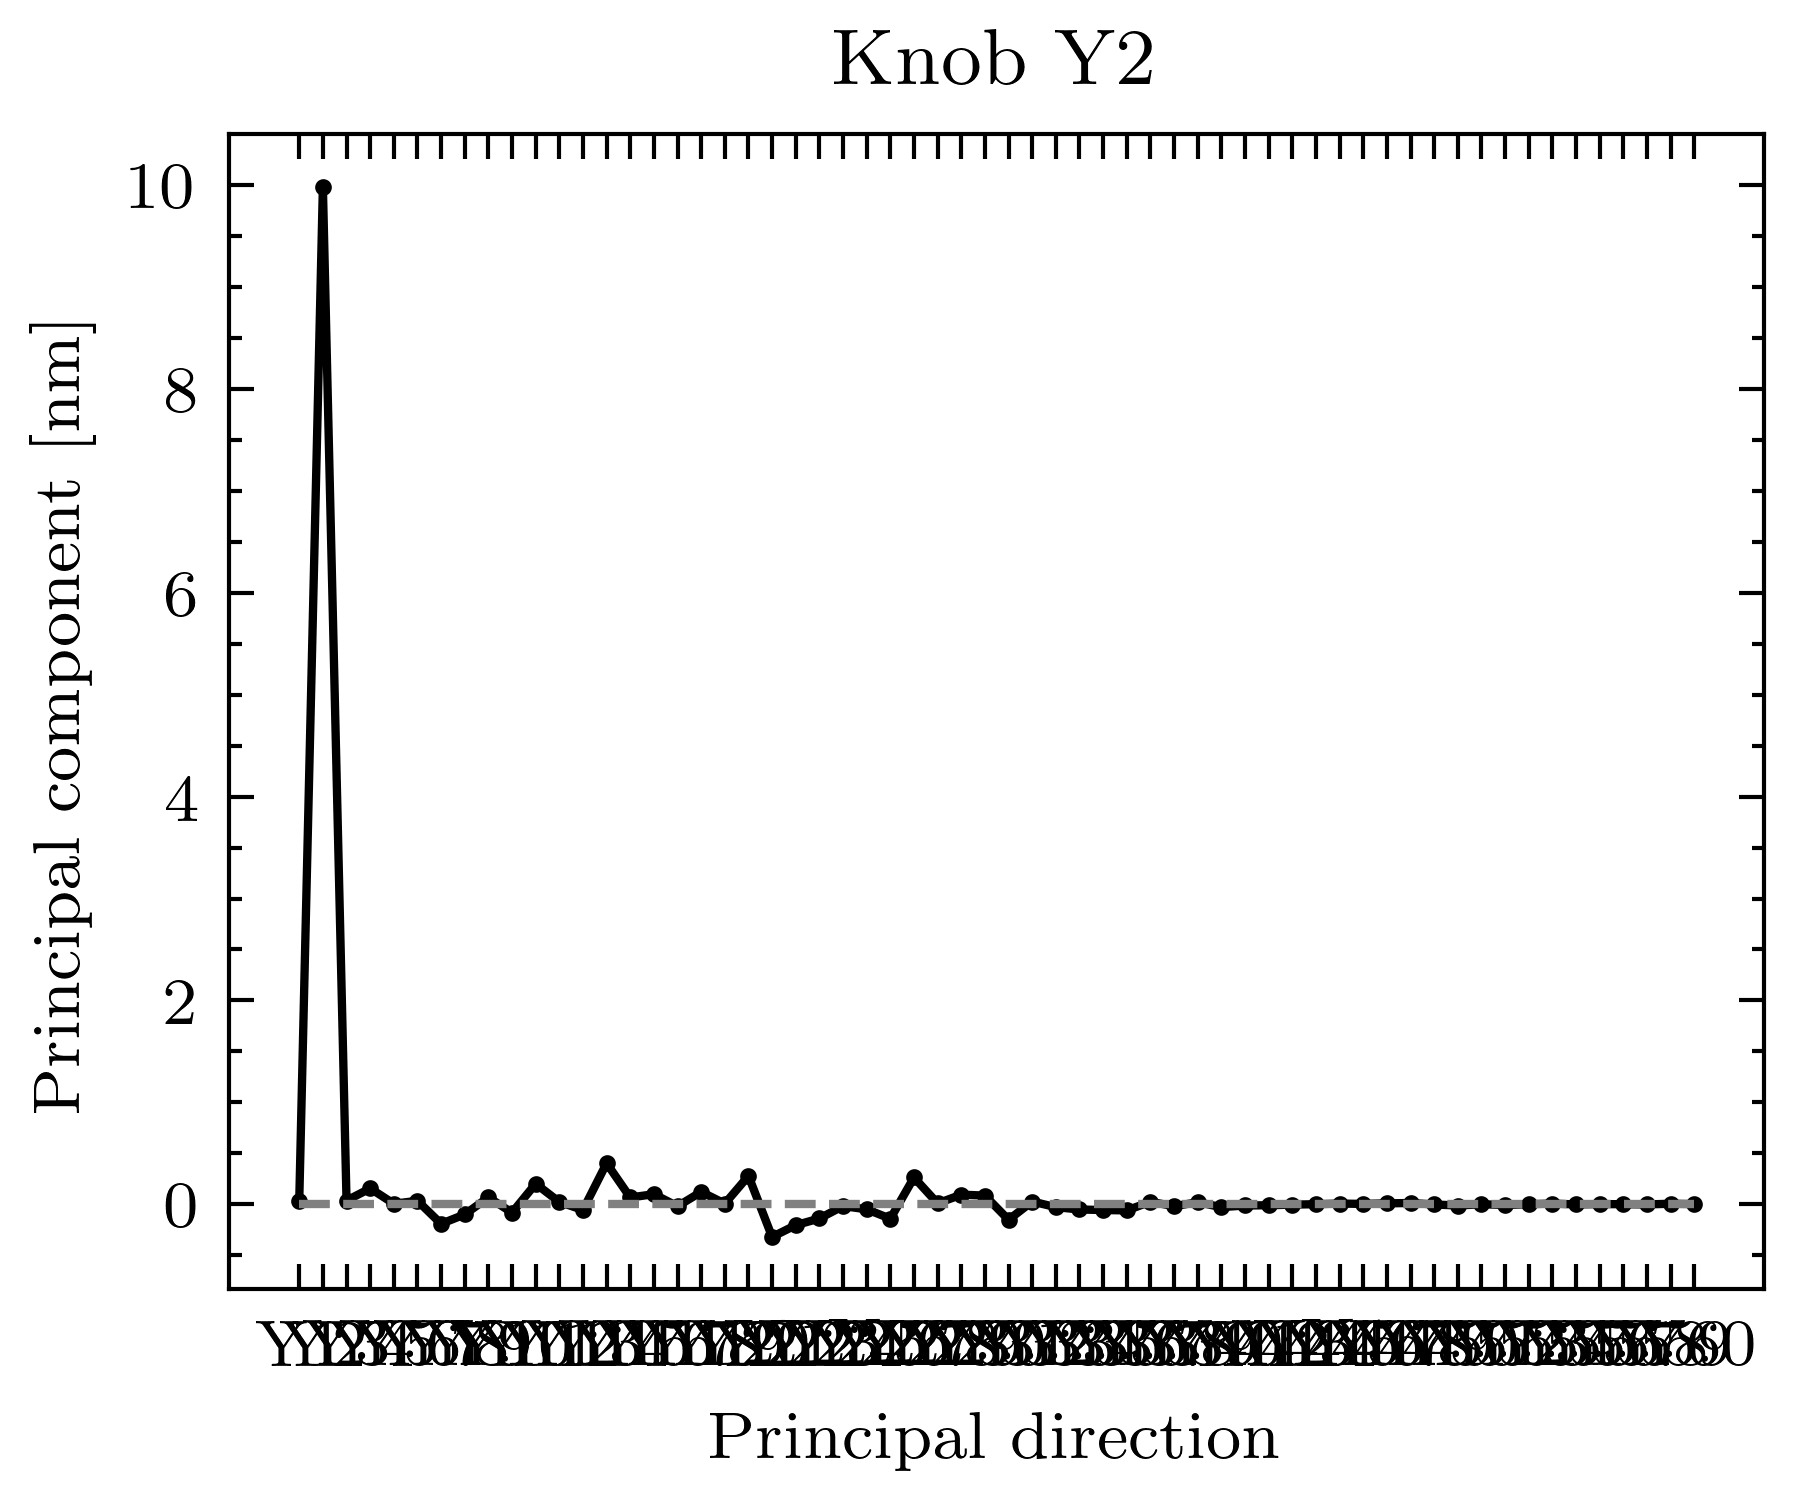

In [154]:
# So applying the Knob and checking the principal components

knob_id = 2

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 2.67052407e-10 -2.54582064e-10  9.67105302e-09 -7.85853448e-11
   6.22709763e-10  1.28515057e-10  2.37399780e-10 -7.55155671e-10
  -1.84544400e-10 -1.44720256e-10 -5.64626846e-11  9.66022786e-13
   1.94988081e-10  1.75063389e-10  1.68617001e-10  4.34165685e-10
  -9.08862807e-11  1.86651140e-10 -4.61110217e-10  2.71682098e-10
  -2.06523985e-10  5.10317935e-10 -4.70875674e-10 -2.86397733e-10
   1.49829285e-10  3.93352117e-10 -5.04748641e-10 -3.82229173e-11
  -3.24538691e-10  2.27679447e-10 -2.49348362e-10 -2.17143491e-10
   1.91723358e-10  1.83698616e-10  3.23557037e-12 -4.23967080e-11
  -2.69010867e-11  6.69251707e-11  8.82994704e-12 -6.90908269e-12
  -6.04156959e-11  2.66671416e-11 -1.23387545e-11 -4.47976764e-12
   6.07661236e-12 -2.91515095e-14 -2.46471873e-11 -4.79451232e-12
  -9.51722048e-12  2.08785613e-11  1.04332125e-11 -5.42824225e-12
  -1.02479986e-11  3.94623832e-12 -3.97033110e-12  1.91261792e-12
   1.15238202e-13 -2.15445596e-12  1.25963875e-12 -4.22047184e-12
   1.38999

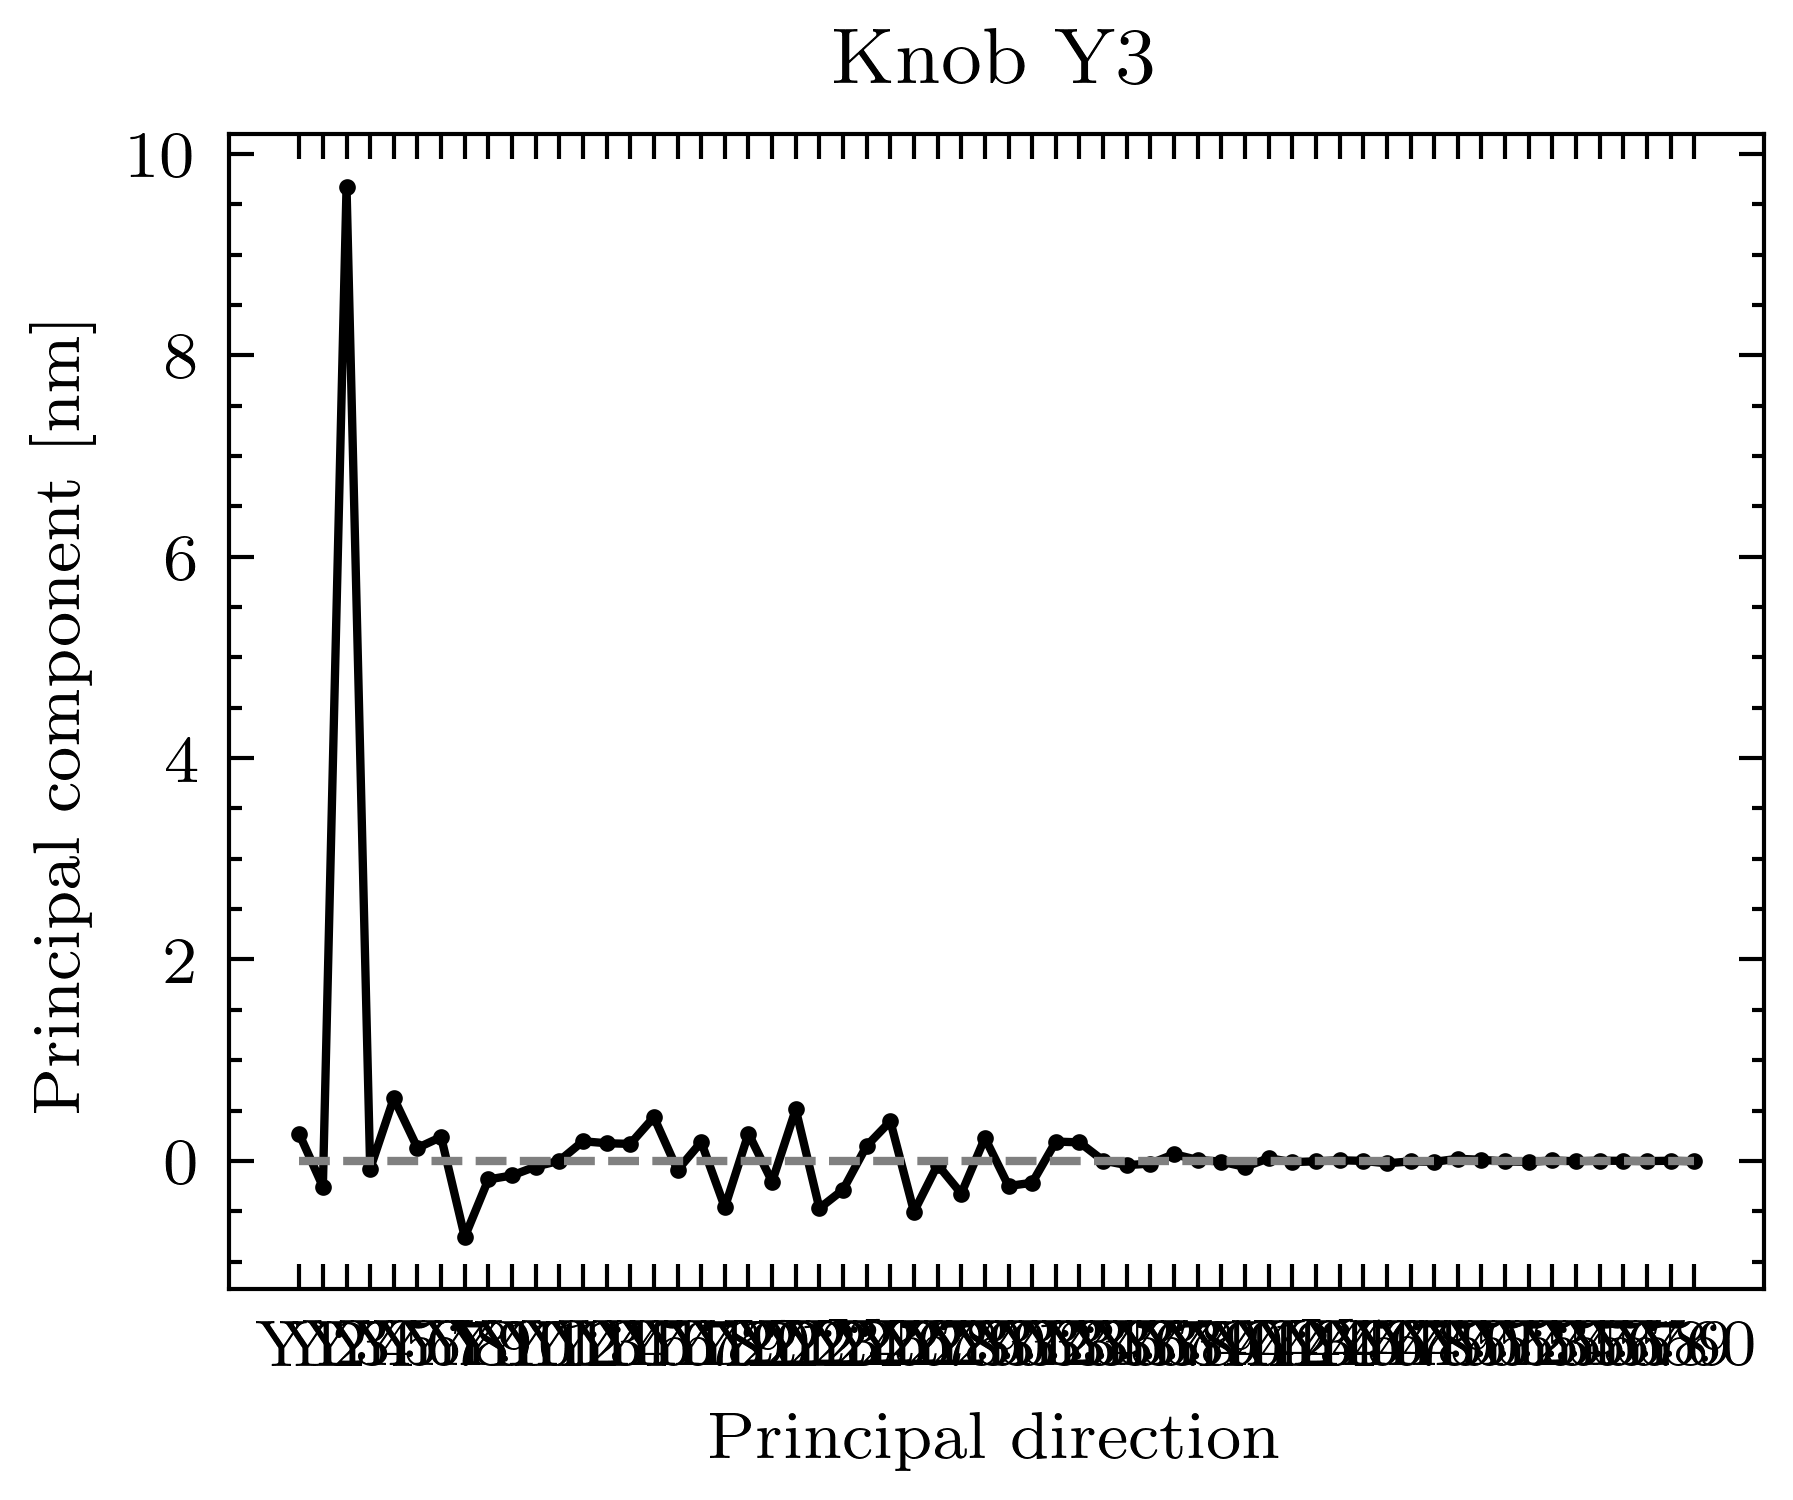

In [155]:
# So applying the Knob and checking the principal components

knob_id = 3

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-8.47235080e-10 -1.64855933e-10 -6.99273776e-11  9.55878951e-09
   4.86730442e-10 -4.31165120e-10 -5.19350153e-11 -1.33040335e-10
  -7.41170522e-10 -5.70424178e-11 -9.29695459e-10 -4.43219363e-11
   4.33619484e-11 -2.14371882e-10  4.46993212e-10  1.08225748e-10
   4.99865933e-10  1.94370284e-10  2.20514901e-10 -1.33092091e-10
   2.31926096e-11  2.12561218e-10  4.63479638e-10 -3.66190103e-10
   2.73344158e-10 -3.54472454e-11  1.28341568e-10  4.93077799e-10
  -9.54229984e-12  3.37131174e-10  2.17581691e-10 -4.64900312e-10
   8.95351791e-11 -2.18916229e-10  1.36981355e-12  6.05235483e-12
  -6.88492379e-11 -2.20909152e-11  1.98462704e-11 -9.85895111e-12
  -5.87839624e-12  2.57914891e-11  4.99843001e-13 -1.68553164e-12
  -4.50892865e-12 -1.20781977e-11 -4.09546970e-12 -1.65420869e-11
  -1.35247833e-11  5.94158047e-12 -2.33169408e-13 -1.24632123e-12
  -2.06348405e-14 -2.94995152e-12  3.69718357e-13  1.80060385e-12
  -1.51340812e-12  8.71825148e-13 -2.40131233e-12  3.03126935e-13
  -4.00541

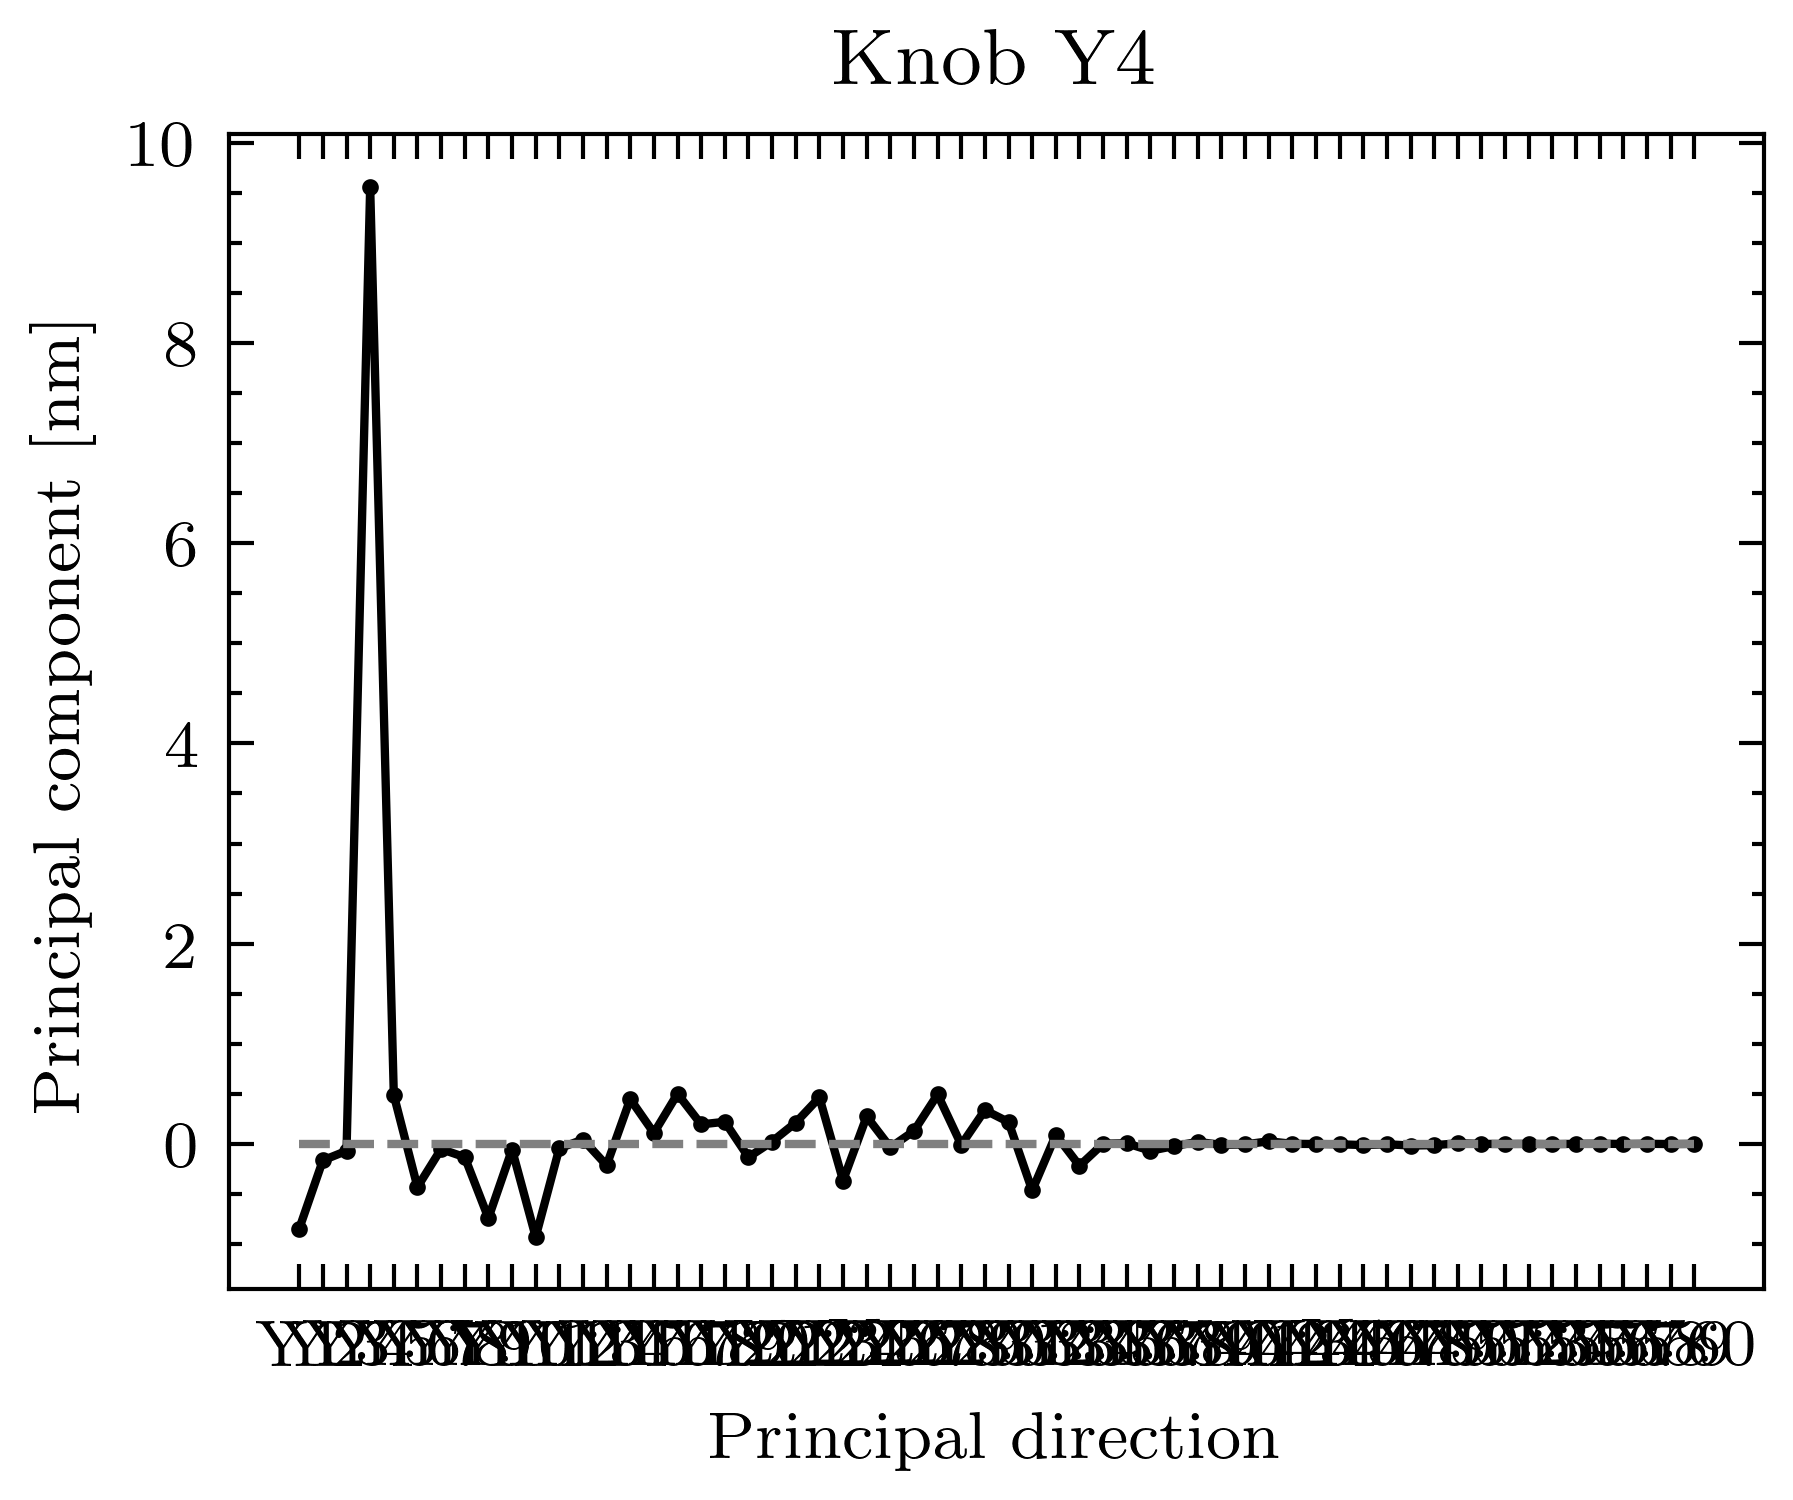

In [156]:
# So applying the Knob and checking the principal components

knob_id = 4

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-1.07139765e-10  6.12996742e-11 -1.04811959e-09  5.51152575e-11
   9.82129488e-09 -3.15893900e-11  2.58709660e-10  7.19565967e-11
   1.94567508e-10  7.37698437e-11  2.22017393e-10  2.19750177e-10
   2.69558362e-10 -3.10748578e-11  5.52457131e-10  3.59268493e-10
   4.83036399e-10  2.26294119e-11  6.39933845e-11 -2.71112198e-10
   2.41223468e-10  3.94176890e-10  2.97000729e-10 -1.36137483e-10
  -2.35938511e-10  1.19523983e-10 -1.13192462e-10  1.76489631e-10
   1.52294134e-11 -6.64547742e-12  4.63410426e-11  1.64575016e-10
   1.88297203e-10 -2.02597341e-11  4.12388368e-11  6.38593497e-11
   5.47723869e-11 -5.18086688e-11 -3.64768919e-11  1.55644852e-11
   1.39209402e-12  1.63202134e-11 -2.16437991e-12  3.77932816e-13
  -1.82530989e-11 -8.09571275e-12 -1.63463850e-11  6.65749323e-12
   2.24709372e-11  1.89627412e-11 -1.10228158e-13  1.40236370e-11
  -1.88946576e-12 -3.97315507e-12 -1.24792866e-11 -8.20081190e-12
   4.47366560e-12  2.94962051e-12 -6.34402614e-12  1.93788519e-12
   2.62959

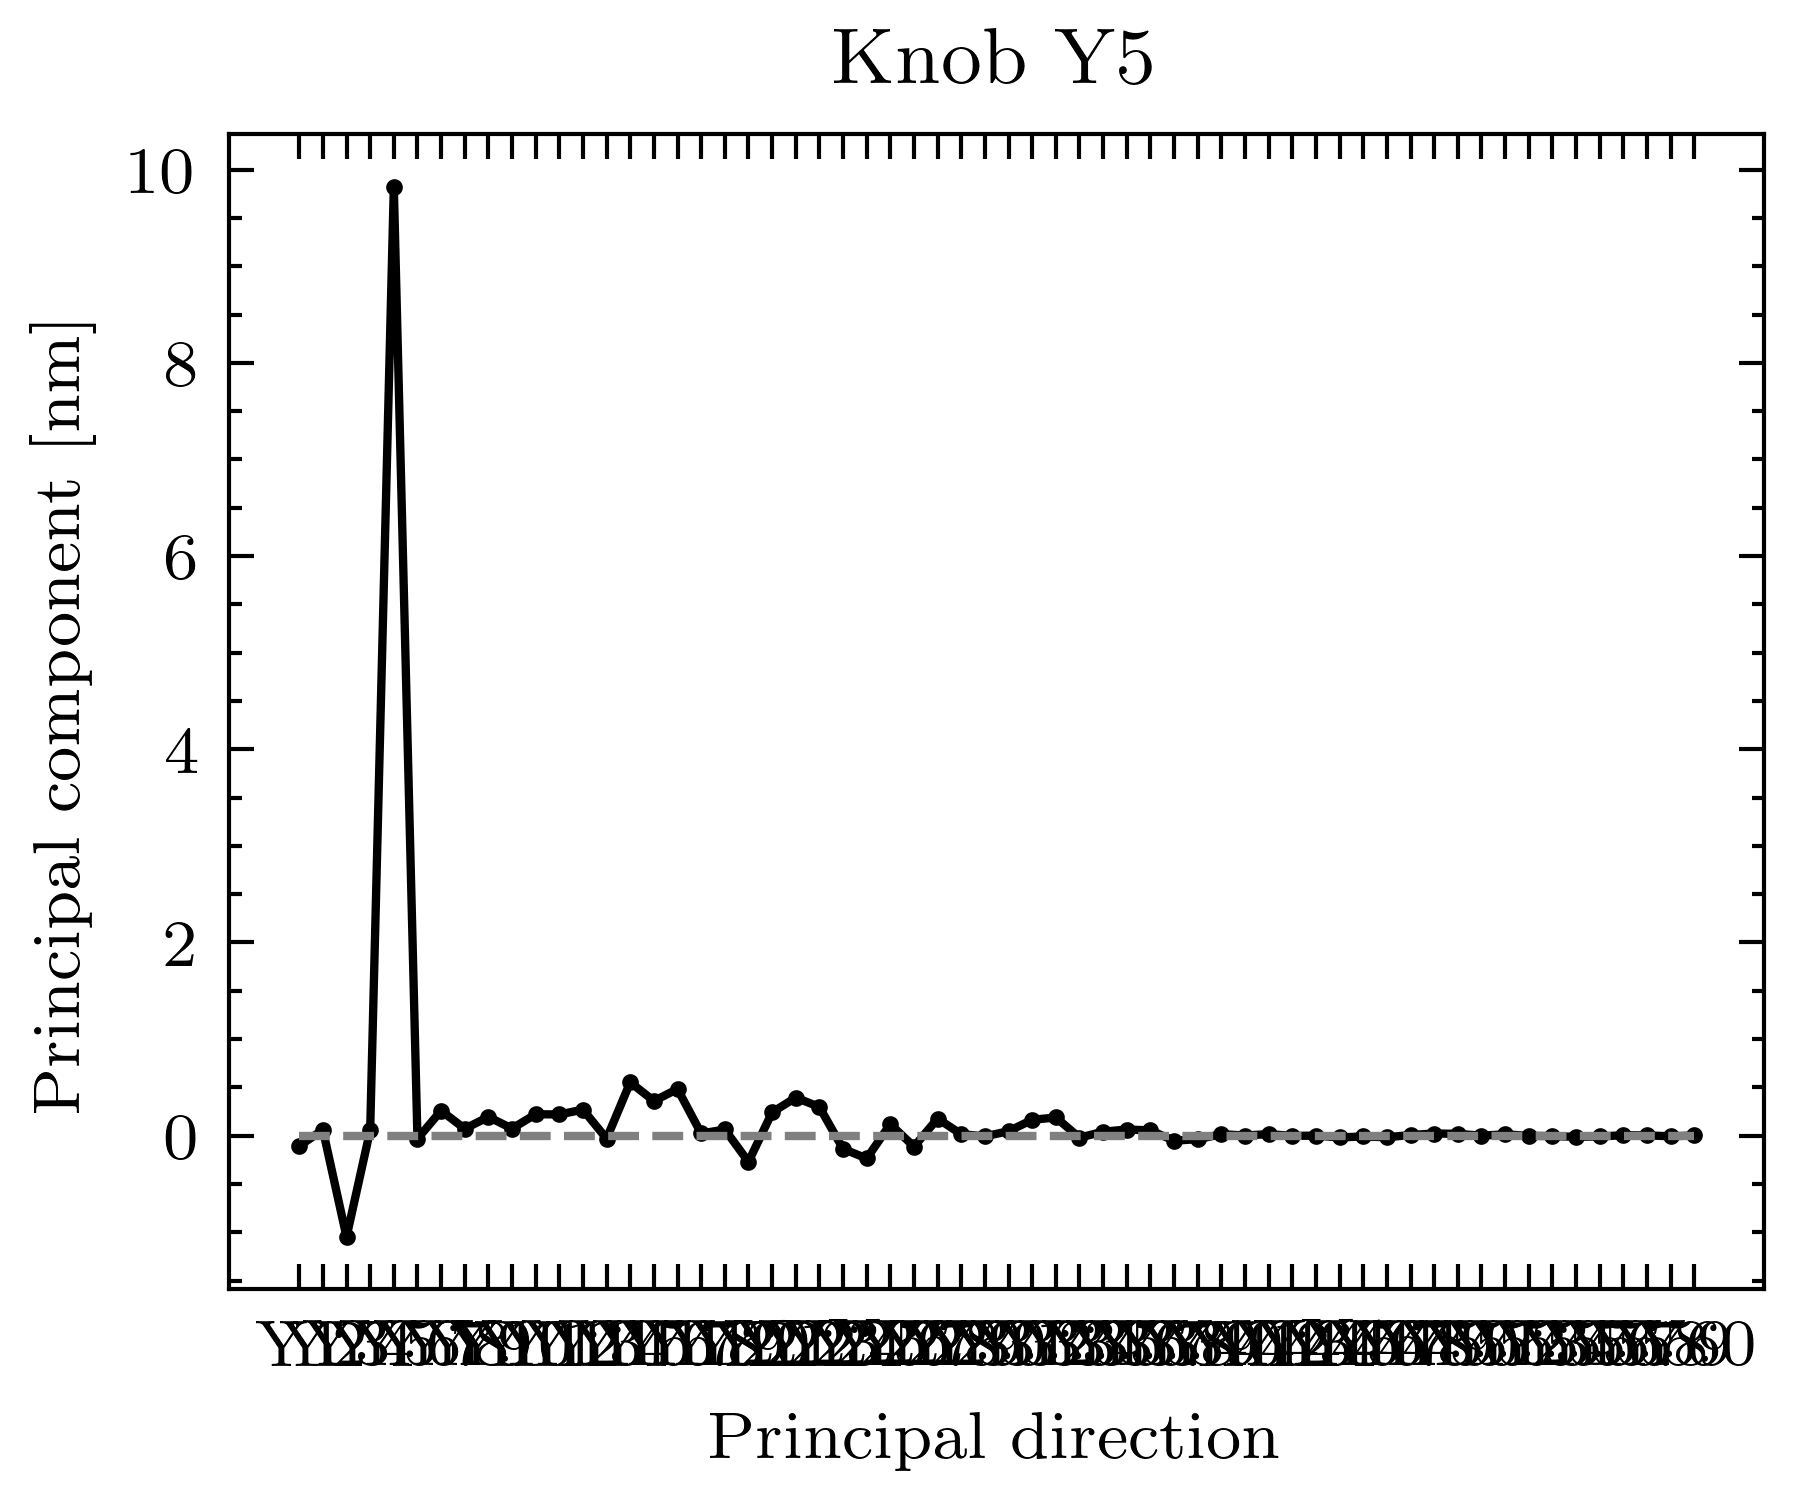

In [157]:
# So applying the Knob and checking the principal components

knob_id = 5

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-2.69756658e-10  6.33145106e-12  2.05365873e-10  3.29429537e-10
   1.00208302e-10  9.69865345e-09  1.21829255e-11 -1.53260651e-10
  -3.65631056e-10  7.71788816e-11 -1.93768911e-10 -1.90425784e-10
   1.95576877e-10  2.76634186e-10  9.45978434e-11  1.67563956e-10
  -3.29398670e-10  1.88875690e-10  1.53457692e-10 -1.16429124e-11
  -5.18785639e-11  1.63332070e-10 -1.82611289e-10  5.40721695e-10
   3.54543104e-10 -2.50151019e-10 -4.85285021e-11 -1.86822858e-10
   6.41648464e-13 -1.52011205e-10  3.87767364e-11 -1.61138909e-10
  -5.23149689e-11 -1.15527533e-11 -6.30645654e-11  1.14975519e-10
   6.25565401e-12 -6.46551037e-11  3.28022345e-11 -1.49840257e-12
   4.20618601e-11  9.04531662e-12 -1.76059367e-12 -1.50314069e-12
  -8.76088367e-12 -1.20580148e-11 -4.44655147e-12  9.47079344e-12
   1.84939143e-11 -2.02625375e-11  6.64454849e-12  1.32282664e-11
   1.38365159e-12 -6.16079013e-12 -4.45549383e-12 -6.92510555e-13
  -1.91956516e-13  3.49631407e-12 -6.59378078e-12 -4.63300921e-12
   8.99825

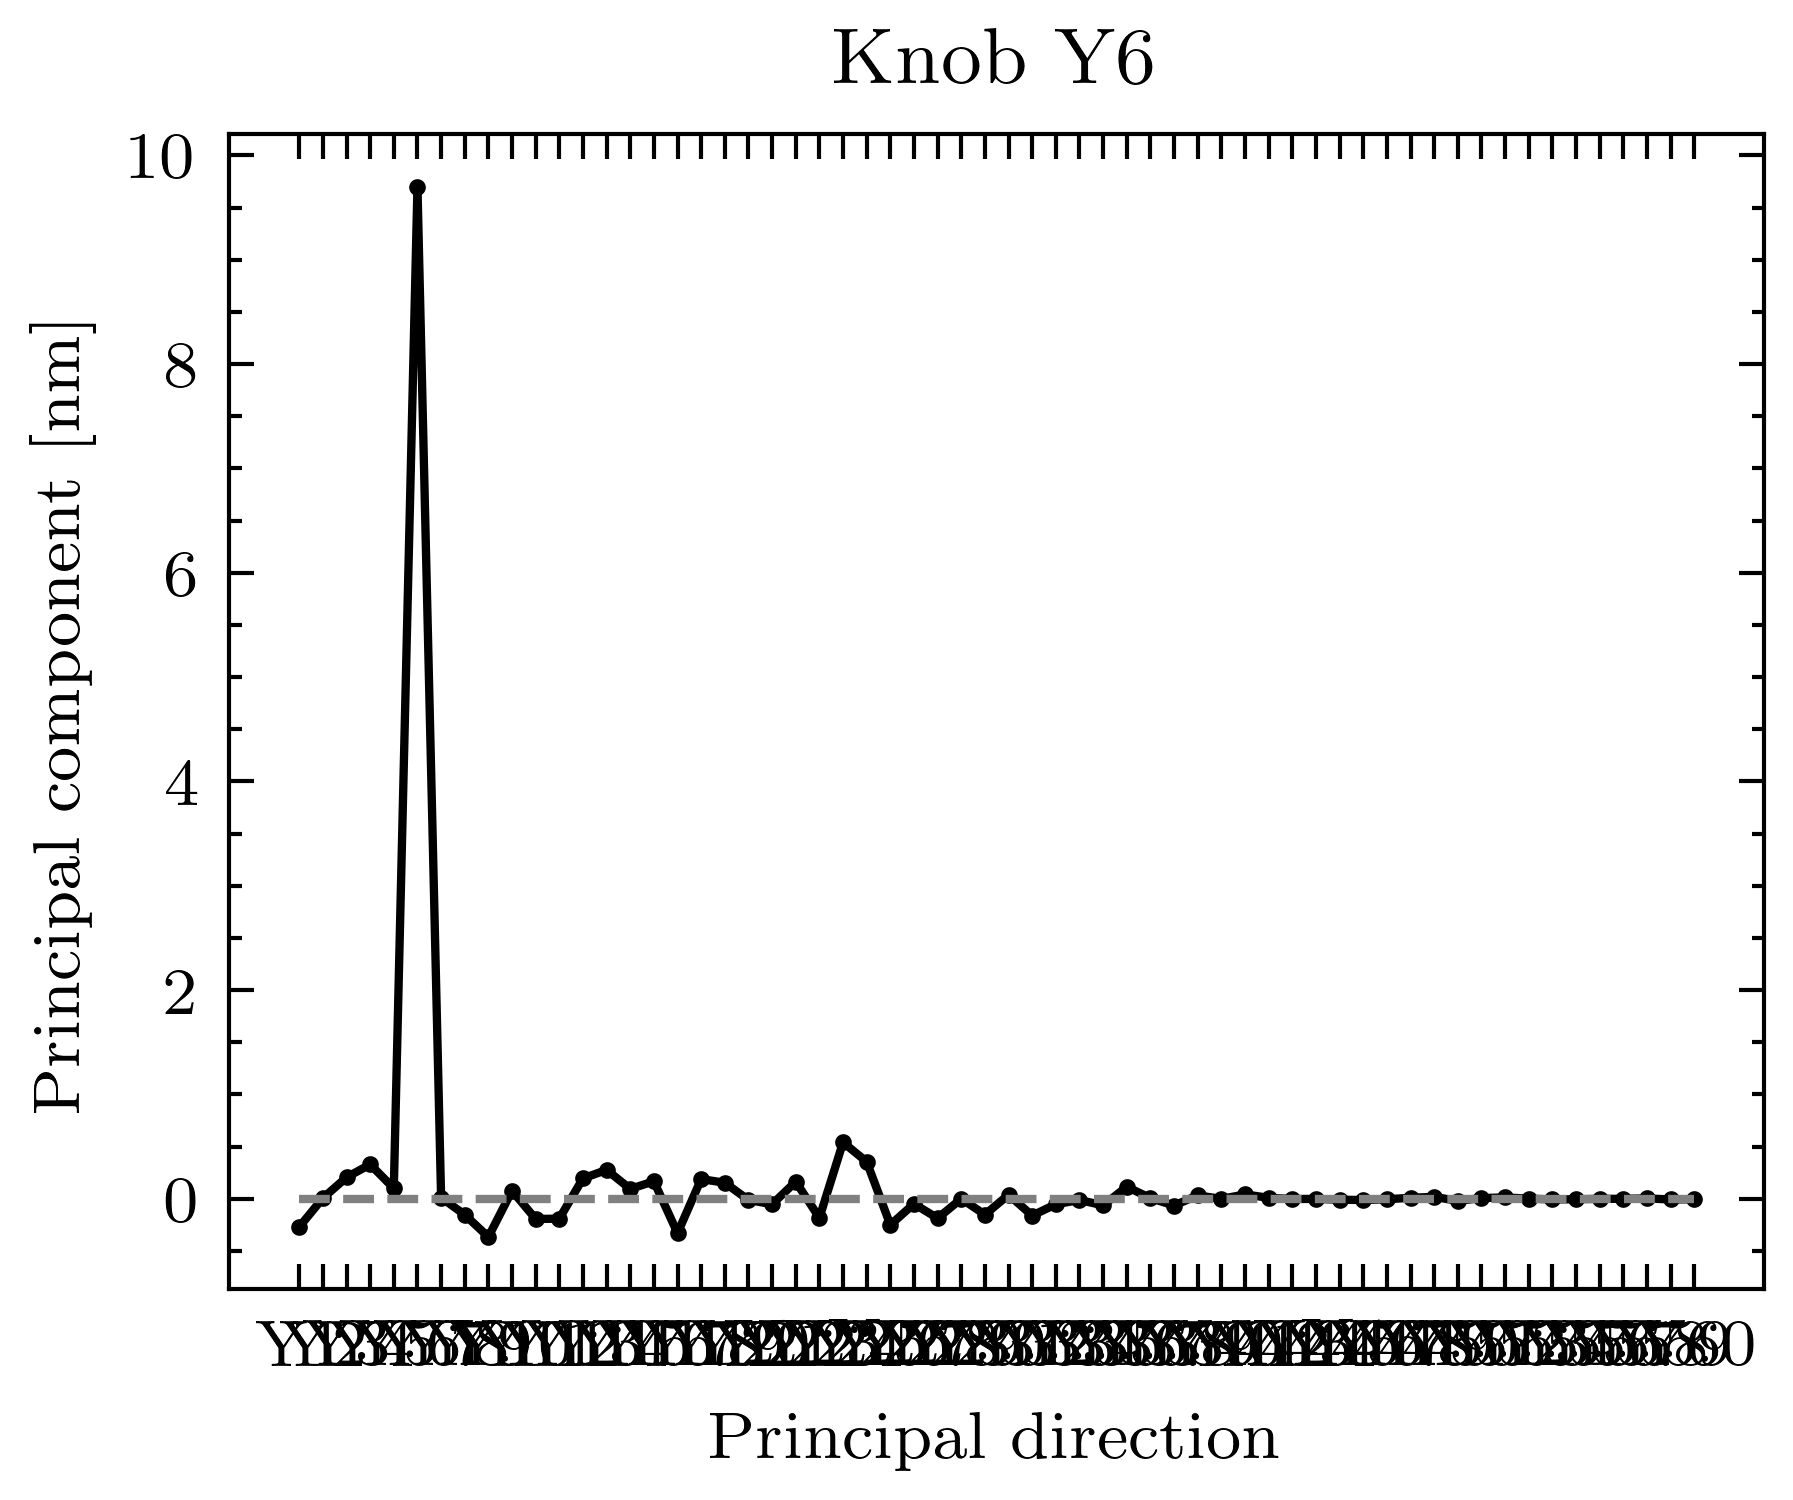

In [158]:
# So applying the Knob and checking the principal components

knob_id = 6

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 1.62075008e-10 -1.76151165e-10  9.68218734e-10  3.54877730e-12
  -2.35715883e-10  7.66301681e-11  9.09627150e-09 -4.65041852e-10
   3.63249650e-10 -2.47789749e-11  8.69999679e-10 -5.58193034e-10
  -7.85434493e-10  8.58475653e-11 -4.95047993e-10 -4.85065538e-10
  -4.09800480e-10  8.82834431e-10  4.35508774e-11  2.63179917e-10
  -2.50290609e-10  2.35758256e-10 -6.91611295e-10 -7.26402927e-10
   3.13407536e-10  8.38218568e-11 -1.14437375e-10 -1.59514656e-10
  -3.28599343e-10 -6.28281770e-11  1.26422443e-10  1.28809827e-10
  -4.68826081e-10  1.25394410e-10 -1.63910731e-11 -1.75988221e-10
  -2.85563362e-10  1.19942325e-10  5.01850557e-11  5.09921027e-11
  -1.01433754e-10  5.36901391e-11 -1.30307952e-11 -1.12411692e-11
   1.30798672e-11  1.66492885e-11 -3.35630345e-11  2.00122135e-12
  -1.20095279e-11  4.53877894e-11  1.60637861e-11 -2.30001563e-11
  -1.60822822e-11  1.41449283e-11  8.08600197e-12  7.79209198e-12
   5.63568305e-12 -5.29201425e-12  1.46005883e-11 -4.46821826e-12
  -8.89273

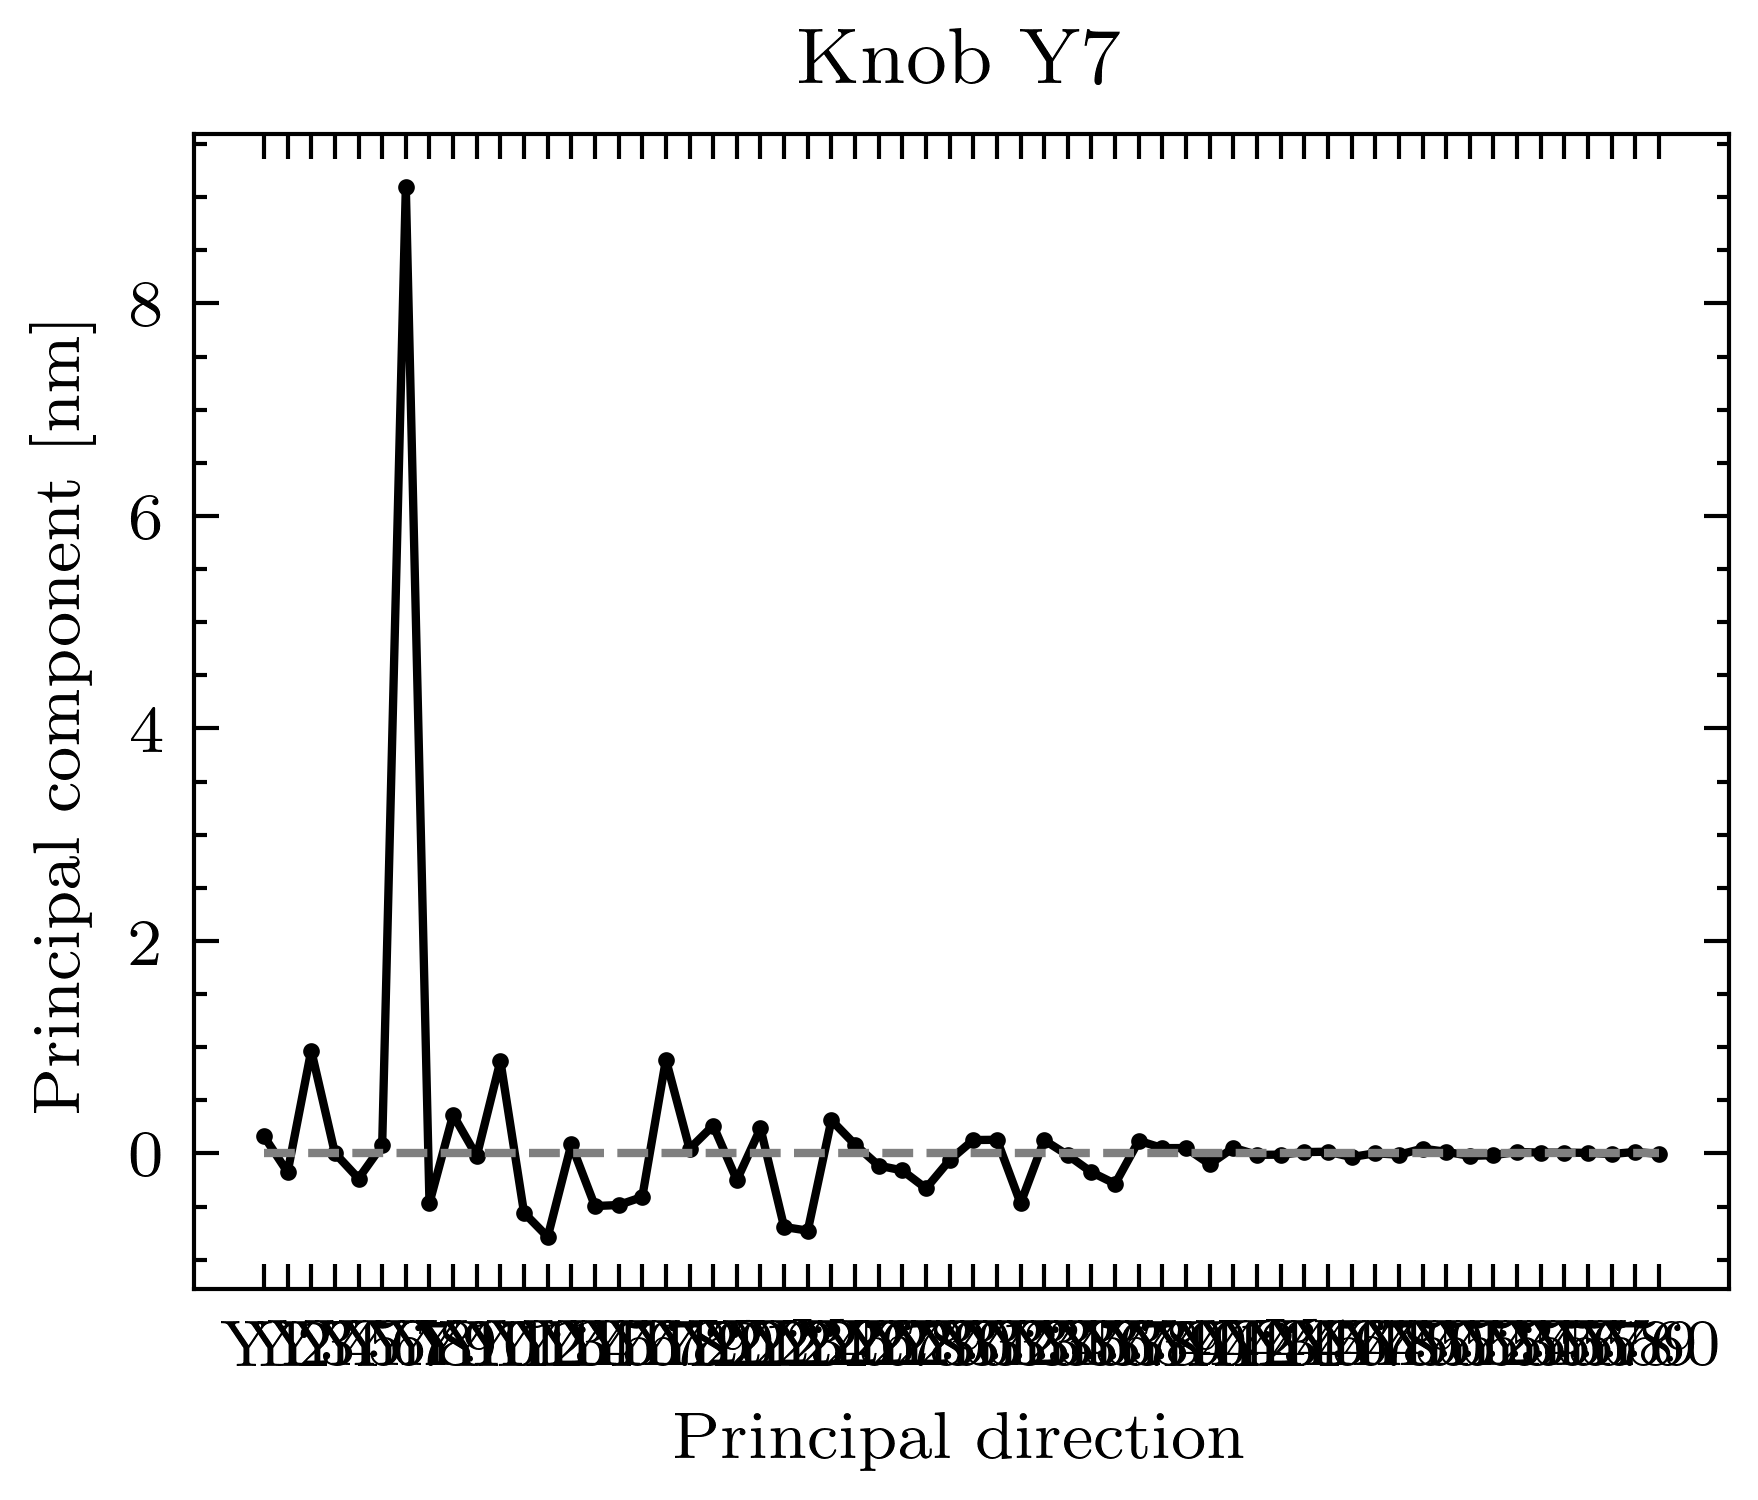

In [159]:
# So applying the Knob and checking the principal components

knob_id = 7

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 1.94356841e-10 -1.31484623e-10  2.19379095e-11 -5.99941152e-10
   4.43125951e-10 -2.51626275e-10  1.70508786e-10  9.29540636e-09
   1.01008288e-10  1.90168169e-10 -2.16926543e-10 -2.62272651e-11
  -2.72028464e-10  4.37943863e-10  3.05569496e-10 -1.66271735e-11
   2.45913040e-10  1.16607196e-09 -1.53146783e-10  1.57221687e-10
  -3.47327747e-10 -3.76539216e-10 -6.50675549e-10  1.46646183e-10
   1.23576814e-10  2.97583990e-10 -2.32373234e-10 -1.02415438e-10
   1.96362343e-10  5.58412814e-11  3.32658092e-10  2.16229052e-10
  -2.15228322e-10 -1.69321143e-10  7.58276502e-11  2.55633540e-11
   9.17949922e-11 -1.06126446e-10 -6.52174192e-11 -3.10256956e-11
   7.94381904e-11 -5.39966228e-11  2.61220371e-11  1.82534885e-11
  -9.35720461e-12  1.17523611e-11  6.43161975e-11  1.13561265e-12
   2.38403876e-12 -4.28106240e-11 -2.28382587e-11 -1.00056286e-11
   2.18100106e-11  6.21023334e-12  5.99689428e-12  3.13336019e-12
  -5.72061640e-12 -7.94734140e-12  2.97353788e-12  1.43277322e-11
  -4.69255

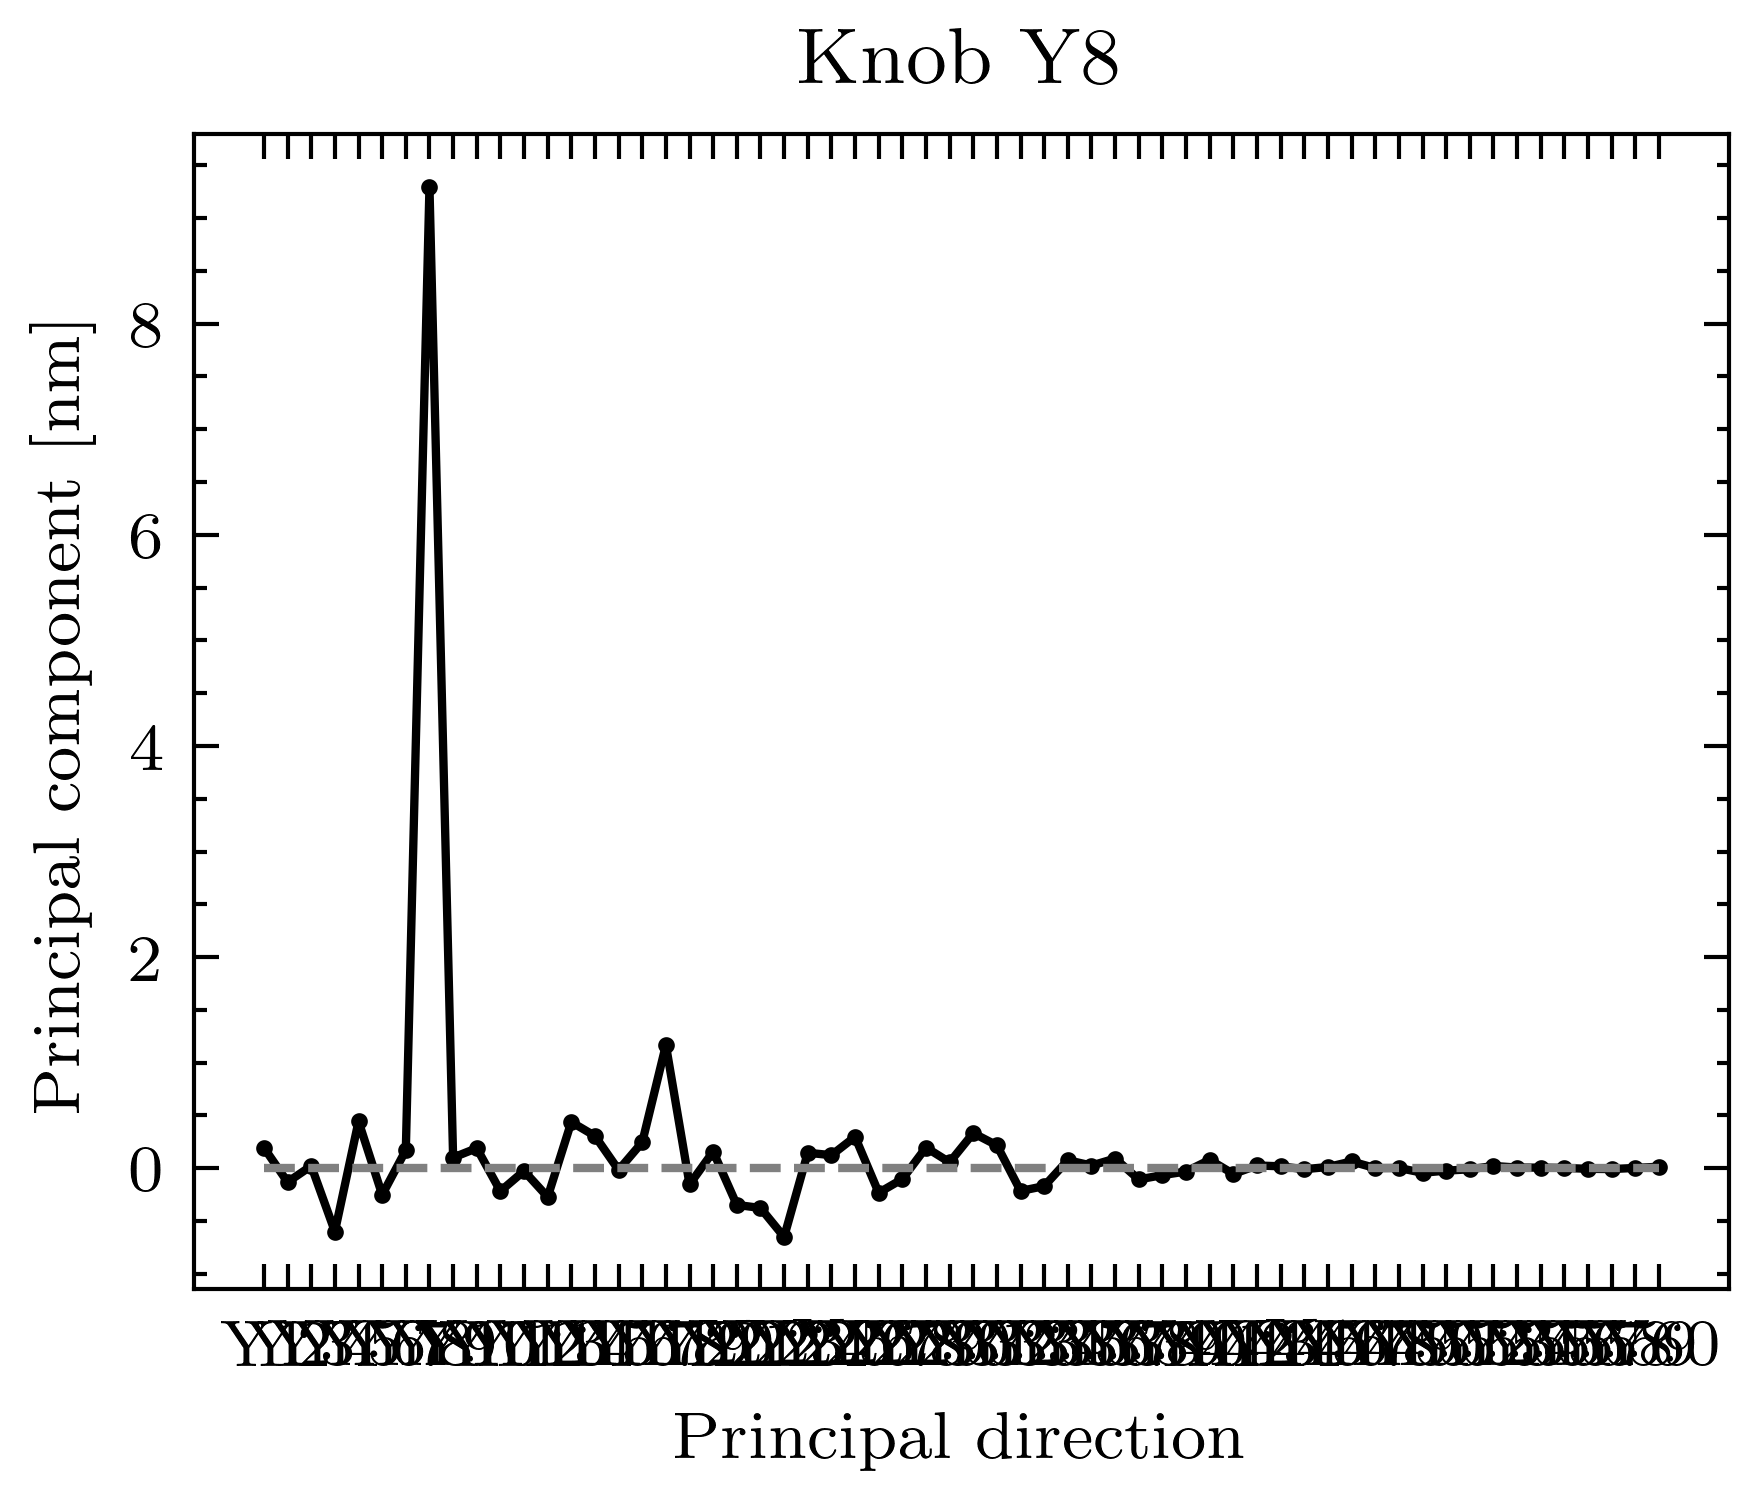

In [160]:
# So applying the Knob and checking the principal components

knob_id = 8

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[-1.72119710e-10  3.93629085e-11  8.58226582e-11 -1.49328708e-10
   4.52782951e-10  4.36379011e-10 -1.59055893e-10 -2.59666977e-10
   9.42721663e-09 -3.15044174e-10 -4.72083989e-10 -7.36747768e-10
  -3.21814889e-10 -2.68673465e-10  2.05952316e-10 -7.99515036e-10
   9.20867027e-11  1.21554754e-10  1.11411132e-09  5.08843587e-11
  -6.96880678e-10  5.79737397e-10  3.99124098e-10 -2.23984519e-10
  -9.55011135e-11 -4.45561219e-10  4.98090599e-11  1.48646055e-10
  -8.49607955e-11  2.64609021e-10 -8.53790167e-11  2.22701811e-10
   4.73927147e-11  4.79001549e-10 -1.54899236e-11  9.32329543e-12
   1.81887095e-11  5.82168108e-11  2.57393980e-11  8.90248628e-12
  -5.24072048e-11 -5.58215226e-11 -8.79014708e-13  2.38091832e-12
   2.91375635e-11  4.16957573e-12  2.49650541e-11  2.01997776e-11
  -5.20294621e-12 -3.34293554e-11 -1.71824775e-11 -1.53122148e-11
   6.74519338e-12  5.73417309e-12  2.24214311e-11  1.70326523e-11
   5.58996040e-12 -3.36991692e-12  1.12143710e-11 -5.98008263e-12
  -2.41867

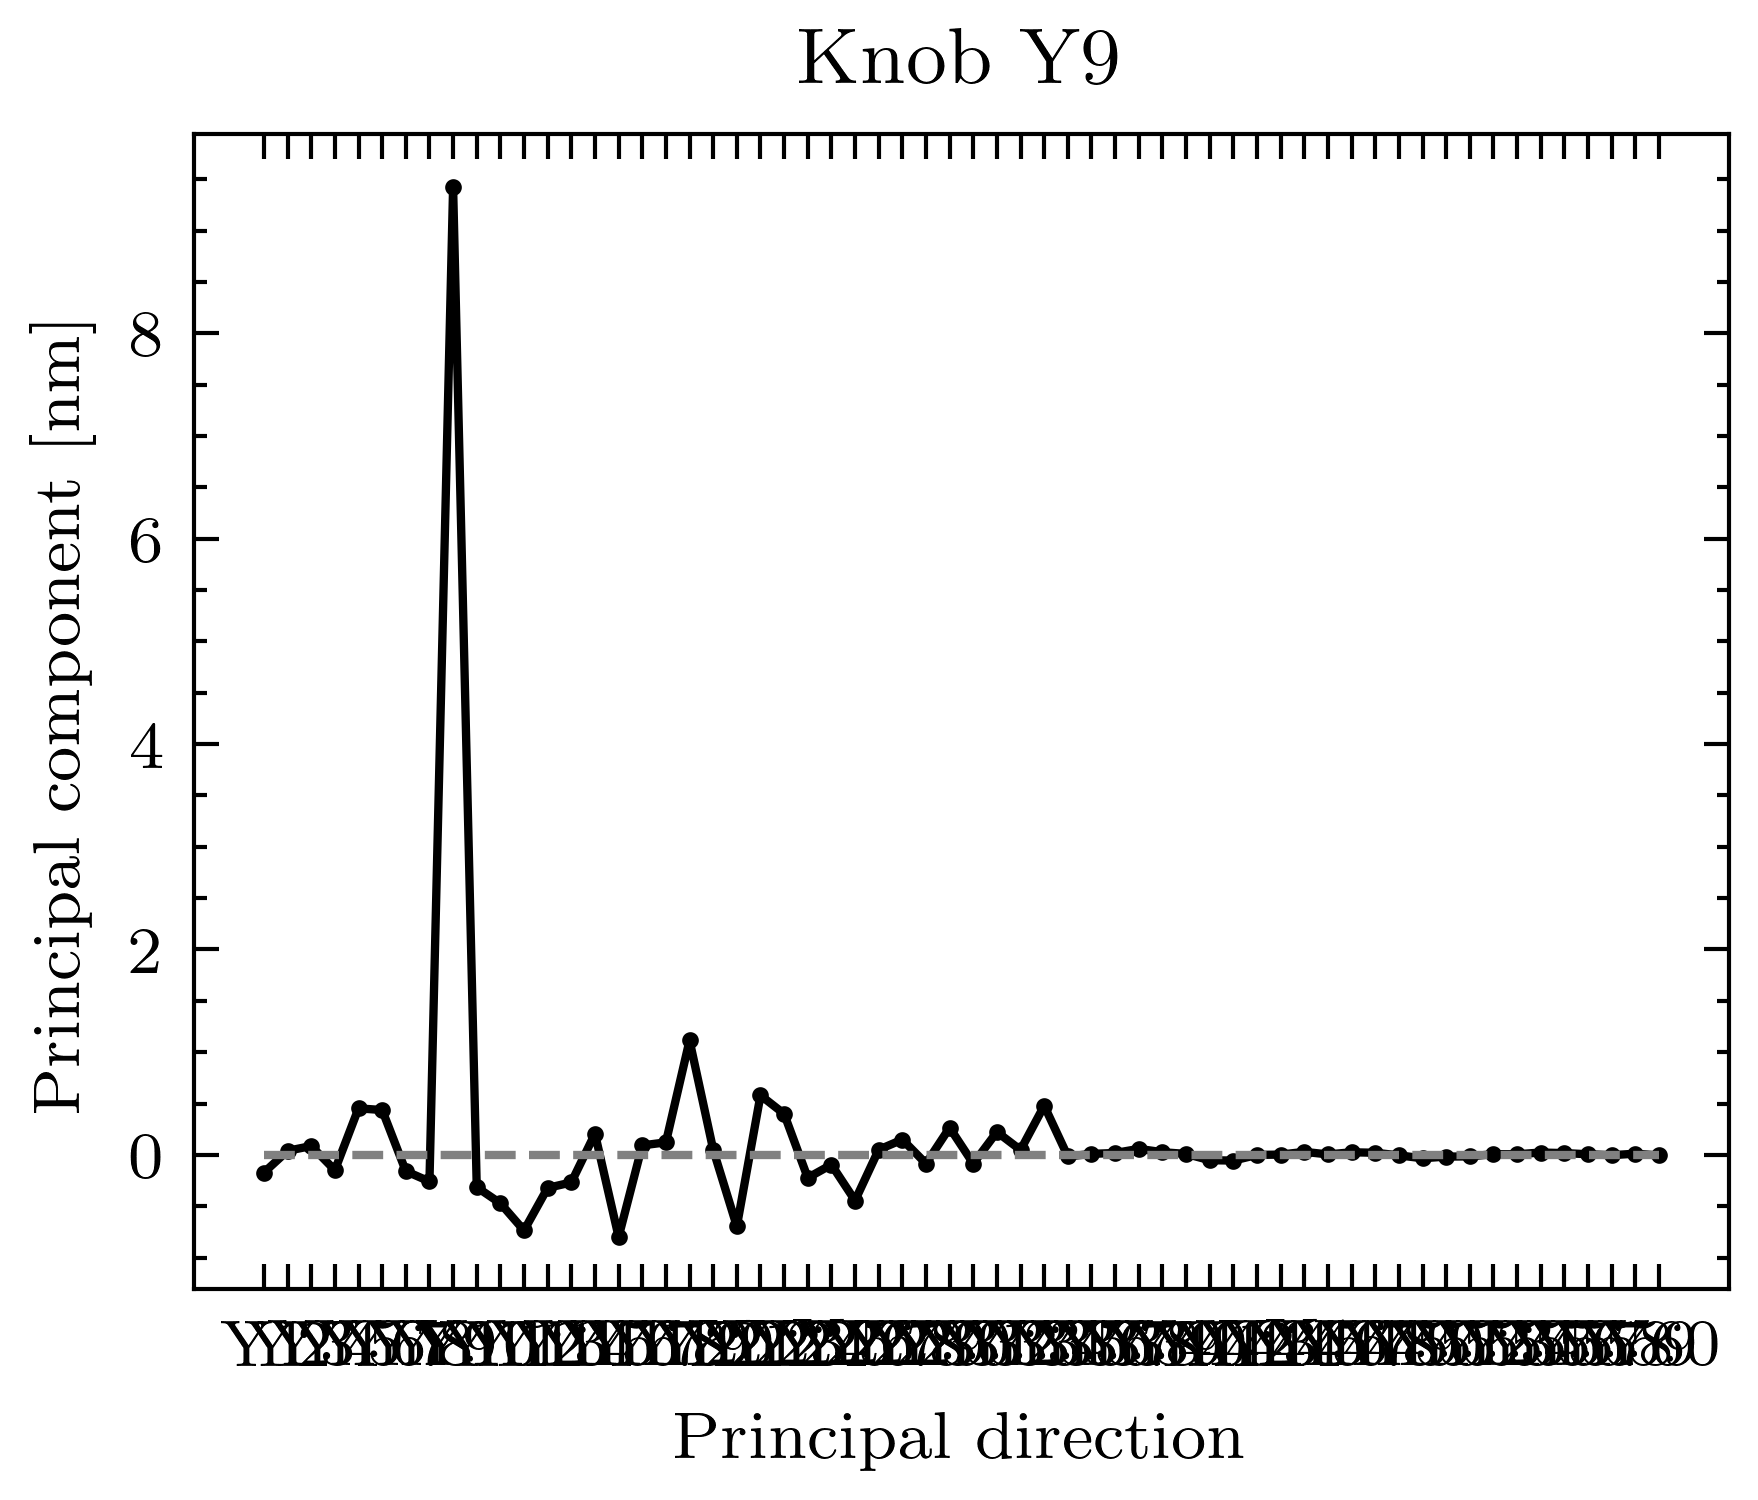

In [161]:
# So applying the Knob and checking the principal components

knob_id = 9

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()

[[ 5.73577025e-11 -7.62887785e-11  1.84089148e-10  1.44379545e-11
   2.91267601e-11  3.31751152e-10  3.39528205e-10 -2.49214129e-10
  -1.41787508e-10  9.08956350e-09  2.74968483e-10  7.00984001e-10
  -2.38805966e-11  9.64280414e-10 -5.61336172e-10 -3.01204344e-10
   1.07701043e-09  1.94901645e-10  6.56783259e-10 -7.58685133e-10
   6.64188950e-10 -4.56217768e-10 -1.76474545e-10 -3.27313414e-10
  -1.99842472e-10 -2.63904467e-10  1.63606099e-10  4.85968082e-10
   1.89811935e-10  2.20596797e-10  1.14202874e-10  6.50133440e-11
   3.44826851e-10  2.08067811e-10 -3.31512360e-12 -2.66897131e-11
   7.48887361e-11 -1.21754433e-10 -6.26301804e-12 -3.44492552e-11
  -2.70492144e-11 -1.33987477e-11 -1.38503224e-11 -2.96915083e-12
   2.95182137e-11 -8.52655376e-12  4.08776636e-11  1.91729917e-11
  -5.47557307e-12 -4.54104022e-11 -3.71867784e-11 -1.97397563e-11
   3.08048652e-11 -3.14278394e-13  2.15622436e-11  3.33389507e-12
  -6.11604504e-12 -1.66830095e-11  2.04532761e-12  6.59173342e-12
  -1.26879

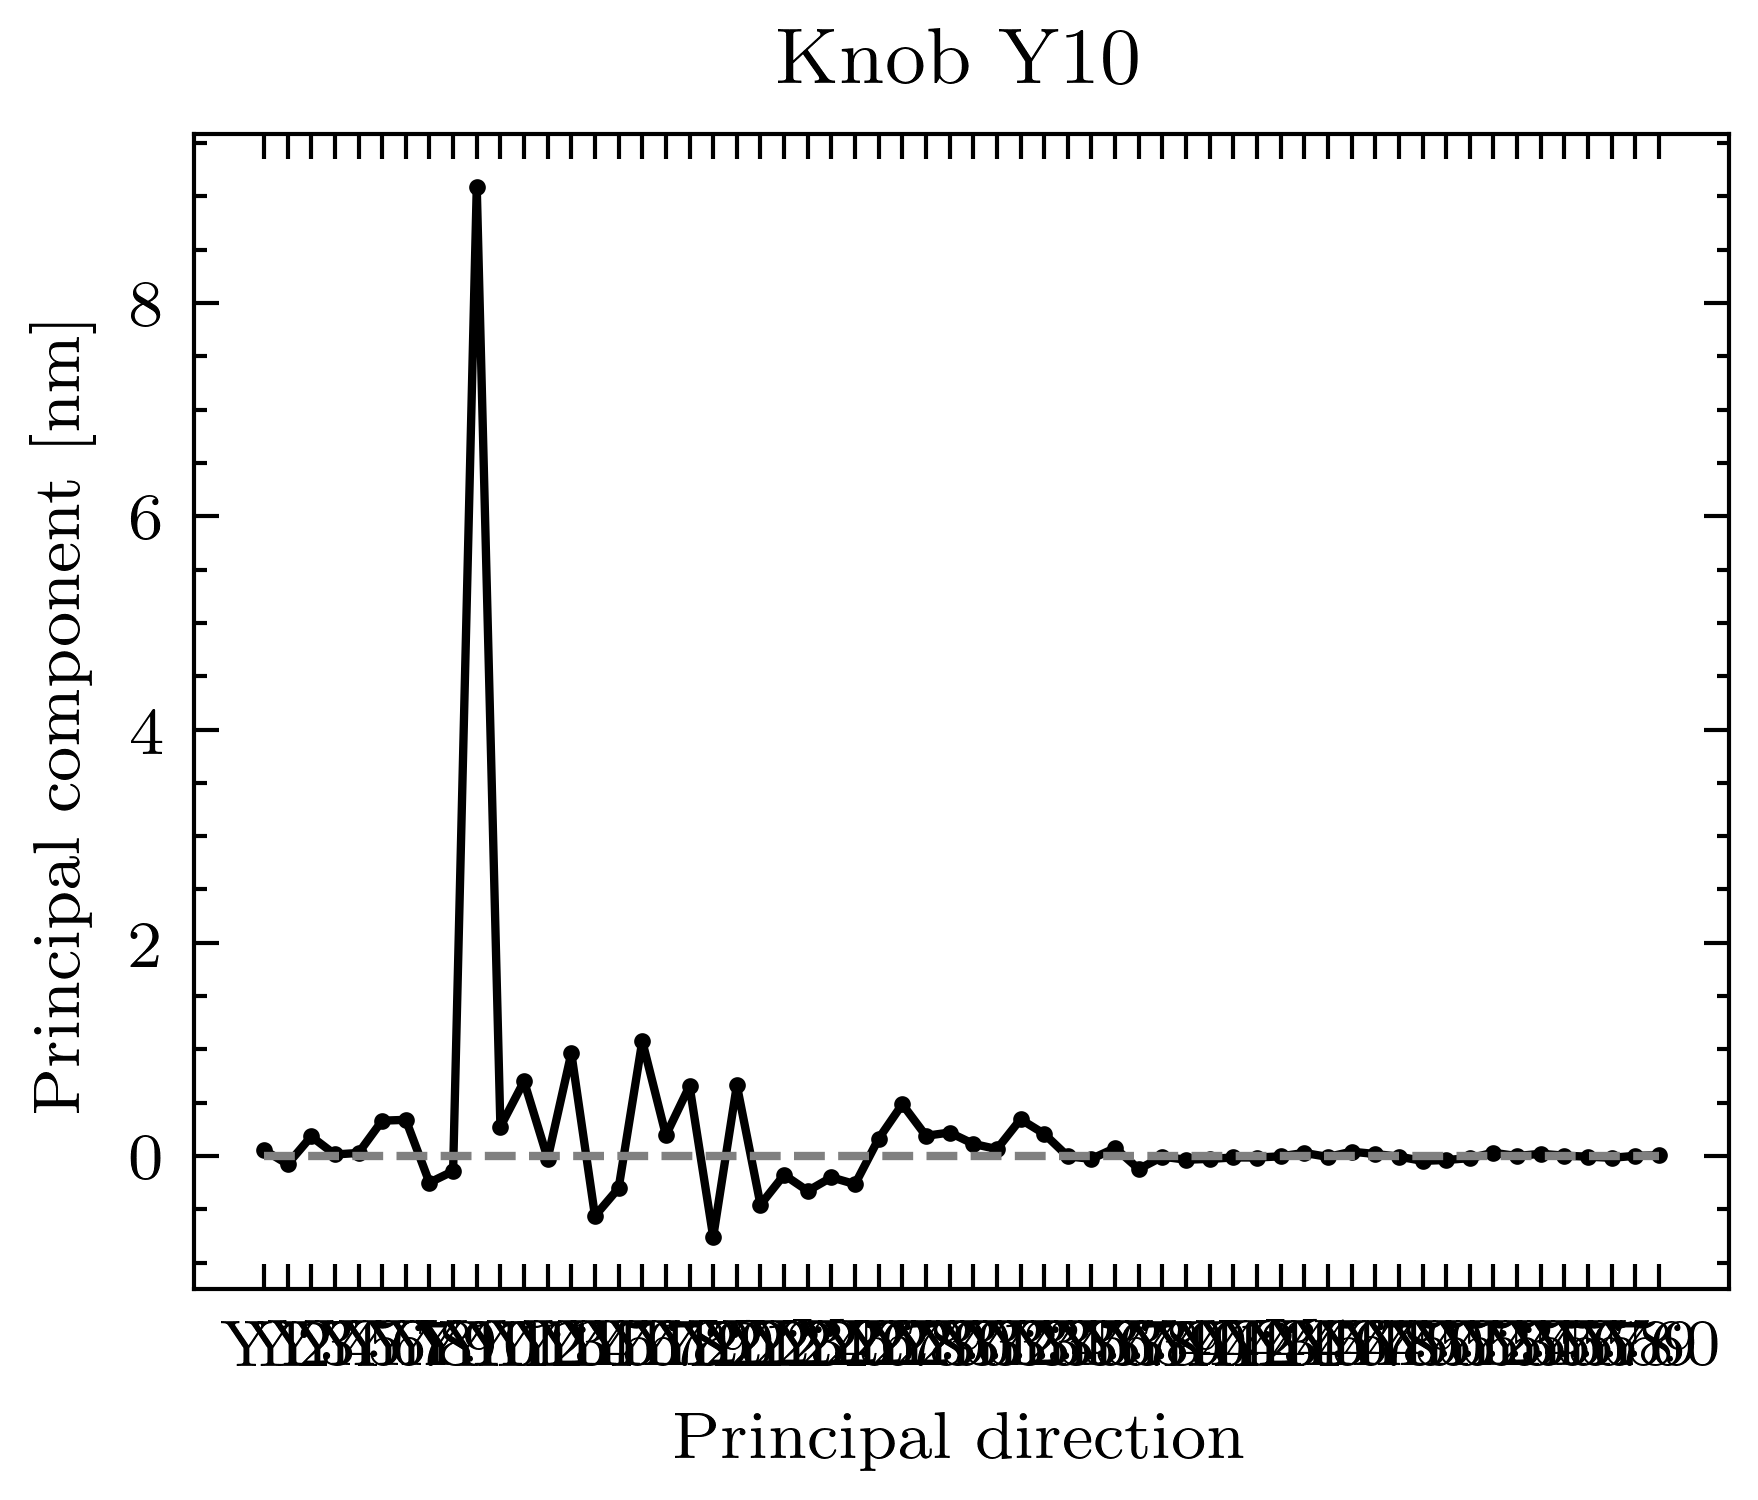

In [162]:
# So applying the Knob and checking the principal components

knob_id = 10

clic.apply_knob(knobs[knob_id - 1], 1.0)
ys, pys = clic.eval_obs(main_beam, ['y', 'py'])
clic.apply_knob(knobs[knob_id - 1], -1.0)

data_list = np.array(list(map(lambda x: x * 1e-6, ys + pys)))[:, np.newaxis]
principals = get_principals(data_list)

print(principals - principals_init)

principals_changes[knob_id - 1] = principals - principals_init

# Plotting the results

max_pr_component = 60

with plt.style.context(['science', 'ieee']):
    fig, ax1 = plt.subplots(1, sharex = True)
    
    custom_x_ticks = list(range(1, max_pr_component + 1))
    custom_x_tick_labels = list(map(lambda i: f"Y{i}", custom_x_ticks))
#    custom_x_tick_labels = ["Y1", "Y2", "Y3", "Y4", "Y5", "Y6", "Y7", "Y8", "Y9", "Y10"]
    ax1.set_xticks(custom_x_ticks)
    ax1.set_xticklabels(custom_x_tick_labels)
    ax1.set_xticks([], minor = True)
    
    ax1.plot(list(range(1, max_pr_component + 1)), principals_changes[knob_id - 1][0][:max_pr_component] * 1e9, '-o', markersize = 1.0, linewidth = 1.0)
    
    ax1.plot(np.linspace(1, max_pr_component, 100), [0.0] * 100, '--', color = "grey", linewidth = 1.0)
    
    ax1.set_xlabel("Principal direction")
    ax1.set_ylabel("Principal component [nm]")
    plt.title(f"Knob Y{knob_id}")
    
    plt.show()